## En este script se presentan todas las estadisticas descriptivas y sus intrpretaciones para las variables de nuestra base, tambien se hacen diversas graficas que sirven para interpretar como es la relacion de nuestras variables entre ellas y entre la dependiente.



## En este script se carga la base que genera el script *base final* 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
import numpy as np
import pandas as pd
import math
import seaborn as sns

base_final = pd.read_csv('Base Final1.csv')
base_final['Mes'] = pd.to_datetime(base_final['Mes'], format='%m-%Y')
base_final['Departamento'] = base_final['Departamento'].str.replace('archipielagodesanandresprovidenciaysantacatalina', 'SanAndres', regex=False)

In [17]:
# Como podemos ver tenemos 4860 filas que representan una ciudad de colombia en un rango de 2018 a 2023 mensualmente, o sea cada ciudad aparece 12 veces por a;o con sus respectivas variables.
# Por otro lado podemos ver que existen 34 columnas, cada una representa una variable explicativa.  


# Como tenemios tantas variables, vamos a dividir en subgrupos las variables variables y a cada subgrupo les vamos a hacer su estaditica descripitva, en las graficas habra una parte para 
# combinaciones de todas las variables y otra por cada subdibicion.

# LOS SUBGRUPOS QUE SE GENERARON SON LOS SIGUIENTES:

"""
Variables geograficas: Ciudad , Departamento , Distancia a accesos , Distancia al TOP ,Importancia accesos , Área Urbana , Área Rural , Numero Vias
Variables Económicas: Dólar , PIB Ponderado , Proxy Pobreza , Inflación
Variables de Seguridad: Homicidios , Hurtos , Delitos Sexuales
Variables de Infraestructura Turística: Establecimientos de turismo , Número de Habitaciones , Número de Camas , Entradas Extranjeros Zona ,Eventos
Variables Climáticas: Temperatura , Área Agua
Variables de Gastos Turísticos: Gasto Promedio Diario ... Gasto Promedio Viaje (Todas las variables de gasto)
Variable dependiente: Numero turistas 

"""

print(base_final.shape)
print(base_final.columns)


(4860, 34)
Index(['Ciudad', 'Mes', 'Nmero Extranjeros', 'Homicidios', 'Hurtos',
       'Delitos Sexuales', 'Departamento', 'Temperatura', 'Dolar',
       'Pib Ponderado', 'Entradas Extranjeros Zona', 'Distancia a accseos',
       'importancia accesos', 'Establecimientos de turismo', 'N Habitaciones',
       'N Camas', 'Distancia al TOP', 'Proxy Pobreza', 'Gasto Promedio Diario',
       'Gasto Alojamiento Diario', 'Gasto Transporte Diario',
       'Gasto alimetos Diario', 'Otros Gastos Diario', 'Gasto Promedio Viaje',
       'Gasto  Alojamiento Viaje', 'Gasto Transporte Viaje',
       'Gasto alimetos Viaje', 'Otros Gastos Viaje', 'Inflacion', 'Nmero Vias',
       'Eventos', 'Area Urbana', 'Area Rural', 'Area Agua'],
      dtype='object')


## Estadisticas descriptivas para Variables geograficas

In [19]:
# MEDIDAS DE TENDENCIA CENTRAL
def Medidas_Centrales(df , variable):
    media_variable1 = df[variable].mean()
    mediana_variable1 = df[variable].median()
    moda_variable1 = df[variable].mode().iloc[0]

    tabla_resultados = pd.DataFrame({
    'Variable': [variable],
    'Media': [media_variable1],
    'Mediana': [mediana_variable1],
    'Moda': [moda_variable1],})
    return tabla_resultados

variables = ['Distancia al TOP' ,'importancia accesos' , 'Area Urbana' , 'Area Rural' ,'Nmero Vias']
tabla_inical = Medidas_Centrales(base_final , 'Distancia a accseos')
for i in variables:
    tabla = Medidas_Centrales(base_final , i)
    tabla_inical = pd.concat([tabla_inical, tabla], ignore_index=True)

# MEDIDAS DE DISPERCION 
def Medidas_Dispersion(df , variable):
    varianza = np.var(df[variable])
    Desviaciónestándar_variable1 = np.std(df[variable])
    Max_variable1 = max(df[variable])
    Min_variable1 = min(df[variable])
    Rango_variable1 = Max_variable1 - Min_variable1

    tabla_resultados = pd.DataFrame({
    'Variable': [variable],
    'Varianza': [varianza],
    'Desviacion Estandar': [Desviaciónestándar_variable1],
    'Maximo': [Max_variable1],
    'Minimo': [Min_variable1],
    'Rango': [Rango_variable1],})
    return tabla_resultados

tabla_dispercion = Medidas_Dispersion(base_final , 'Distancia a accseos')
for i in variables:
    tabla = Medidas_Dispersion(base_final , i)
    tabla_dispercion = pd.concat([tabla_dispercion, tabla], ignore_index=True)

# MEDIDAS DE FORMA
def Medidas_Forma(df , variable):
    simetria = np.mean((df[variable] - np.mean(df[variable])) ** 3) / np.std(df[variable]) ** 3
    kurtosis = np.mean((df[variable] - np.mean(df[variable])) ** 4) / np.var(df[variable]) ** 2

    tabla_resultados = pd.DataFrame({
    'Variable': [variable],
    'Asimetria': [simetria],
    'Kurtosis': [kurtosis],})
    return tabla_resultados
    
tabla_forma = Medidas_Forma(base_final , 'Distancia a accseos')
for i in variables:
    tabla = Medidas_Forma(base_final , i)
    tabla_forma = pd.concat([tabla_forma, tabla], ignore_index=True)


## Interpretaciones:

In [4]:
'''
Para las medidas de tendencia central podemos ver que en la mayoria de variables, menos Distancia al TOP, la media esta sesgada, esta conclucion parte de que la mediana difiere de la media 
significativamente.
Este analisis nos deja ver que existen valores atipicos para este grupo de variables. Por otro lado podemos ver que. Podemos tambien analizar que la mayoria de ciudades estan lejos, de los 
puntos de accesos mas transitados del pais y que la mayoria de ciudades son peque;as, dado que la mediana en km2 de el area urabana es 5.96.
'''
tabla_inical

Variable       Media     Mediana        Moda
0  Distancia a accseos  427.854132  375.336669  199.857121
1     Distancia al TOP    0.676752    0.650062    0.601755
2  importancia accesos    0.143169    0.011137    0.000000
3          Area Urbana   13.616041    5.961096    3.311166
4           Area Rural    3.860021    1.694928    1.074669
5           Nmero Vias    6.197531    6.000000    2.000000

In [5]:
'''
Del segundo momento de las variables podemos decir que: efectivamente, todasd las variables, menos Distancia al TOP tienen una variabilidad grande. Podemos ver como el rango en todas las 
variables es muy alto en comparacion con la media y indicando la precencia de valores maximos muy grandes. Esto tiene sentido debido a la existencia de megaciudades como Bogota o Medellin.
Por ultimo podemos ver como la variables con mayor desviacion estandar (en comparacion con la media) son Distancia a accseos, Area Urbana y Area Rural. Esto va en sintonia con la interpretacion 
de que, son las principales ciudades las que tienen los mayores numeros de accesos internacioneles y areas urbanas y rurales.
'''
tabla_dispercion 

Variable      Varianza  Desviacion Estandar       Maximo  \
0  Distancia a accseos  38430.381546           196.036684  1270.344040   
1     Distancia al TOP      0.007181             0.084742     1.047374   
2  importancia accesos      0.032535             0.180374     0.700000   
3          Area Urbana    680.039841            26.077574   218.924291   
4           Area Rural     49.733366             7.052189    54.775529   
5           Nmero Vias     19.788142             4.448386    22.000000   

       Minimo        Rango  
0  198.291578  1072.052462  
1    0.601755     0.445618  
2    0.000000     0.700000  
3    0.189971   218.734320  
4    0.035252    54.740277  
5    0.000000    22.000000

In [6]:
'''
Por ultimo podemos ver como en el tercer momento de las variables, la mayoria estan sesgadas hacia la derecha pero no tanto como esperariamos, dado que 3 de las 5 tienen asimetria de 1;
por otro lado area urbana y rural si esta muy sesgada hacia la derecha indicando presencia de colas muy pesadas hacia los valores positivos. La kurtosis nos dice que todas las variables son 
leptokurticas, especialmentw la de area urbana y area rural. Indicando que muchos de los valores se centran en la media.
'''
tabla_forma

Variable  Asimetria   Kurtosis
0  Distancia a accseos   1.640648   6.611329
1     Distancia al TOP   1.874553   7.381208
2  importancia accesos   1.119499   3.445547
3          Area Urbana   5.766136  42.365683
4           Area Rural   4.630515  28.802243
5           Nmero Vias   1.047895   4.471868

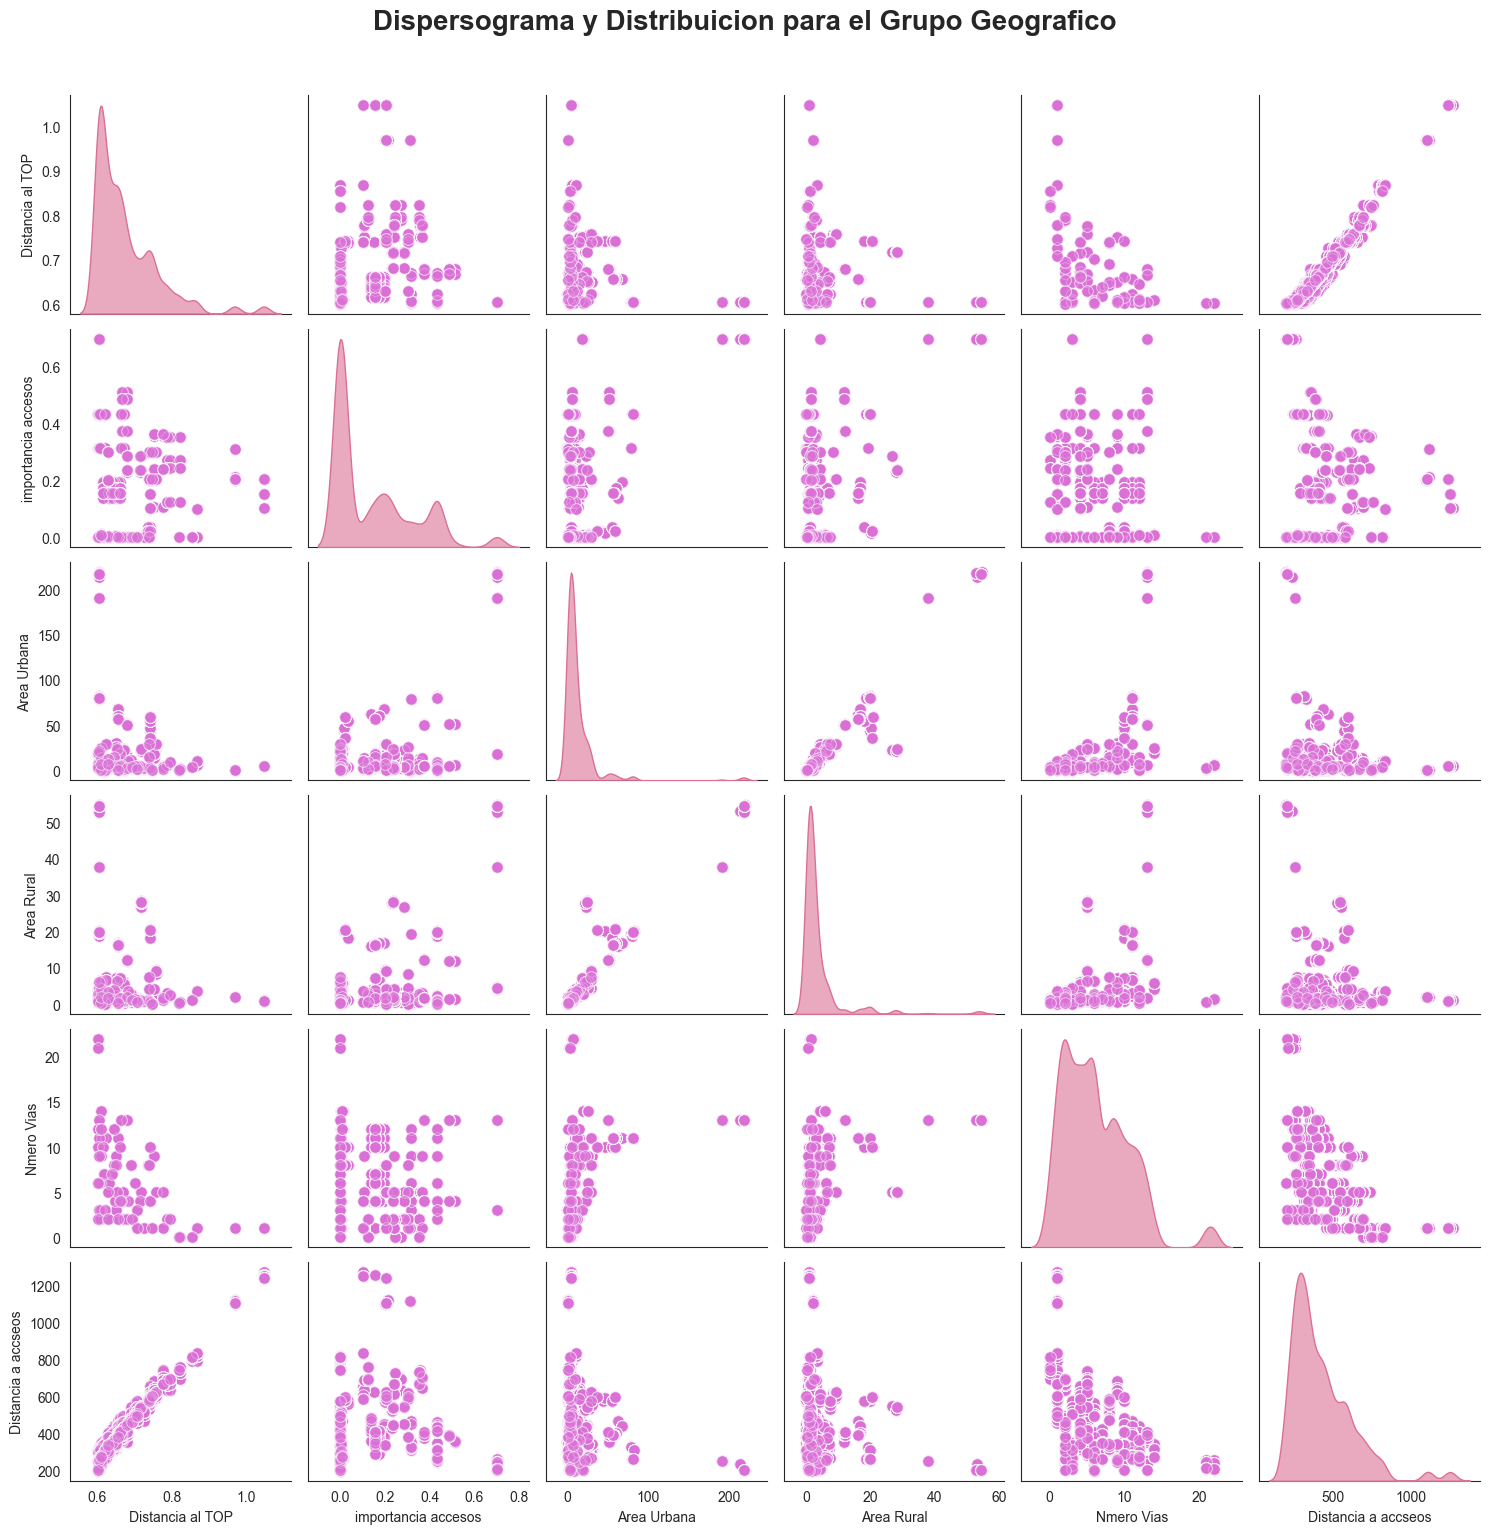

In [7]:
with sns.axes_style("white"):
    pairplot = sns.pairplot(base_final[variables + ['Distancia a accseos']], diag_kind='kde', corner=False, plot_kws={'alpha':0.6 ,'color': '#DA70D6' ,'s': 70} ,
    diag_kws={'color': '#DB7093','fill': True, 'alpha': 0.6 })
    pairplot.fig.suptitle('Dispersograma y Distribuicion para el Grupo Geografico', fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Estadisticas descriptivas para Variables Economicas

In [8]:
variables = ['Pib Ponderado' ,'Inflacion' , 'Proxy Pobreza']

tabla_inical = Medidas_Centrales(base_final , 'Dolar')
for i in variables:
    tabla = Medidas_Centrales(base_final , i)
    tabla_inical = pd.concat([tabla_inical, tabla], ignore_index=True)

tabla_dispercion = Medidas_Dispersion(base_final , 'Dolar')
for i in variables:
    tabla = Medidas_Dispersion(base_final , i)
    tabla_dispercion = pd.concat([tabla_dispercion, tabla], ignore_index=True)

tabla_forma = Medidas_Forma(base_final , 'Dolar')
for i in variables:
    tabla = Medidas_Forma(base_final , i)
    tabla_forma = pd.concat([tabla_forma, tabla], ignore_index=True)

In [9]:
'''
En este caso podemose ver que las unicas variables que sus medias estan sesgadas con respecto a la mediana son la inflacion (tal vez debido a choques inflacionarios) y el PIB,
lo cual tambien es logico debido a que colombia es caracteristico por que un numero peque;o de regiones generan la mayoria del PIB, seguramente esa media esta sesgada por ciudades como 
bogota, medellin, cali ... 
'''
tabla_inical

Variable        Media      Mediana         Moda
0          Dolar  3708.287417  3753.620000  2780.470000
1  Pib Ponderado   901.466779   297.587506     4.193204
2      Inflacion     6.435864     3.912850     1.506550
3  Proxy Pobreza     0.001936     0.001530     0.000036

In [10]:
'''
Este analisis va de acorde con el anterior. Tanto el PIB como la inflacion tienen disperciones altas, el PIB por las diferentes ciudades y la inflacion debido a la reactivacion 
economica generada despues de la pandemia que como podemos ver alzo la inflacion hasta 11%. Por otro lado, el proxy de pobreza parece no variar mucho entre zonas y el dolar tambien tuvo 
un aumento de precio considerable teniendo un maximo en 4914.
'''
tabla_dispercion 

Variable      Varianza  Desviacion Estandar        Maximo  \
0          Dolar  3.423153e+05           585.077138   4914.525000   
1  Pib Ponderado  9.817750e+06          3133.328919  39209.194186   
2      Inflacion  1.537843e+01             3.921534     13.344330   
3  Proxy Pobreza  2.524640e-06             0.001589      0.017182   

        Minimo         Rango  
0  2780.470000   2134.055000  
1     4.193204  39205.000981  
2     1.506550     11.837780  
3     0.000036      0.017146

In [11]:
'''
Por ultimo podemos ver que el dolar y la inflacuion tienen muy poca asimetria, o sea, sus colas no son tan pesadas. Mintras que las colas del PIB son MUY pesadas y la kurtosis nos dice que 
aunque la mayoria de ciudades estan al rededor de la media de PIB pocas ciudades generan un peso muy fuerte en las distribuciones. la inflaciom y el dolar parecen tener una distribuicion 
parecida a una normal en termino de forma
'''
tabla_forma

Variable  Asimetria   Kurtosis
0          Dolar   0.247991   2.102539
1  Pib Ponderado   8.269841  79.050679
2      Inflacion   0.544453   1.653343
3  Proxy Pobreza   3.457590  21.656089

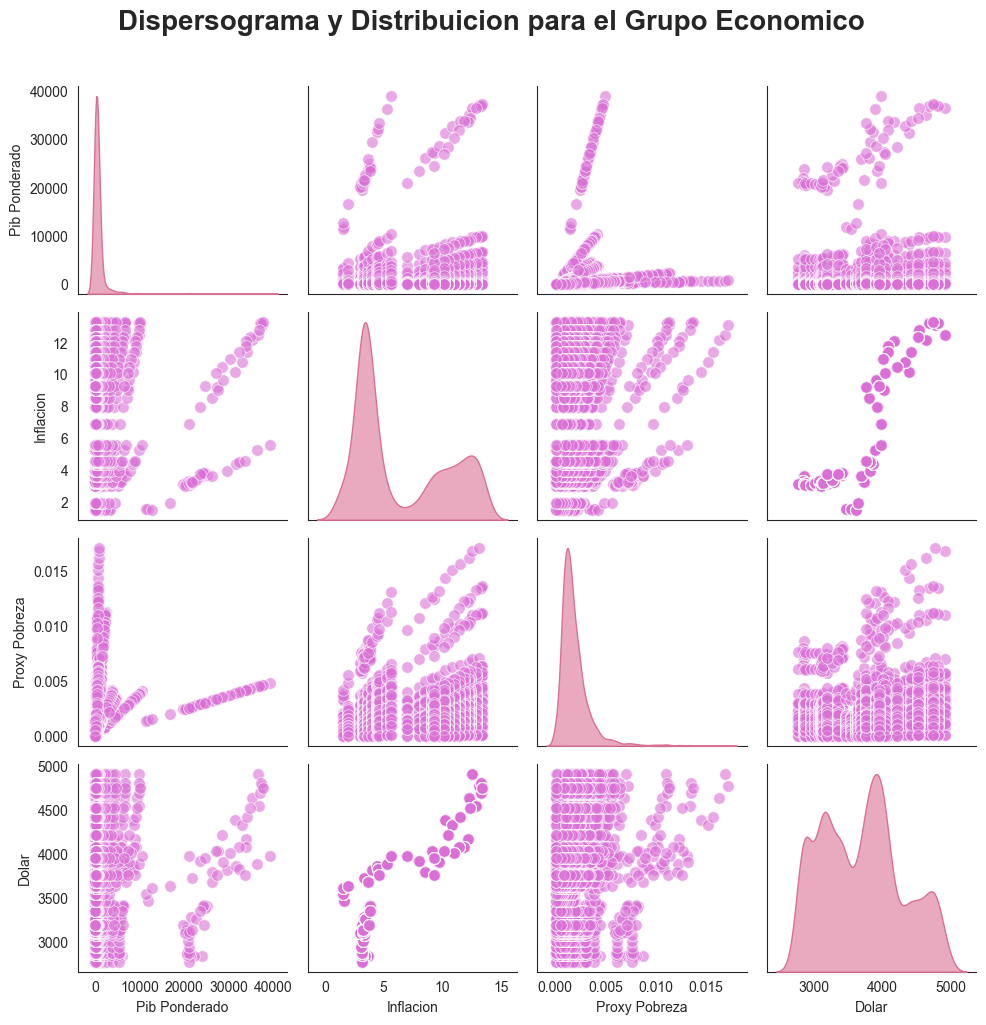

In [54]:
with sns.axes_style("white"):
    pairplot = sns.pairplot(base_final[variables + ['Dolar']], diag_kind='kde', corner=False, plot_kws={'alpha':0.6 ,'color': '#DA70D6' ,'s': 70} ,
    diag_kws={'color': '#DB7093','fill': True, 'alpha': 0.6 })
    pairplot.fig.suptitle('Dispersograma y Distribuicion para el Grupo Economico', fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Estadisticas descriptivas para Variables de Seguridad

In [45]:
variables = ['Hurtos' , 'Delitos Sexuales']

tabla_inical = Medidas_Centrales(base_final , 'Homicidios')
for i in variables:
    tabla = Medidas_Centrales(base_final , i)
    tabla_inical = pd.concat([tabla_inical, tabla], ignore_index=True)

tabla_dispercion = Medidas_Dispersion(base_final , 'Homicidios')
for i in variables:
    tabla = Medidas_Dispersion(base_final , i)
    tabla_dispercion = pd.concat([tabla_dispercion, tabla], ignore_index=True)

tabla_forma = Medidas_Forma(base_final , 'Homicidios')
for i in variables:
    tabla = Medidas_Forma(base_final , i)
    tabla_forma = pd.concat([tabla_forma, tabla], ignore_index=True)

In [46]:
'''
Estas 3 variables van a estar nuevamente sesgadas por las grandes ciudades, especialmente por la pblacion de cada lugar, dado que es mas probable que suceda algun tipo de estos crimenes 
cuando hay mayor poblacion. Podemos ver que la moda de homicidios es 0, esto es curioso dado que a pesdar de que existan ciudades peque;as, deberian haber homocidios. En general podemos ver 
que la media esta muy sesgada. Evidetenemte los criemenes que mas se cometen son hurtos seguidos de delitos sexuales y por ultimo homicidio
'''
tabla_inical

Variable       Media  Mediana  Moda
0        Homicidios    7.569547      3.0     0
1            Hurtos  298.780041     66.0     5
2  Delitos Sexuales   22.987449      8.0     4

In [47]:
'''
Lo primerop que resalta es que para los 3 crimenes hay 0 observaciones en el minimo. O sea, en este periodo de tiempo han habido meses donde por lo menos alguina ciudad 
no registro ninguna de estos crimenes, por otro lad las desviaciones son MUY altas comparadas con la media, diciendo que para estas variables lo mas probable es que existan muchisimos 
valores atipicos.
'''
tabla_dispercion 

Variable      Varianza  Desviacion Estandar  Maximo  Minimo  Rango
0        Homicidios  2.321180e+02            15.235419     179       0    179
1            Hurtos  1.501658e+06          1225.421734   16095       0  16095
2  Delitos Sexuales  3.933001e+03            62.713642     885       0    885

In [48]:
'''
Asi como ya habiamos dicho, de todos los grupos que hemos analizado, estos son los que tienen mayor asimetrias, indicando que existen desviaciones muy pesadas hacia la derecha, por otro lado 
las kurtosis son nuevamente, leptokurticas, o sea la mayoria si se concentran en la media pero los valores atipicos son muy pesados 
'''
tabla_forma

Variable  Asimetria   Kurtosis
0        Homicidios   4.729259  29.149458
1            Hurtos   8.427788  79.713669
2  Delitos Sexuales   7.363918  65.887162

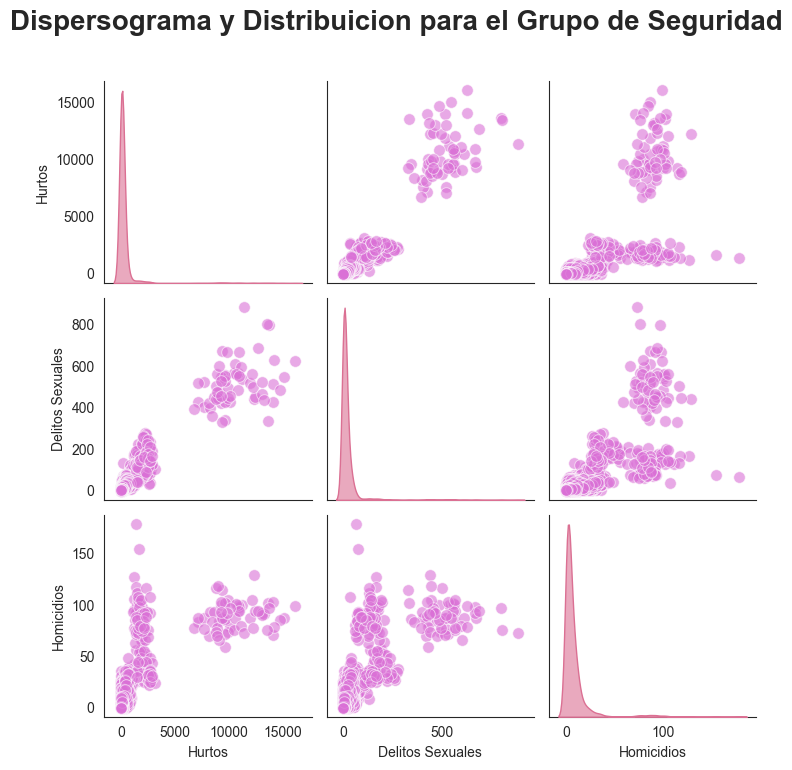

In [49]:
with sns.axes_style("white"):
    pairplot = sns.pairplot(base_final[variables + ['Homicidios']], diag_kind='kde', corner=False, plot_kws={'alpha':0.6 ,'color': '#DA70D6' ,'s': 70} ,
    diag_kws={'color': '#DB7093','fill': True, 'alpha': 0.6 })
    pairplot.fig.suptitle('Dispersograma y Distribuicion para el Grupo de Seguridad', fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Estadistica descripitva para Variables de Infraestructura Turística

In [20]:
variables = ['N Habitaciones' , 'N Camas' , 'Entradas Extranjeros Zona' ,'Eventos']

tabla_inical = Medidas_Centrales(base_final , 'Establecimientos de turismo')
for i in variables:
    tabla = Medidas_Centrales(base_final , i)
    tabla_inical = pd.concat([tabla_inical, tabla], ignore_index=True)

tabla_dispercion = Medidas_Dispersion(base_final , 'Establecimientos de turismo')
for i in variables:
    tabla = Medidas_Dispersion(base_final , i)
    tabla_dispercion = pd.concat([tabla_dispercion, tabla], ignore_index=True)

tabla_forma = Medidas_Forma(base_final , 'Establecimientos de turismo')
for i in variables:
    tabla = Medidas_Forma(base_final , i)
    tabla_forma = pd.concat([tabla_forma, tabla], ignore_index=True)

In [21]:
'''
Para las variables de infrastructura de alojamiento, podemos ver que hay pocos establecimientos turisticos / recreativos, en la mayoria de ciudades, siendo la mediana 10. Por otro lado, 
el numero de camas y de habitaciones parece tambien bajito indicando nuevamente que hay un sesgo muy grande entre diferentes ciudades, la media del numero de habitaciones es 48848 mientras 
que la mediana es solo 90. Esto debido a que en las ciudades grandes hay muchos hoteles con gran capacidad para turistas. Aunque algo curioso es el N de camas, uno esperaria que la relacion 
fuera igual con el numero de habitaciones (media muy sesgada y mediana no) pero esto no es asi, esto puede ser a que en hay mas camas para prestar que habitaciones. Debido a la falta de 
instalaciones grandes seguramente, despues de todo es mas facil ofrecer camas que habitaciones enteras. La entrada de extranjeros por zona es alta pero solo en unas zonas y esto es precisamente 
lo que esperamos que aprenda el modelo, que hay algunas zonas donde entran mas personas y a donde mas gente viaja. 
'''
tabla_inical

Variable         Media     Mediana  Moda
0  Establecimientos de turismo     53.501563   10.723376   6.0
1               N Habitaciones  46512.836799   94.692478   0.0
2                      N Camas    633.251171  144.614232   0.0
3    Entradas Extranjeros Zona  12165.890947  522.000000   0.0
4                      Eventos      0.910494    0.000000   0.0

In [22]:
'''
En las estadisticas de dispercion, podemos ver que nuevamente todas las variables tienen dispercion muy grande, y un maximo muy muy grande en comparacion con el minimo, indicando 
la diferencia en infrastructura que poseen las diferentes ciudades.
'''
tabla_dispercion 

Variable      Varianza  Desviacion Estandar      Maximo  \
0  Establecimientos de turismo  3.200344e+04           178.895050      4237.0   
1               N Habitaciones  3.522008e+11        593465.038530  20688742.0   
2                      N Camas  8.147780e+06          2854.431697    141152.0   
3    Entradas Extranjeros Zona  7.084471e+08         26616.670124    190020.0   
4                      Eventos  1.541989e+00             1.241768         6.0   

     Minimo         Rango  
0  0.632799  4.236367e+03  
1  0.000000  2.068874e+07  
2  0.000000  1.411520e+05  
3  0.000000  1.900200e+05  
4  0.000000  6.000000e+00

In [23]:
'''
Aca la kurtosis es gigante, significando que la mayoria de ciudades efectivamente no tienen la capcidad para acoger a mucha gente mientras que, existen ciudades grandes que si, 
la asimetria tambien es positiva y demuestra la presencia de valores atipicos
'''
tabla_forma

Variable  Asimetria     Kurtosis
0  Establecimientos de turismo  10.192989   163.686487
1               N Habitaciones  18.411863   441.121261
2                      N Camas  28.825470  1257.929387
3    Entradas Extranjeros Zona   3.998621    22.056927
4                      Eventos   1.614760     5.641897

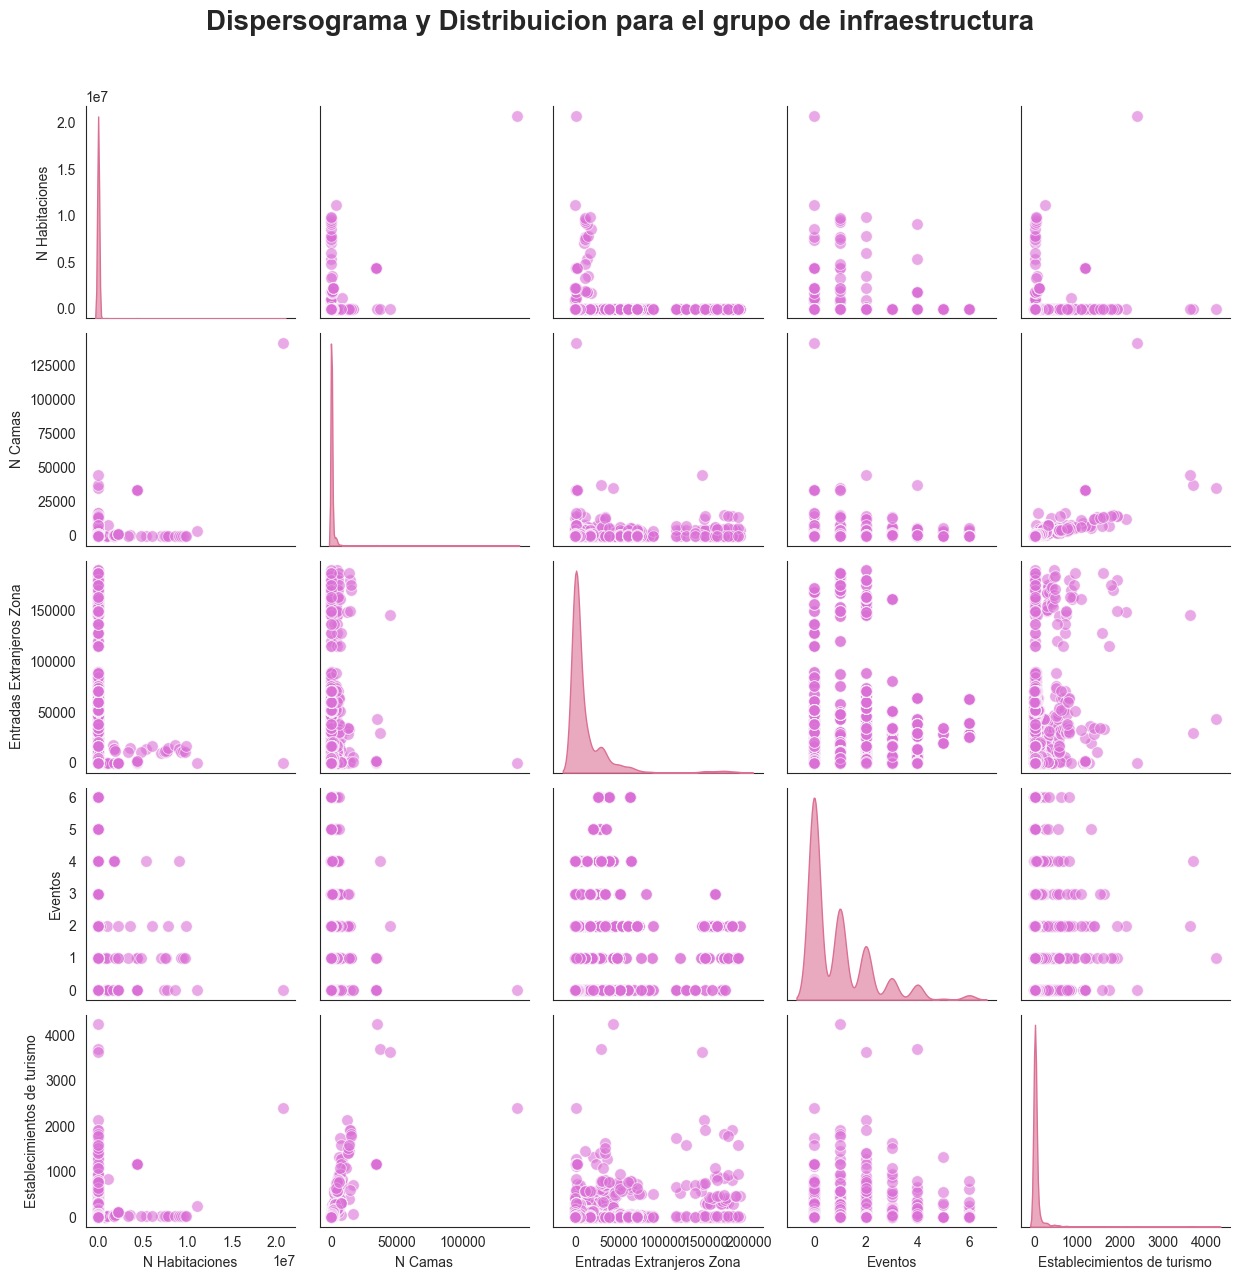

In [24]:
with sns.axes_style("white"):
    pairplot = sns.pairplot(base_final[variables + ['Establecimientos de turismo']], diag_kind='kde', corner=False, plot_kws={'alpha':0.6 ,'color': '#DA70D6' ,'s': 70} ,
    diag_kws={'color': '#DB7093','fill': True, 'alpha': 0.6 })
    pairplot.fig.suptitle('Dispersograma y Distribuicion para el grupo de infraestructura', fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Estadistica descriptiva para Variables de Clima

In [35]:
variables = ['Area Agua']

tabla_inical = Medidas_Centrales(base_final , 'Temperatura')
for i in variables:
    tabla = Medidas_Centrales(base_final , i)
    tabla_inical = pd.concat([tabla_inical, tabla], ignore_index=True)

tabla_dispercion = Medidas_Dispersion(base_final , 'Temperatura')
for i in variables:
    tabla = Medidas_Dispersion(base_final , i)
    tabla_dispercion = pd.concat([tabla_dispercion, tabla], ignore_index=True)

tabla_forma = Medidas_Forma(base_final , 'Temperatura')
for i in variables:
    tabla = Medidas_Forma(base_final , i)
    tabla_forma = pd.concat([tabla_forma, tabla], ignore_index=True)

In [36]:
'''
En este caso podemos ver que no existen valores atipicos basandonos en la media y la mediana para la temperatura, pero si existe para las areas de agua de cada ciudad,
lo del agua se debe principalmente a que las ciudades costeras contaban con mas agua mientras que las que no, no tenian zonas grandes de agua que se pudieran considerar en km2 desde las 
imagenes satelitales.
Por otro lado la temperatura ha sido constante a lo largo de las ciudades, siendo la mayoria de ciudades un poco mas caliente que frias.
'''
tabla_inical

Variable      Media    Mediana       Moda
0  Temperatura  21.646947  21.962231  22.334702
1    Area Agua   0.319252   0.023600   0.000000

In [37]:
'''
Aunque el rango sea grande, la desviacion estandar de la temperatura no lo es, existen ciudades que tienen zonas muy calientes pero son pocas dentro de las ciudades de analisis.
Por otro lado la desviacion del agua si es mas grande indicando que existen zonas con una zona costeras grande o zonas cercanas de agua, mientras que otras no cuentan con areas de agua 
'''
tabla_dispercion

Variable   Varianza  Desviacion Estandar    Maximo  Minimo     Rango
0  Temperatura  21.892882             4.678983  48.60000     0.0  48.60000
1    Area Agua   0.808108             0.898948   5.23858     0.0   5.23858

In [38]:
'''
El analisis es parecido al que dijimos, las areas de agua tienen una cola pesada positiva mientras que la temperatura promedio ha sido estable durante los a;os. Por otro lado ambas
avriables son leptcurticas.
'''
tabla_forma

Variable  Asimetria   Kurtosis
0  Temperatura  -0.444847   4.287623
1    Area Agua   3.469821  14.707321

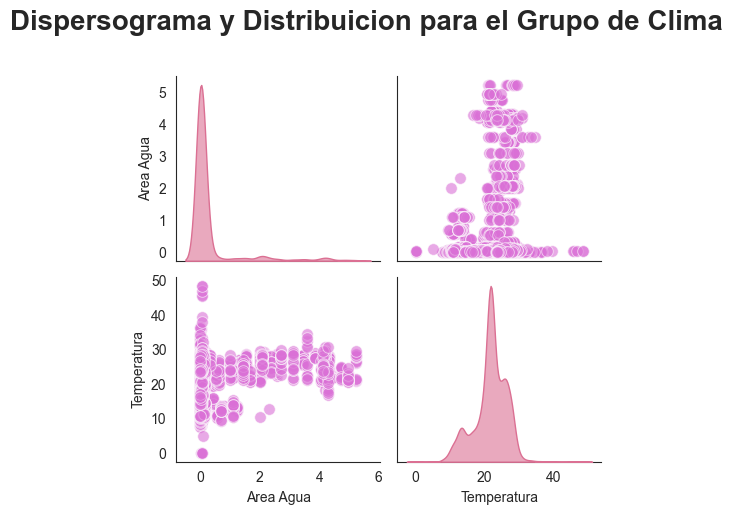

In [39]:
with sns.axes_style("white"):
    pairplot = sns.pairplot(base_final[variables + ['Temperatura']], diag_kind='kde', corner=False, plot_kws={'alpha':0.6 ,'color': '#DA70D6' ,'s': 70} ,
    diag_kws={'color': '#DB7093','fill': True, 'alpha': 0.6 })
    pairplot.fig.suptitle('Dispersograma y Distribuicion para el Grupo de Clima', fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Estadistica descripitva para Variables de Infraestructura Costos

In [40]:
variables = ['Gasto Alojamiento Diario' , 'Gasto Transporte Diario' , 'Gasto alimetos Diario' , 'Otros Gastos Diario' , 'Gasto Promedio Viaje',
'Gasto  Alojamiento Viaje' , 'Gasto Transporte Viaje' , 'Gasto alimetos Viaje' , 'Otros Gastos Viaje'
]

tabla_inical = Medidas_Centrales(base_final , 'Gasto Promedio Diario')
for i in variables:
    tabla = Medidas_Centrales(base_final , i)
    tabla_inical = pd.concat([tabla_inical, tabla], ignore_index=True)

tabla_dispercion = Medidas_Dispersion(base_final , 'Gasto Promedio Diario')
for i in variables:
    tabla = Medidas_Dispersion(base_final , i)
    tabla_dispercion = pd.concat([tabla_dispercion, tabla], ignore_index=True)

tabla_forma = Medidas_Forma(base_final , 'Gasto Promedio Diario')
for i in variables:
    tabla = Medidas_Forma(base_final , i)
    tabla_forma = pd.concat([tabla_forma, tabla], ignore_index=True)

In [41]:
'''
Estas variables parecen no tener una cantidad grande de datos atipicos, podemos ver que la media no se sesga tanto con respecto a la mediana. Hablando mas de costos podemos ver que 
diariamente los turistas suelen gastar 87939 y en todo el viaje 442151. En lo que mas se suele gastar es en alimenatacion: 24083 diario y 117721 en el viaje. y en otros gastos,
que incluyen cosas como regalos, ocio ...
'''

tabla_inical

Variable          Media        Mediana           Moda
0     Gasto Promedio Diario   87939.414464   82133.680000   66575.110188
1  Gasto Alojamiento Diario   15265.889578   14922.329989   19593.295468
2   Gasto Transporte Diario   16651.227454   17057.070750   17057.070750
3     Gasto alimetos Diario   24083.896974   23347.940118   29685.681284
4       Otros Gastos Diario   32045.428782   27702.183895    7517.886000
5      Gasto Promedio Viaje  442151.802000  420958.863710  184121.388247
6  Gasto  Alojamiento Viaje   76372.340005   73761.426296   96724.213292
7    Gasto Transporte Viaje   82242.230880   80104.388875   10138.970000
8      Gasto alimetos Viaje  117721.176376  121556.450000  135766.831250
9        Otros Gastos Viaje  161884.757519  144899.954919   38091.730000

In [42]:
''' 
Con esta tabla podemos ver que existen zonas donde el costo de todo el viaje es mucho mas caro, y zonas donde no lo es. Aunque la desviacion estandar no suele ser tan grande 
en la mayoria de variables, en las variables promedio y otros si lo es, indicando que en promedio se gasta mucho mas en cosas como ocio o regalos, dependiendo de la ciudad, y el costo 
total del viaje es mucho mas alto dependiendo de la ciudad.
'''

tabla_dispercion

Variable      Varianza  Desviacion Estandar       Maximo  \
0     Gasto Promedio Diario  5.963870e+08         24421.035601   193060.401   
1  Gasto Alojamiento Diario  3.797548e+07          6162.425226    62717.358   
2   Gasto Transporte Diario  1.540128e+07          3924.446806    31415.664   
3     Gasto alimetos Diario  4.986993e+07          7061.864792    49172.559   
4       Otros Gastos Diario  1.644215e+08         12822.694515   135617.006   
5      Gasto Promedio Viaje  2.055066e+10        143355.015533  1460386.480   
6  Gasto  Alojamiento Viaje  1.329094e+09         36456.742029   474419.310   
7    Gasto Transporte Viaje  4.819842e+08         21954.137863   169886.650   
8      Gasto alimetos Viaje  1.038196e+09         32221.046514   267759.030   
9        Otros Gastos Viaje  6.769454e+09         82276.689977   979101.784   

          Minimo         Rango  
0   41692.060000  1.513683e+05  
1     997.409627  6.171995e+04  
2    1404.365000  3.001130e+04  
3    8881.306238  4.029125e+04  
4    7517.886000  1.280991e+05  
5  184121.388247  1.276265e+06  
6    8737.270443  4.656820e+05  
7   10138.970000  1.597477e+05  
8   50765.191871  2.169938e+05  
9   38091.730000  9.410101e+05

In [43]:
''' 
ACa podemos ver que la mayoria de variables no tienen asimetria alta, indicando que no existen muchos valores atipicos, salvo en variables como Gasto Alojamiento Viaje o Otros Gastos Viaje.
las kurtosis tambein varian mucho siendo en otros gastos y gastos de alojamiento las mayores. Con estop podemos decir que el alojamiento varia significativamente dependiendo de la ciudad y
lo que se gasta en ocio y otras cosas no fundamentales para el viaje tambien 
'''

tabla_forma

Variable  Asimetria   Kurtosis
0     Gasto Promedio Diario   0.733730   3.409451
1  Gasto Alojamiento Diario   1.844595  13.241222
2   Gasto Transporte Diario   0.265479   4.591640
3     Gasto alimetos Diario   0.661056   3.283410
4       Otros Gastos Diario   2.527302  16.674313
5      Gasto Promedio Viaje   1.956050  12.220686
6  Gasto  Alojamiento Viaje   4.126610  40.290415
7    Gasto Transporte Viaje   0.694850   4.673241
8      Gasto alimetos Viaje   0.561262   3.640574
9        Otros Gastos Viaje   3.978938  32.634017

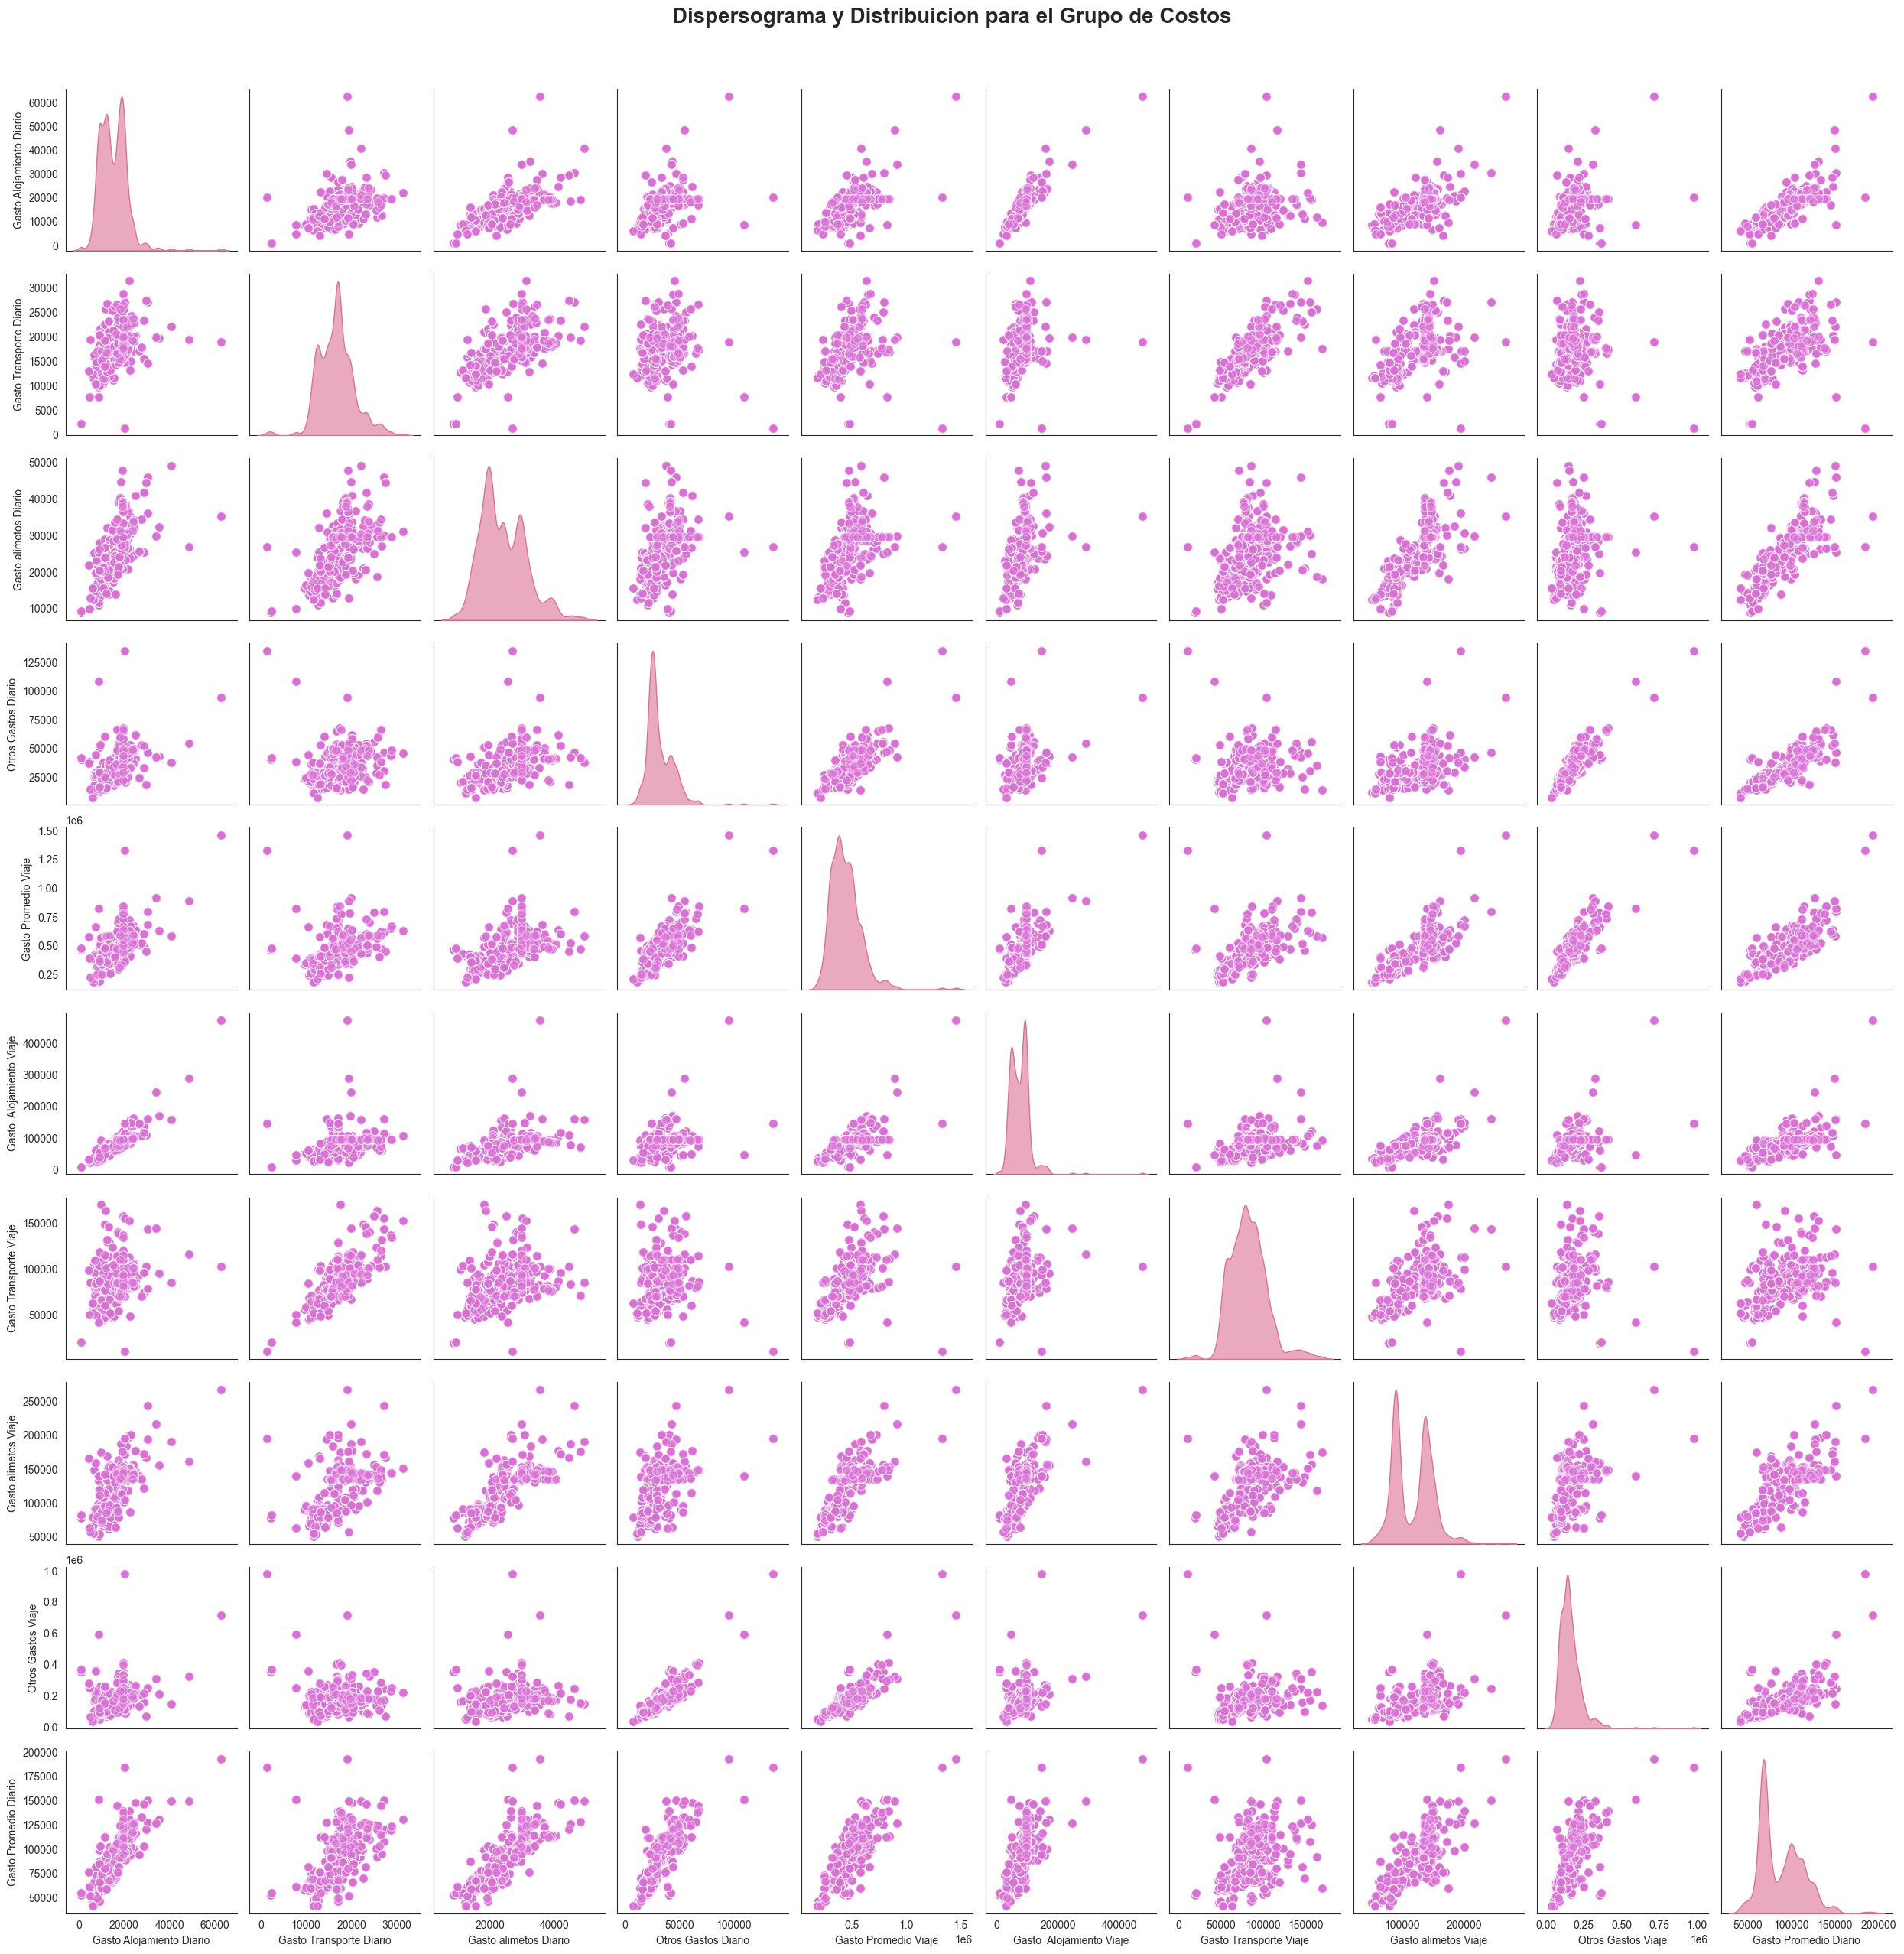

In [44]:
with sns.axes_style("white"):
    pairplot = sns.pairplot(base_final[variables + ['Gasto Promedio Diario']], diag_kind='kde', corner=False,plot_kws={'alpha':0.6 ,'color': '#DA70D6' ,'s': 70} ,
    diag_kws={'color': '#DB7093','fill': True, 'alpha': 0.6 })
    pairplot.fig.suptitle('Dispersograma y Distribuicion para el Grupo de Costos', fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.grid(False)
    plt.show()

## Analisis Variable dependiente = Nmero Extranjeros

In [12]:
tabla_inical = Medidas_Centrales(base_final , 'Nmero Extranjeros')
tabla_dispercion = Medidas_Dispersion(base_final , 'Nmero Extranjeros')
tabla_forma = Medidas_Forma(base_final , 'Nmero Extranjeros')



'''
Podemos ver que existen varios datos atipcios en nuestra variable dependiente, cosa que es evidente dado que no podemos comparar el flujo de turismo de ciudades como bogota, medelin, cartagena
con el flujo de turismo de ciudades como Pitalito o Mitu. Es asi como el rango es muy grande, igual que la kurtosis y la asimetria presenta colas muy pesadas.
'''
pd.concat([tabla_inical, tabla_dispercion, tabla_forma], axis=1)


Variable        Media  Mediana  Moda           Variable  \
0  Nmero Extranjeros  2859.065638     91.0   1.0  Nmero Extranjeros   

       Varianza  Desviacion Estandar    Maximo  Minimo     Rango  \
0  1.805250e+08         13435.960674  152457.0     0.0  152457.0   

            Variable  Asimetria   Kurtosis  
0  Nmero Extranjeros   6.861403  55.005053

## Grafico de correlacion 

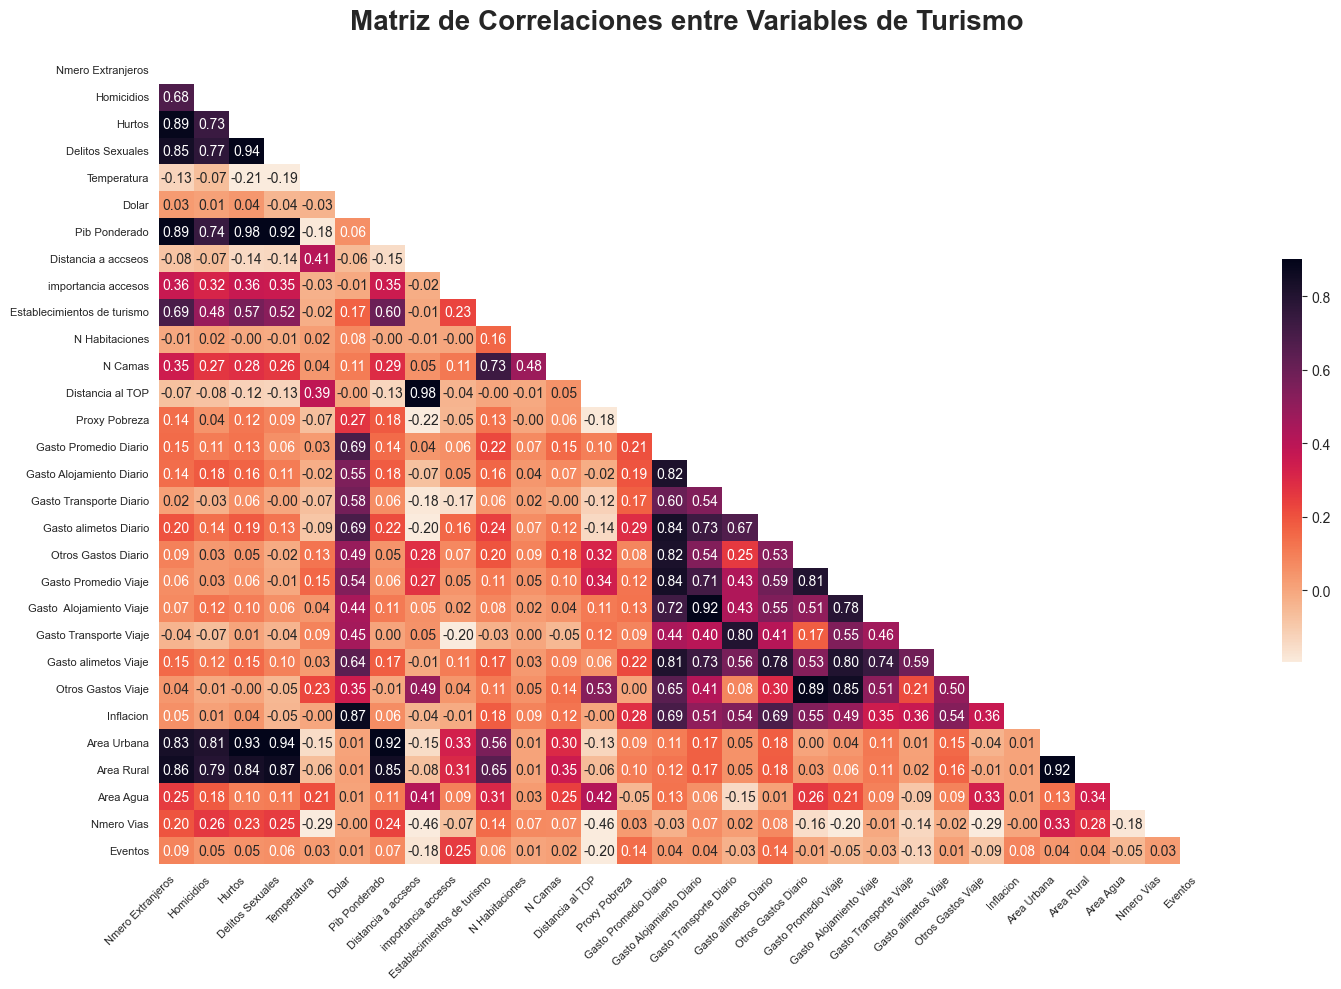

In [50]:

import seaborn as sns

Base_Turismo_PD2 = base_final[['Nmero Extranjeros', 'Homicidios', 'Hurtos',
       'Delitos Sexuales', 'Temperatura', 'Dolar',
       'Pib Ponderado', 'Distancia a accseos','importancia accesos',
       'Establecimientos de turismo', 'N Habitaciones', 'N Camas', 'Distancia al TOP',
       'Proxy Pobreza', 'Gasto Promedio Diario', 'Gasto Alojamiento Diario',
       'Gasto Transporte Diario', 'Gasto alimetos Diario',
       'Otros Gastos Diario', 'Gasto Promedio Viaje',
       'Gasto  Alojamiento Viaje', 'Gasto Transporte Viaje',
       'Gasto alimetos Viaje', 'Otros Gastos Viaje' , 'Inflacion' , 'Area Urbana' , 'Area Rural' , 'Area Agua' ,'Nmero Vias' ,'Eventos']]

correlation_matrix = Base_Turismo_PD2.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
with sns.axes_style("white"):
    with sns.plotting_context(font_scale=0.8):
        plt.figure(figsize=(15, 10))
        sns.heatmap(correlation_matrix, mask=mask, cmap='rocket_r' , annot=True, fmt=".2f", robust=True, linecolor='white',
            cbar_kws={"shrink": .5, "ticks": np.linspace(-1, 1, 11)},)
        plt.title('Matriz de Correlaciones entre Variables de Turismo', fontsize=20, weight='bold', pad=20)
        plt.xticks(rotation=45, ha='right', fontsize=8)
        plt.yticks(rotation=0, fontsize=8)
        plt.tight_layout()
        plt.show()

### La matriz de correlaciones evidencia que el turismo en Colombia está fuertemente influido por la infraestructura, el desarrollo económico y la conectividad. Variables como el número de camas y establecimientos turísticos tienen una alta correlación con la cantidad de turistas extranjeros, mientras que el PIB ponderado también se relaciona positivamente con el flujo de visitantes y su capacidad de gasto, especialmente en alojamiento. Aunque los índices de criminalidad como hurtos, homicidios y delitos sexuales presentan correlaciones moderadas con el número de turistas, estos factores no parecen ser una barrera determinante para la afluencia turística. Por otro lado, las áreas urbanas tienen una relación positiva con el turismo, destacando que los destinos urbanos son más atractivos, mientras que las áreas rurales y acuáticas tienen una menor relevancia directa. En conjunto, estos datos subrayan la importancia de invertir en infraestructura y conectividad para potenciar el turismo, al tiempo que se promueve un desarrollo regional equilibrado que aborde las diferencias entre áreas urbanas y rurales, sin descuidar la seguridad como factor complementario.

# Grafica de la variable dependiente

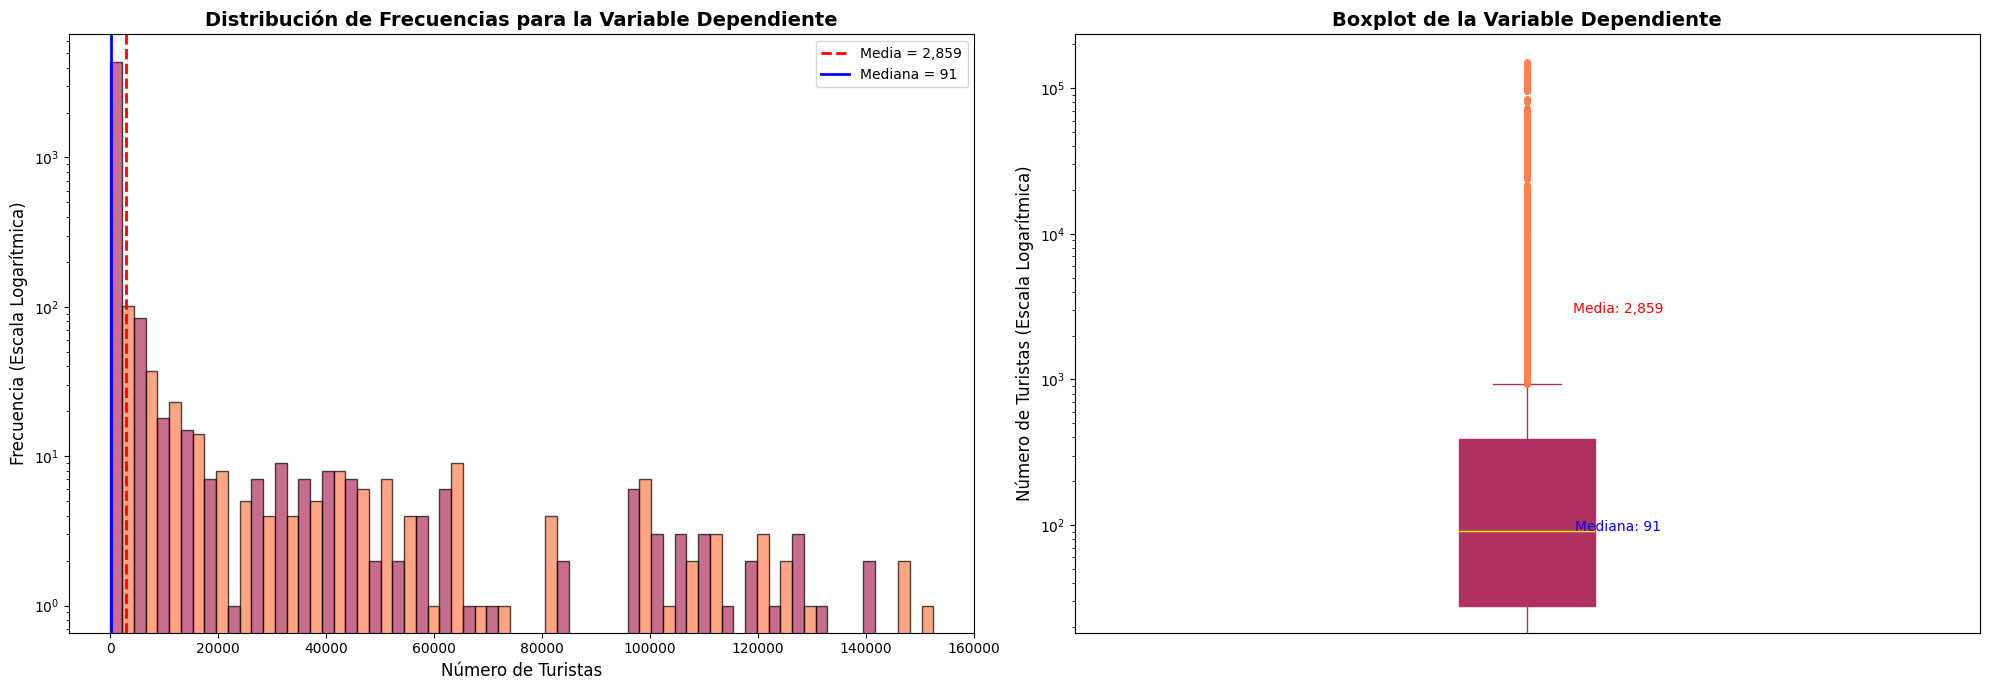

In [15]:
import matplotlib.pyplot as plt

frecuencia_categorias = base_final['Nmero Extranjeros']
media_variable1 = base_final['Nmero Extranjeros'].mean()
mediana_variable1 = base_final['Nmero Extranjeros'].median()
color = ['#B03060', '#FF7F50']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 7))

ax1 = axes[0]
n, bins, patches = ax1.hist(frecuencia_categorias, bins=math.ceil(math.sqrt(len(base_final['Nmero Extranjeros']))), alpha=0.7,edgecolor='black') # Usamos para el numero de BINS sqrt(x) 
for i, patch in enumerate(patches):
    patch.set_facecolor(color[i % len(color)])
ax1.axvline(x=media_variable1, color='red', linestyle='dashed', linewidth=2, label=f'Media = {media_variable1:,.0f}')
ax1.axvline(x=mediana_variable1, color='blue', linestyle='-', linewidth=2, label=f'Mediana = {mediana_variable1:,.0f}')
ax1.legend()
ax1.set_yscale('log') #Aplicamos logaritmo al eje y para que todos los bins se puedan ver
ax1.set_title('Distribución de Frecuencias para la Variable Dependiente', fontsize=14, weight='bold')
ax1.set_xlabel('Número de Turistas', fontsize=12)
ax1.set_ylabel('Frecuencia (Escala Logarítmica)', fontsize=12)

ax2 = axes[1]
box = ax2.boxplot(frecuencia_categorias, vert=True, patch_artist=True,boxprops=dict(facecolor='#B03060', color='#B03060'),medianprops=dict(color='yellow'),
    whiskerprops=dict(color='#B03060'),capprops=dict(color='#B03060'),flierprops=dict(marker='o', markerfacecolor='#FF7F50', markersize=5, linestyle='none', markeredgecolor='none'))
ax2.set_title('Boxplot de la Variable Dependiente', fontsize=14, weight='bold')
ax2.set_ylabel('Número de Turistas (Escala Logarítmica)', fontsize=12)
ax2.text(1.1, media_variable1, f'Media: {media_variable1:,.0f}', horizontalalignment='center', color='red', fontsize=10)
ax2.text(1.1, mediana_variable1, f'Mediana: {mediana_variable1:,.0f}', horizontalalignment='center', color='blue', fontsize=10)
ax2.set_xticks([])
ax2.set_yscale('log')


plt.tight_layout()
plt.show()  

### La distribución de la variable dependiente está altamente sesgada hacia valores bajos, con pocos casos extremos de ciudades con una alta cantidad de turistas que dominan la media. Esto sugiere que el modelo para predecir el número de turistas deberá manejar adecuadamente los valores extremos, posiblemente mediante transformaciones de la variable (e.g., logarítmica) o utilizando métricas robustas frente a outliers. Además, es crucial segmentar las ciudades por niveles de atracción turística para evitar que los valores extremos distorsionen las predicciones para las ciudades con menor afluencia.

# Graficos Utiles para analizar toda la estructura de los datos

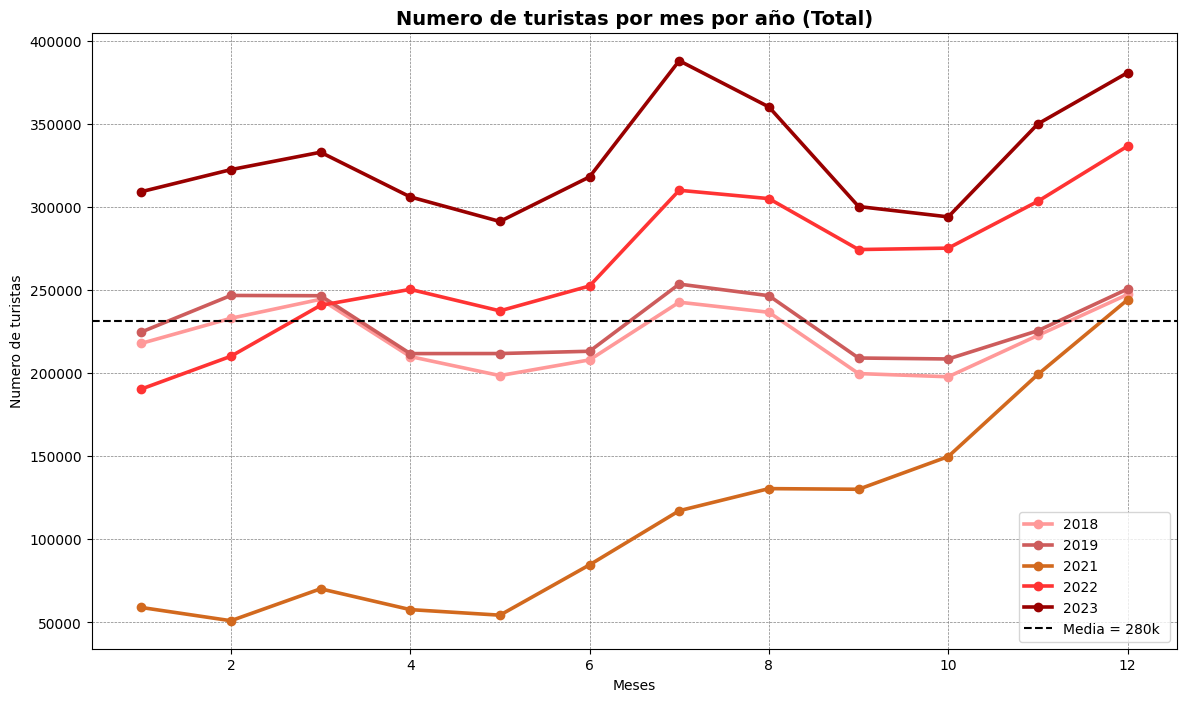

In [171]:

data ={}
df = pd.DataFrame(data)
df['año'] = base_final['Mes'].dt.year
df['mes'] = base_final['Mes'].dt.month
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']

df = df.groupby(['año', 'mes'])['Nmero Extranjeros'].sum().reset_index()
media_variable1 = df['Nmero Extranjeros'].mean()
meses_2018 = np.arange(1, 13) 

plt.figure(figsize=(14, 8))    
plt.plot(meses_2018, df[df['año']==2018]['Nmero Extranjeros'] ,label="2018", 
         linewidth=2.6 , color='#FF9999', marker='o')
plt.plot(meses_2018, df[df['año']==2019]['Nmero Extranjeros'] ,label="2019", 
         linewidth=2.6 , color='#CD5C5C', marker='o')
plt.plot(meses_2018, df[df['año']==2021]['Nmero Extranjeros'] ,label="2021", 
         linewidth=2.6 , color='#D2691E', marker='o')
plt.plot(meses_2018, df[df['año']==2022]['Nmero Extranjeros'] ,label="2022", 
         linewidth=2.6 , color='#FF3333', marker='o')
plt.plot(meses_2018, df[df['año']==2023]['Nmero Extranjeros'] ,label="2023", 
         linewidth=2.6 , color='#990000', marker='o')
plt.axhline(media_variable1, color='Black', linestyle='--', label='Media = 280k ')
plt.xlabel('Meses')
plt.ylabel('Numero de turistas')
plt.title('Numero de turistas por mes por año (Total)', fontsize=14, weight='bold')
plt.grid(True, color='gray', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()

### La gráfica ilustra la evolución mensual del número total de turistas en Colombia entre 2018 y 2023, revelando patrones claros de estacionalidad y dinámicas de crecimiento a lo largo del tiempo. Se identifican dos temporadas fuertes: a mitad de año (junio a agosto) y al cierre del año (noviembre y diciembre), con los meses de enero y julio consistentemente destacándose como periodos de alta afluencia turística. En contraste, meses como abril y septiembre suelen registrar cifras más bajas, lo que sugiere una disminución de actividad en estos periodos.

### El impacto de eventos exógenos, como la pandemia de COVID-19, se evidencia claramente en los datos. Años como 2021 reflejan una recuperación tras la crisis de 2020, pero aún con cifras menores a las de los años pre-pandemia, como 2018 y 2019. A partir de 2022, y especialmente en 2023, se observa un crecimiento sostenido en el turismo, con picos significativos que superan consistentemente los 350,000 turistas en meses clave como julio y diciembre. Este aumento sugiere una reactivación económica robusta y una mejora en las dinámicas del sector turístico, posiblemente influenciadas por estrategias de promoción, mayor conectividad y cambios en las preferencias de los viajeros tras la pandemia.

### Aunque la media general de turistas se encuentra en aproximadamente 280,000, las cifras recientes de 2023 superan ampliamente este promedio, destacándose como un año excepcionalmente fuerte. Esto resalta la importancia de incorporar temporalidad y factores externos en los modelos predictivos para capturar los efectos de la estacionalidad y los cambios estructurales. Asimismo, los datos subrayan la necesidad de planificar infraestructuras y estrategias logísticas para atender los picos de demanda, así como de fortalecer las estrategias de promoción en meses con menor afluencia, optimizando así el potencial turístico del país.

C:\Users\alejo\AppData\Local\Temp\ipykernel_20636\166173475.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Extr_dep['Nmero Extranjeros'], y=Extr_dep.index, palette='viridis', ax=axes[1])


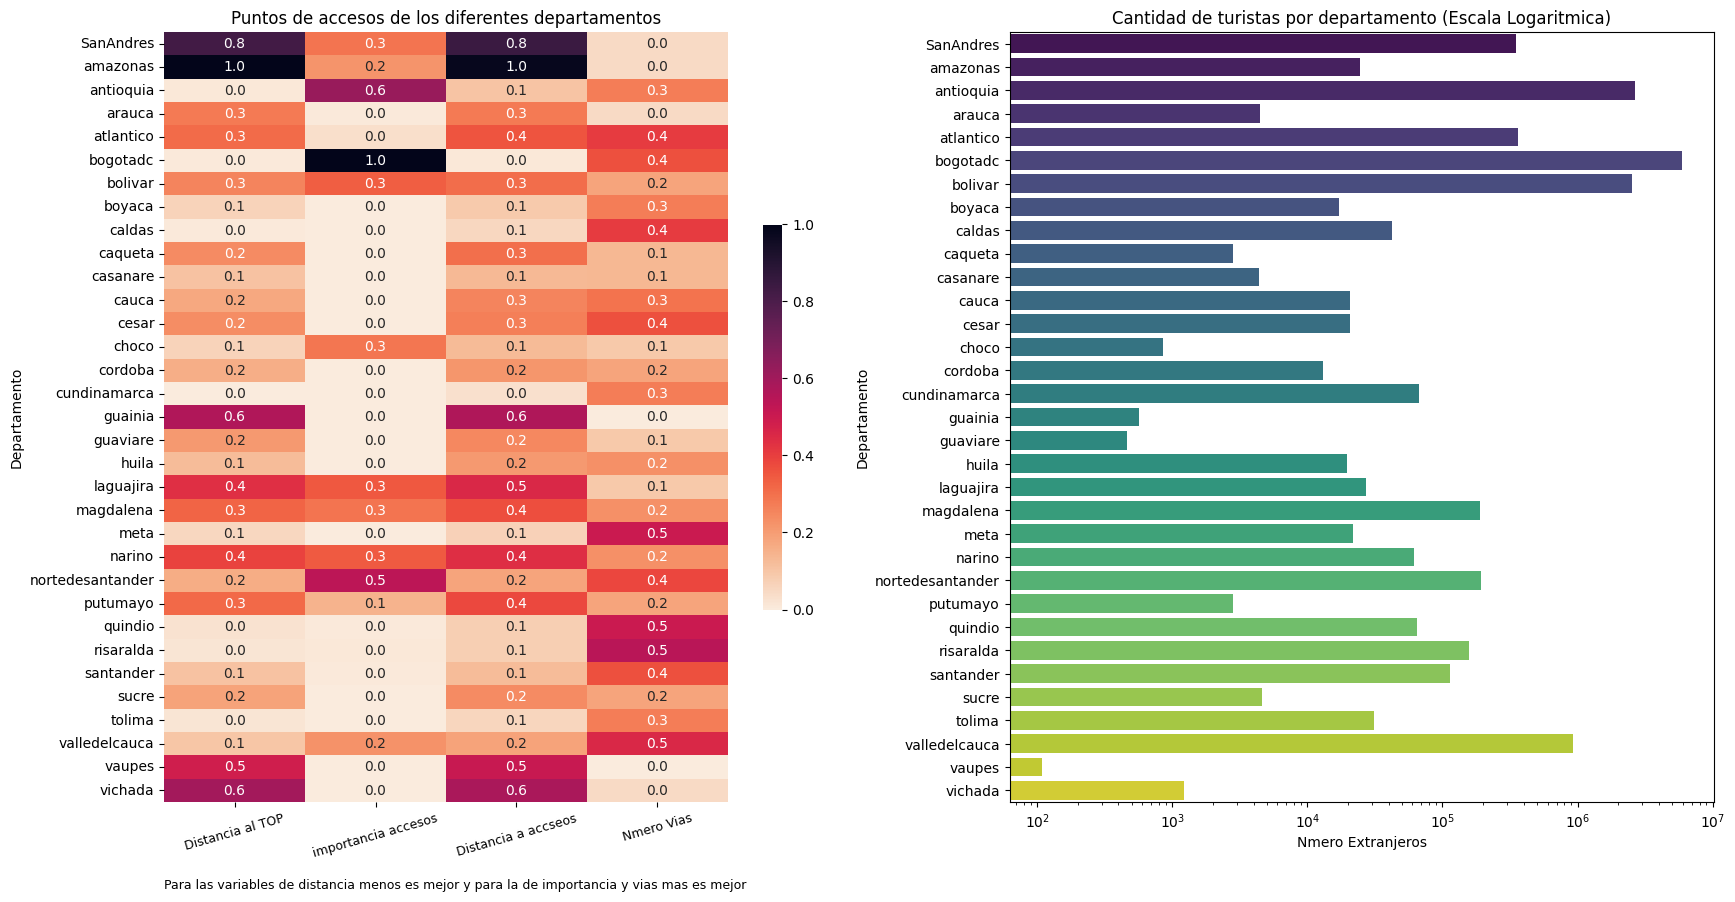

In [177]:
from sklearn.preprocessing import MinMaxScaler

data={}
df = pd.DataFrame(data)
df['Distancia al TOP'] = base_final['Distancia al TOP']
df['importancia accesos'] = base_final['importancia accesos']
df['Distancia a accseos'] = base_final['Distancia a accseos']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']
df['Nmero Vias'] = base_final['Nmero Vias']

scaler = MinMaxScaler()
df_normalizado = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalizado['Departamento'] = base_final['Departamento']
df_normalizado['Departamento'] = df_normalizado['Departamento'].str.replace('archipielagodesanandresprovidenciaysantacatalina', 'SanAndres', regex=False)
base_final['Departamento'] = base_final['Departamento'].str.replace('archipielagodesanandresprovidenciaysantacatalina', 'SanAndres', regex=False)

Extr_dep= base_final.groupby('Departamento')[['Nmero Extranjeros'  ,'Temperatura']].sum()
crime_data = df_normalizado.groupby('Departamento')[['Distancia al TOP', 'importancia accesos', 'Distancia a accseos' , 'Nmero Vias']].median()

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
sns.heatmap(crime_data, annot=True, fmt=".1f", cmap='rocket_r', ax=axes[0] ,cbar_kws={"shrink": .5, "ticks": np.linspace(-1, 1, 11)})
axes[0].text(0.0001, -0.1, 'Para las variables de distancia menos es mejor y para la de importancia y vias mas es mejor', transform=axes[0].transAxes, fontsize=9, ha='left', va='top')
axes[0].set_title('Puntos de accesos de los diferentes departamentos')
axes[0].tick_params(axis='x', rotation=16, labelsize=9)

sns.barplot(x=Extr_dep['Nmero Extranjeros'], y=Extr_dep.index, palette='viridis', ax=axes[1])
axes[1].set_title('Cantidad de turistas por departamento (Escala Logaritmica)')
axes[1].set_xscale('log')
plt.show()

### El primer gráfico de calor presenta una comparación de los puntos de acceso de los diferentes departamentos según varias métricas: distancia al TOP (entre menor, mejor), importancia de los accesos (entre mayor, mejor) y número de vías (entre mayor, mejor). Se observa que departamentos como San Andrés, Amazonas y Guainía tienen altos valores de importancia de acceso o puntos estratégicos destacados, mientras que departamentos como Antioquia y Cundinamarca tienen mejores conexiones en términos de vías y accesibilidad general. Por otro lado, departamentos como Vaupés y Vichada presentan valores bajos en la mayoría de las dimensiones, lo que refleja sus limitaciones en infraestructura y accesibilidad turística, lo cual puede ser un obstáculo para atraer visitantes.

### El segundo gráfico, una barra con escala logarítmica, muestra el número de turistas extranjeros por departamento. Cundinamarca (concentrado en Bogotá) y Antioquia son los principales destinos, seguidos por departamentos costeros como Atlántico, Bolívar y Magdalena, lo cual resalta la importancia del turismo hacia las regiones urbanas y costeras del país. En contraste, departamentos con bajos valores en el primer gráfico, como Vaupés, Vichada y Guaviare, también tienen una cantidad de turistas considerablemente baja, lo que confirma una correlación entre la accesibilidad y la atracción turística. Departamentos como San Andrés, aunque son islas, destacan tanto en accesibilidad (gracias a su posición estratégica) como en afluencia turística, reflejando su posición como un destino de alto valor turístico.

### Los gráficos reflejan una relación evidente entre infraestructura y conectividad con el flujo turístico, destacando cómo regiones con mejor accesibilidad atraen mayores volúmenes de turistas extranjeros. Esto sugiere que mejorar la infraestructura en regiones menos conectadas podría incentivar un aumento en el turismo hacia estas áreas. Los datos también resaltan la desigualdad regional en el desarrollo turístico, con una alta concentración en ciertas áreas mientras otras permanecen marginadas. Incorporar variables de accesibilidad y su impacto en las decisiones de viaje puede fortalecer un modelo predictivo para el flujo turístico.

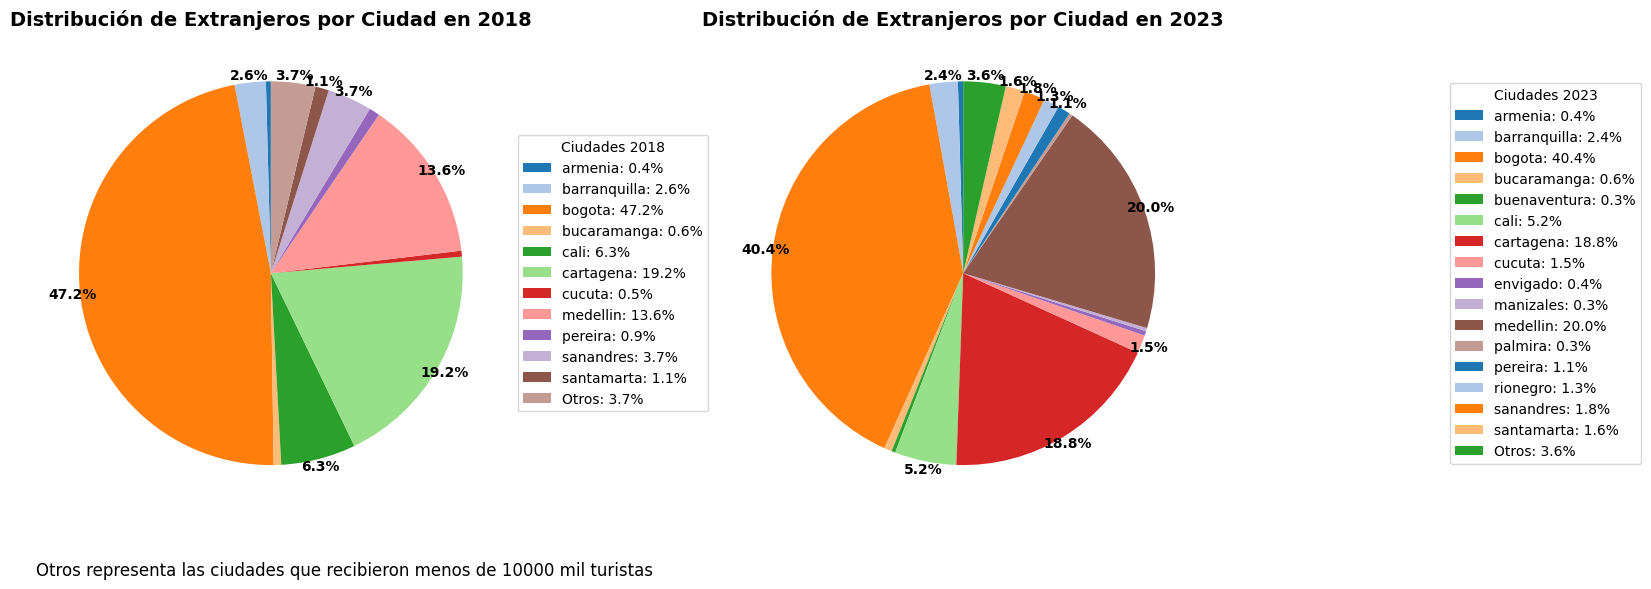

In [91]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']
df['Ciudad'] = base_final['Ciudad']

df_2018 = df[df['año'] == 2018]
df_2019 = df[df['año'] == 2023]

umbral = 10000

ciudades_2018 = df_2018.groupby('Ciudad')['Nmero Extranjeros'].sum()
ciudades_agrupadas_2018 = ciudades_2018[ciudades_2018 >= umbral]
otros_2018 = ciudades_2018[ciudades_2018 < umbral].sum()
ciudades_agrupadas_2018['Otros'] = otros_2018

ciudades_2019 = df_2019.groupby('Ciudad')['Nmero Extranjeros'].sum()
ciudades_agrupadas_2019 = ciudades_2019[ciudades_2019 >= umbral]
otros_2019 = ciudades_2019[ciudades_2019 < umbral].sum()
ciudades_agrupadas_2019['Otros'] = otros_2019

colores_2018 = plt.get_cmap('tab20')(range(len(ciudades_agrupadas_2018)))

fig, axes = plt.subplots(1, 2, figsize=(17, 10))

wedges_2018, texts_2018, autotexts_2018 = axes[0].pie(
    ciudades_agrupadas_2018, startangle=90, colors=colores_2018, autopct='')
porcentajes_2018 = [(ciudad, porcentaje) for ciudad, porcentaje in zip(ciudades_agrupadas_2018.index, (ciudades_agrupadas_2018 / ciudades_agrupadas_2018.sum()) * 100)]
for i, (wedge, (ciudad, porcentaje)) in enumerate(zip(wedges_2018, porcentajes_2018)):
    if porcentaje > 1:
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle)) * 1.04
        y = np.sin(np.deg2rad(angle)) * 1.04
        axes[0].text(x, y, f'{porcentaje:.1f}%', ha='center', va='center', fontsize=10, weight='bold')
axes[0].set_title('Distribución de Extranjeros por Ciudad en 2018', fontsize=14, weight='bold')


porcentajes_texto_2018 = [f'{ciudad}: {porcentaje:.1f}%' for ciudad, porcentaje in porcentajes_2018]
axes[0].legend(wedges_2018, porcentajes_texto_2018, title="Ciudades 2018", loc="center left", bbox_to_anchor=(1, 0.5))


wedges_2019, texts_2019, autotexts_2019 = axes[1].pie(ciudades_agrupadas_2019, startangle=90, colors=colores_2018, autopct='')
porcentajes_2019 = [(ciudad, porcentaje) for ciudad, porcentaje in zip(ciudades_agrupadas_2019.index, (ciudades_agrupadas_2019 / ciudades_agrupadas_2019.sum()) * 100)]
for i, (wedge, (ciudad, porcentaje)) in enumerate(zip(wedges_2019, porcentajes_2019)):
    if porcentaje >1:
        angle = (wedge.theta2 + wedge.theta1) / 2
        x = np.cos(np.deg2rad(angle)) * 1.04
        y = np.sin(np.deg2rad(angle)) * 1.04
        axes[1].text(x, y, f'{porcentaje:.1f}%', ha='center', va='center', fontsize=10, weight='bold')
    else:
        pass

axes[1].set_title('Distribución de Extranjeros por Ciudad en 2023', fontsize=14, weight='bold')
porcentajes_texto_2019 = [f'{ciudad}: {porcentaje:.1f}%' for ciudad, porcentaje in porcentajes_2019]
axes[1].legend(wedges_2019, porcentajes_texto_2019, title="Ciudades 2023", loc="center left", bbox_to_anchor=(1.5, 0.5))
axes[0].text(0.01, -0.1, 'Otros representa las ciudades que recibieron menos de 10000 mil turistas', transform=axes[0].transAxes, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()

### En 2018, Bogotá domina la distribución de turistas extranjeros con un 47.2% del total, seguido por Cartagena con 19.2% y Medellín con 13.6%. Estas tres ciudades concentran la mayor parte del turismo internacional, dejando a otras ciudades con participaciones marginales. Esto refleja una alta centralización del turismo en los principales centros urbanos y destinos costeros del país.

### Para 2023, Bogotá mantiene su liderazgo, aunque con una ligera disminución al 40.4%. Medellín experimenta un crecimiento significativo, alcanzando el 20%, posicionándose como un destino más competitivo. Cartagena se mantiene estable con el 18.8%. El resto de las ciudades continúan con participaciones bajas, destacándose Barranquilla y San Andrés con ligeros descensos.

### La comparación entre 2018 y 2023 muestra una tendencia hacia una distribución más equilibrada del turismo internacional, aunque sigue existiendo una concentración significativa en pocas ciudades. Esto indica la necesidad de diversificar la oferta turística para promover destinos menos explorados y reducir la dependencia de los principales polos turísticos.

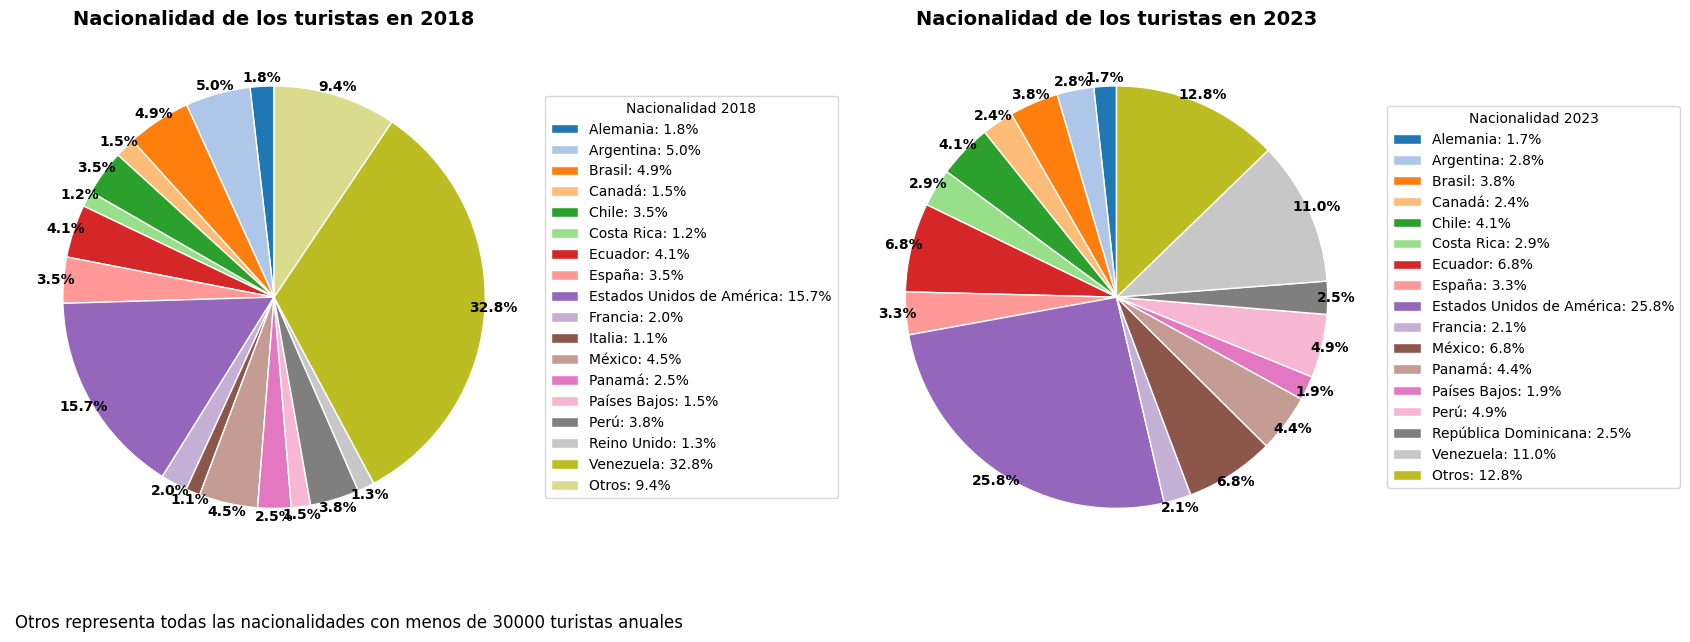

In [322]:
nacionalidades = pd.read_csv('C:\\Users\\alejo\\OneDrive\\Escritorio\\Universidaad\\Colab Notebooks\\Ia en economia\\Proyecto\\Entradas_de_extranjeros_a_Colombia_20241006.csv')
nacionalidades['Nacionalidad'] = nacionalidades['Nacionalidad'].str.replace('Reino Unido de Gran Bretaña e Irlanda del Norte', "Reino Unido", regex=False)
nacionalidades = nacionalidades[nacionalidades['Año'] > 2017]
umbral = 30000

nacionalidades2018 = nacionalidades[nacionalidades['Año'] ==2018]
nacionalidades2018 =nacionalidades2018.groupby('Nacionalidad')['Total'].sum()
ciudades_agrupadas_2018 = nacionalidades2018[nacionalidades2018 >= umbral]
otros_2018 = nacionalidades2018[nacionalidades2018 < umbral].sum()
ciudades_agrupadas_2018['Otros'] = otros_2018

nacionalidades2023 = nacionalidades[nacionalidades['Año'] ==2023]
nacionalidades2023 =nacionalidades2023.groupby('Nacionalidad')['Total'].sum()
ciudades_agrupadas_2023 = nacionalidades2023[nacionalidades2023 >= umbral]
otros_2023 = nacionalidades2023[nacionalidades2023 < umbral].sum()
ciudades_agrupadas_2023['Otros'] = otros_2023


colores = plt.get_cmap('tab20')(range(len(ciudades_agrupadas_2018)))
fig, axes = plt.subplots(1, 2, figsize=(17, 10))

def plot_pie(ax, data, year, colors):
    wedges, texts, autotexts = ax.pie(data, startangle=90, colors=colors, autopct='',wedgeprops={'edgecolor': 'white'}) 
    
    porcentajes = [(ciudad, porcentaje) for ciudad, porcentaje in zip(data.index, (data / data.sum()) * 100)]
    
    for wedge, (ciudad, porcentaje) in zip(wedges, porcentajes):
        if porcentaje > 1:
            angle = (wedge.theta2 + wedge.theta1) / 2
            x = np.cos(np.deg2rad(angle)) * 1.04
            y = np.sin(np.deg2rad(angle)) * 1.04
            ax.text(x, y, f'{porcentaje:.1f}%', ha='center', va='center',
                    fontsize=10, weight='bold')
        else:
            pass
    ax.set_title(f'Nacionalidad de los turistas en {year}',fontsize=14, weight='bold')
    porcentajes_texto = [f'{ciudad}: {porcentaje:.1f}%' for ciudad, porcentaje in porcentajes]
    ax.legend(wedges, porcentajes_texto, title=f"Nacionalidad {year}",loc="center left", bbox_to_anchor=(1, 0.5))


plot_pie(axes[0], ciudades_agrupadas_2018, 2018, colores)
plot_pie(axes[1], ciudades_agrupadas_2023, 2023, colores)

axes[0].text(0.01, -0.1, 'Otros representa todas las nacionalidades con menos de 30000 turistas anuales',
             transform=axes[0].transAxes, fontsize=12, ha='left', va='top')

plt.tight_layout()
plt.show()

### En 2018, la distribución de turistas por nacionalidad estuvo dominada por visitantes de Venezuela, representando un 32.8% del total, seguido por Estados Unidos con 15.7%. Otros países como Argentina, Brasil y México contribuyeron con porcentajes menores, mientras que el grupo "Otros" abarcó un 9.4%, reflejando una diversificación limitada en el origen de los turistas internacionales. Este patrón refleja una gran dependencia de turistas provenientes de Venezuela, probablemente influida por movimientos migratorios y no exclusivamente por turismo tradicional.

### En 2023, se observa una redistribución significativa. Estados Unidos se posiciona como la principal fuente de turistas con un 25.8%, mientras que Venezuela reduce su participación al 11%. Otros países como México y Ecuador ganan relevancia, alcanzando un 6.8% cada uno, mientras que el grupo "Otros" aumenta a 12.8%, evidenciando una mayor diversidad en las nacionalidades de los visitantes. Este cambio sugiere una transición hacia un turismo más diversificado y menos concentrado en una sola región.

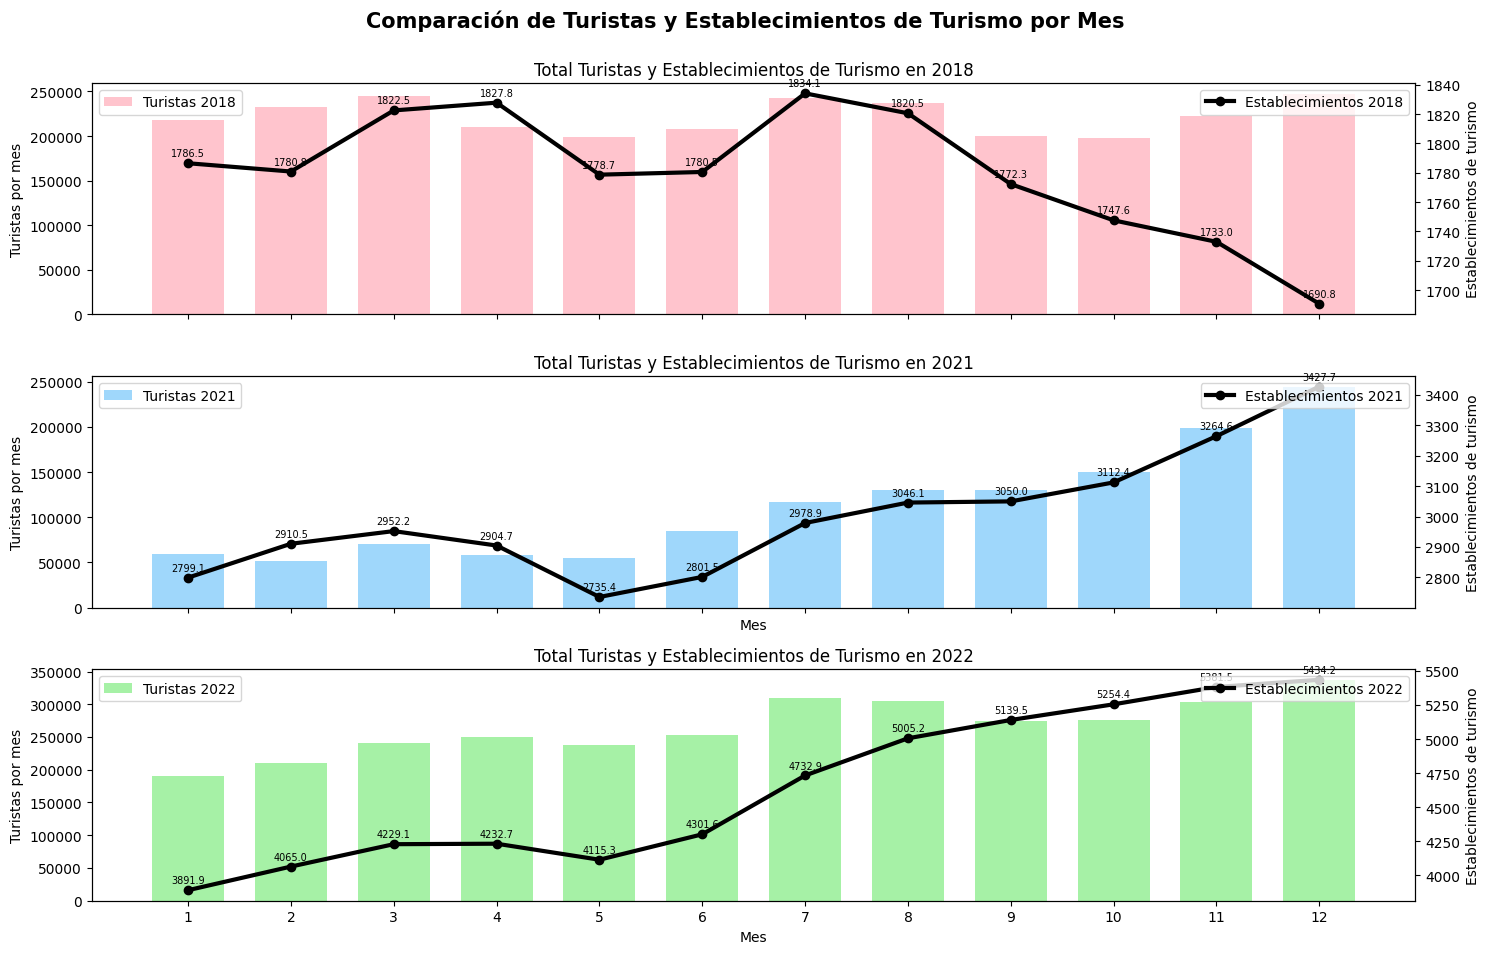

In [318]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Establecimientos de turismo'] = base_final['Establecimientos de turismo']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']

def group(df , aa):
    df = df[df['año'] == aa]
    final1 = df.groupby('mes')['Establecimientos de turismo'].sum()
    final = df.groupby('mes')['Nmero Extranjeros'].sum()
    return final1 , final 

Establecimientos_2018 , turistas_2018 = group(df , 2018)
Establecimientos_2021 , turistas_2021 = group(df , 2021)
Establecimientos_2023 , turistas_2023 = group(df , 2022)


fig, (ax1, ax3, ax5) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
meses = range(1, 13)

#Grafico para 2018
ax1.bar(turistas_2018.index, turistas_2018, color='#FFB6C1', alpha=0.8, width=0.7, label='Turistas 2018')
ax1.set_ylabel('Turistas por mes')
ax1.tick_params(axis='y')
ax1.set_xticks(meses)
ax1.set_xticklabels(meses)
ax2 = ax1.twinx()
ax2.plot(turistas_2018.index, Establecimientos_2018, color='black', marker='o', linewidth=3, label='Establecimientos 2018')
ax2.set_ylabel('Establecimientos de turismo')
ax2.tick_params(axis='y')
for mes, valor in Establecimientos_2018.items():
    ax2.annotate(f'{valor:.1f}', (mes, valor), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=7)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title('Total Turistas y Establecimientos de Turismo en 2018', fontsize=12)

#Grafico para 2021
ax3.bar(turistas_2021.index, turistas_2021, color='#87CEFA', alpha=0.8, width=0.7, label='Turistas 2021')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Turistas por mes')
ax3.tick_params(axis='y')
ax3.set_xticks(meses)
ax3.set_xticklabels(meses)
ax4 = ax3.twinx()
ax4.plot(turistas_2021.index, Establecimientos_2021, color='black', marker='o', linewidth=3, label='Establecimientos 2021')
ax4.set_ylabel('Establecimientos de turismo')
ax4.tick_params(axis='y')
for mes, valor in Establecimientos_2021.items():
    ax4.annotate(f'{valor:.1f}', (mes, valor), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=7)
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.set_title('Total Turistas y Establecimientos de Turismo en 2021', fontsize=12)

#Grafico para 2023
ax5.bar(turistas_2023.index, turistas_2023, color='#90EE90', alpha=0.8, width=0.7, label='Turistas 2022')
ax5.set_xlabel('Mes')
ax5.set_ylabel('Turistas por mes')
ax5.tick_params(axis='y')
ax5.set_xticks(meses)
ax5.set_xticklabels(meses)
ax5.set_title('Total Turistas y Establecimientos de Turismo en 2022', fontsize=12)
ax6 = ax5.twinx()
ax6.plot(turistas_2023.index, Establecimientos_2023, color='black', marker='o', linewidth=3, label='Establecimientos 2022')
ax6.set_ylabel('Establecimientos de turismo')
ax6.tick_params(axis='y')
for mes, valor in Establecimientos_2023.items():
    ax6.annotate(f'{valor:.1f}',(mes, valor),textcoords="offset points",xytext=(0, 5), ha='center',fontsize=7)
ax5.legend(loc='upper left')
ax6.legend(loc='upper right')

fig.suptitle('Comparación de Turistas y Establecimientos de Turismo por Mes', fontsize=15, y=0.95, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Los gráficos muestran la relación entre el número total de turistas y los establecimientos de turismo por mes para los años 2018, 2021 y 2022. En 2018, el número de turistas se mantiene relativamente estable, con picos en los meses de julio y diciembre, mientras que la cantidad de establecimientos de turismo muestra una ligera disminución hacia finales del año. Esto refleja una capacidad de infraestructura turística que no varía significativamente durante el año, a pesar de las fluctuaciones en la demanda.

### En 2021, después de los efectos de la pandemia, se observa una recuperación en el turismo con un patrón estacional más marcado. Los meses finales muestran incrementos tanto en turistas como en establecimientos, destacando el esfuerzo del sector por adaptarse al aumento en la demanda. Sin embargo, los valores absolutos de turistas son menores que en 2018, indicando que el sector aún estaba en recuperación.

### Para 2022, el crecimiento es evidente, con un número considerablemente mayor de turistas y un incremento sostenido en los establecimientos de turismo, alcanzando su punto máximo en diciembre. Esto sugiere una expansión en la capacidad de infraestructura turística, probablemente en respuesta al aumento de la demanda, reflejando una reactivación económica robusta y una mayor resiliencia del sector.

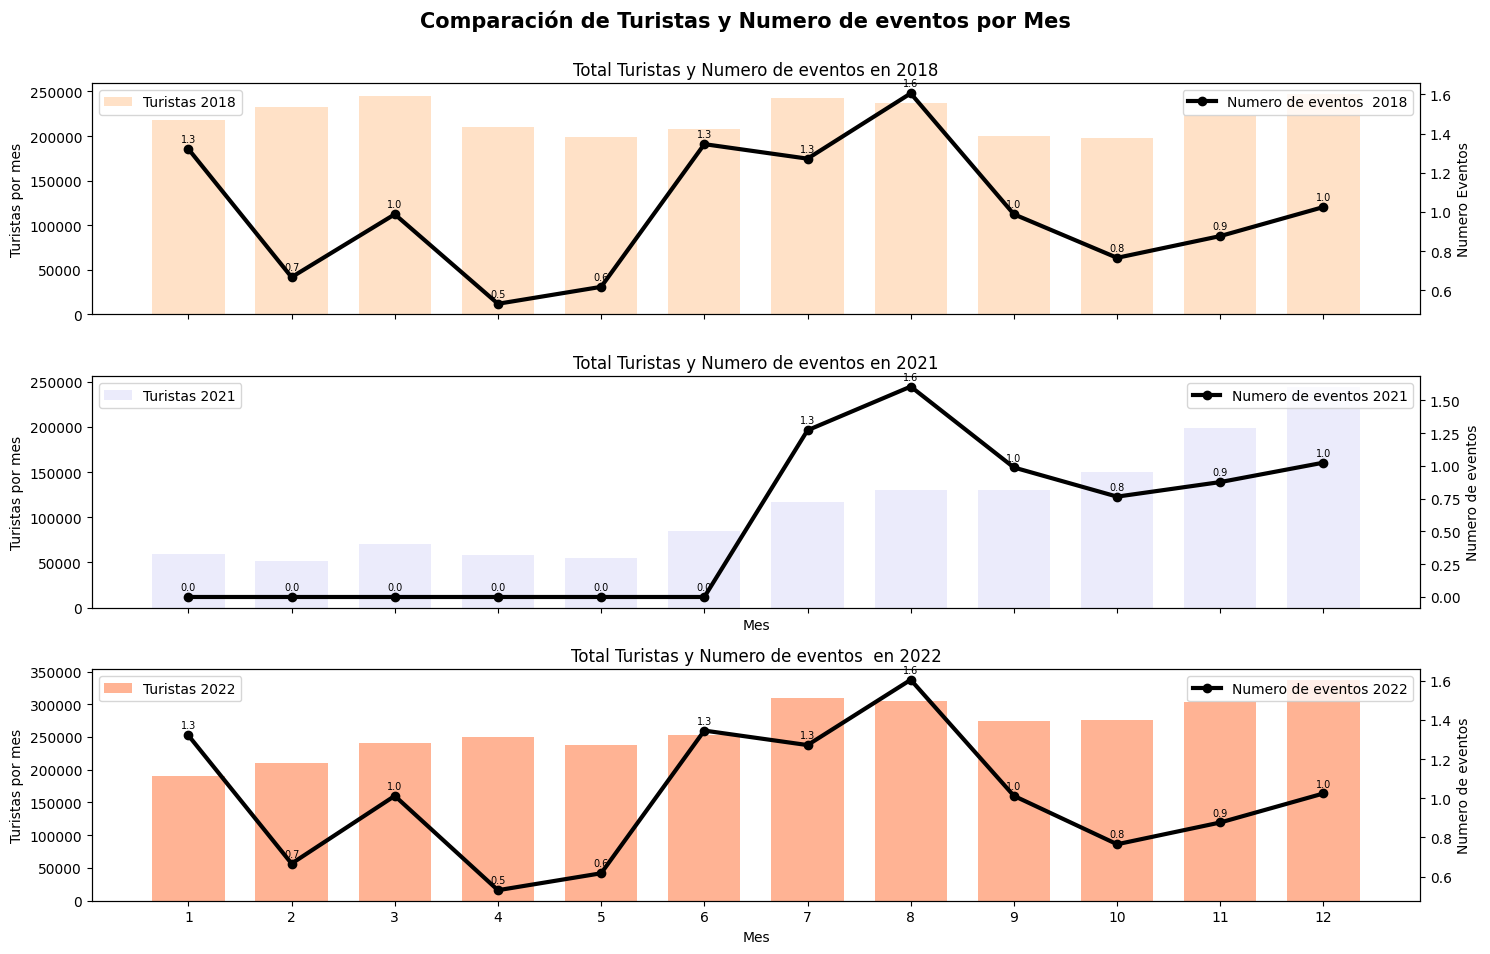

In [185]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Establecimientos de turismo'] = base_final['Eventos']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']

def group(df , aa):
    df = df[df['año'] == aa]
    final1 = df.groupby('mes')['Establecimientos de turismo'].mean()
    final = df.groupby('mes')['Nmero Extranjeros'].sum()
    return final1 , final 

Establecimientos_2018 , turistas_2018 = group(df , 2018)
Establecimientos_2021 , turistas_2021 = group(df , 2021)
Establecimientos_2023 , turistas_2023 = group(df , 2022)


fig, (ax1, ax3, ax5) = plt.subplots(nrows=3, figsize=(15, 10), sharex=True)
meses = range(1, 13)

#Grafico para 2018
ax1.bar(turistas_2018.index, turistas_2018, color='#FFDAB9', alpha=0.8, width=0.7, label='Turistas 2018')
ax1.set_ylabel('Turistas por mes')
ax1.tick_params(axis='y')
ax1.set_xticks(meses)
ax1.set_xticklabels(meses)
ax2 = ax1.twinx()
ax2.plot(turistas_2018.index, Establecimientos_2018, color='black', marker='o', linewidth=3, label='Numero de eventos  2018')
ax2.set_ylabel('Numero Eventos')
ax2.tick_params(axis='y')
for mes, valor in Establecimientos_2018.items():
    ax2.annotate(f'{valor:.1f}', (mes, valor), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=7)
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
ax1.set_title('Total Turistas y Numero de eventos en 2018', fontsize=12)

#Grafico para 2021
ax3.bar(turistas_2021.index, turistas_2021, color='#E6E6FA', alpha=0.8, width=0.7, label='Turistas 2021')
ax3.set_xlabel('Mes')
ax3.set_ylabel('Turistas por mes')
ax3.tick_params(axis='y')
ax3.set_xticks(meses)
ax3.set_xticklabels(meses)
ax4 = ax3.twinx()
ax4.plot(turistas_2021.index, Establecimientos_2021, color='black', marker='o', linewidth=3, label='Numero de eventos 2021')
ax4.set_ylabel('Numero de eventos')
ax4.tick_params(axis='y')
for mes, valor in Establecimientos_2021.items():
    ax4.annotate(f'{valor:.1f}', (mes, valor), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=7)
ax3.legend(loc='upper left')
ax4.legend(loc='upper right')
ax3.set_title('Total Turistas y Numero de eventos en 2021', fontsize=12)

#Grafico para 2023
ax5.bar(turistas_2023.index, turistas_2023, color='#FFA07A', alpha=0.8, width=0.7, label='Turistas 2022')
ax5.set_xlabel('Mes')
ax5.set_ylabel('Turistas por mes')
ax5.tick_params(axis='y')
ax5.set_xticks(meses)
ax5.set_xticklabels(meses)
ax5.set_title('Total Turistas y Numero de eventos  en 2022', fontsize=12)
ax6 = ax5.twinx()
ax6.plot(turistas_2023.index, Establecimientos_2023, color='black', marker='o', linewidth=3, label='Numero de eventos 2022')
ax6.set_ylabel('Numero de eventos')
ax6.tick_params(axis='y')
for mes, valor in Establecimientos_2023.items():
    ax6.annotate(f'{valor:.1f}',(mes, valor),textcoords="offset points",xytext=(0, 5), ha='center',fontsize=7)
ax5.legend(loc='upper left')
ax6.legend(loc='upper right')

fig.suptitle('Comparación de Turistas y Numero de eventos por Mes', fontsize=15, y=0.95, fontweight='bold')
fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Estos gráficos muestran la relación entre el total de turistas y el número de eventos realizados por mes en los años 2018, 2021 y 2022. En 2018, se observa que los meses con mayor número de eventos (como julio y diciembre) coinciden con picos en el número de turistas. Esto sugiere una correlación positiva entre la organización de eventos y el flujo turístico, donde la actividad cultural y social podría estar atrayendo más visitantes.

### En 2021, el número de eventos es significativamente menor o nulo durante la primera mitad del año, reflejando los efectos de las restricciones por la pandemia de COVID-19. Los turistas comienzan a incrementarse nuevamente hacia el segundo semestre, alineándose con la reactivación de algunos eventos y la recuperación parcial del sector turístico. Sin embargo, la cantidad total de turistas sigue siendo inferior a 2018, indicando que la recuperación aún era limitada.

### En 2022, se aprecia una recuperación mucho más robusta tanto en el número de turistas como de eventos. Los picos turísticos, nuevamente, se concentran en meses con mayor actividad de eventos, como julio y diciembre. Esto refuerza la importancia de los eventos como un motor clave para atraer turistas, especialmente en un contexto de reactivación económica post-pandemia.

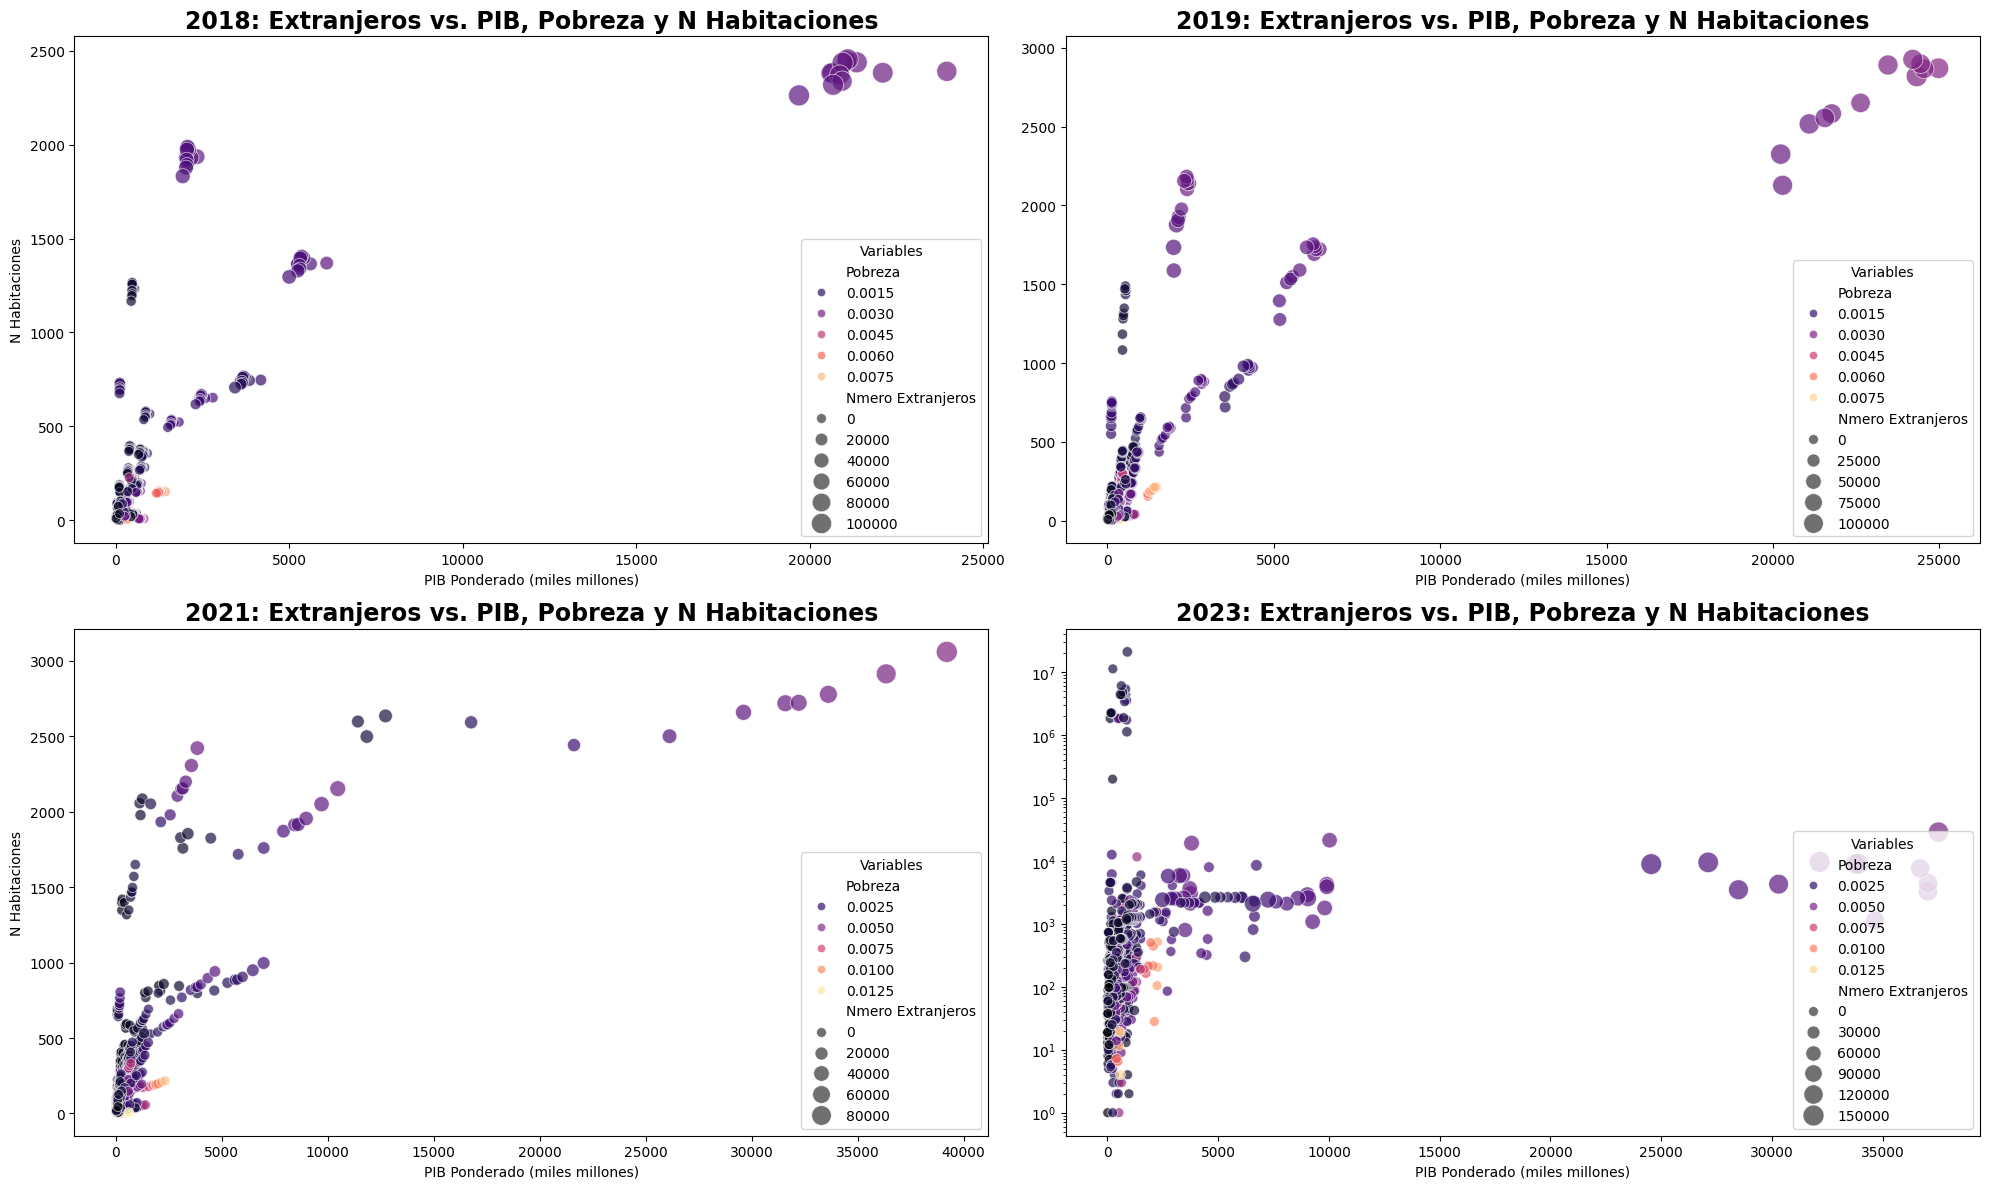

In [151]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Establecimientos de turismo'] = base_final['N Habitaciones']
df['Pib Ponderado'] = base_final['Pib Ponderado']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']
df['Pobreza'] = base_final['Proxy Pobreza'] 

df_2018 = df[df['año'] == 2018]
df_2019 = df[df['año'] == 2019]
df_2021 = df[df['año'] == 2021]
df_2023 = df[df['año'] == 2023]

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

sns.scatterplot(x=df_2018['Pib Ponderado'], y=df_2018['Establecimientos de turismo'], size=df_2018['Nmero Extranjeros'], hue=df_2018['Pobreza'] , sizes=(50, 230), data=df, alpha=0.7 ,palette='magma' ,
ax= axes[0, 0],)
axes[0,0].set_title('2018: Extranjeros vs. PIB, Pobreza y N Habitaciones', fontsize=17, fontweight='bold')
axes[0,0].set_xlabel('PIB Ponderado (miles millones)')
axes[0,0].set_ylabel('N Habitaciones')

sns.scatterplot(x=df_2019['Pib Ponderado'], y=df_2019['Establecimientos de turismo'], size=df_2019['Nmero Extranjeros'], hue=df_2019['Pobreza'], sizes=(50, 230), data=df, alpha=0.7 ,palette='magma' ,
ax= axes[0 , 1])
axes[0,1].set_title('2019: Extranjeros vs. PIB, Pobreza y N Habitaciones', fontsize=17, fontweight='bold')
axes[0,1].set_xlabel('PIB Ponderado (miles millones)')
axes[0,1].set_ylabel('')

sns.scatterplot(x=df_2021['Pib Ponderado'], y=df_2021['Establecimientos de turismo'], size=df_2021['Nmero Extranjeros'],  hue=df_2021['Pobreza'], sizes=(50, 230), data=df, alpha=0.7 ,palette='magma' ,
ax= axes[1, 0])
axes[1,0].set_title('2021: Extranjeros vs. PIB, Pobreza y N Habitaciones', fontsize=17, fontweight='bold')
axes[1,0].set_xlabel('PIB Ponderado (miles millones)')
axes[1,0].set_ylabel('N Habitaciones')

sns.scatterplot(x=df_2023['Pib Ponderado'], y=df_2023['Establecimientos de turismo'], size=df_2023['Nmero Extranjeros'], hue=df_2023['Pobreza'] ,sizes=(50, 230), data=df, alpha=0.7 ,palette='magma' ,
ax= axes[1, 1])
axes[1,1].set_title('2023: Extranjeros vs. PIB, Pobreza y N Habitaciones', fontsize=17, fontweight='bold')
axes[1,1].set_xlabel('PIB Ponderado (miles millones)')
axes[1,1].set_ylabel('')
axes[1, 1].set_yscale('log')

for ax in axes.flat:
    ax.legend(title='Variables', loc='lower right', bbox_to_anchor=(1, 0))

plt.tight_layout()
plt.show()

### Los gráficos comparan el número de turistas extranjeros con el PIB ponderado, la pobreza y el número de habitaciones en cuatro años distintos (2018, 2019, 2021 y 2023). En general, se observa que las ciudades con mayores PIB ponderados y menor pobreza tienden a concentrar más turistas extranjeros y mayor cantidad de habitaciones disponibles, lo que refleja la relación entre el desarrollo económico, la infraestructura y la atracción turística.

### En 2018 y 2019, los puntos más destacados corresponden a ciudades con alto PIB y niveles bajos de pobreza, como Bogotá, Medellín y Cartagena, que atraen la mayoría de los turistas. Sin embargo, en 2021, el efecto de la pandemia es evidente, ya que la distribución es más dispersa y el número de turistas disminuye, a pesar de que las ciudades con más habitaciones siguen atrayendo la mayoría de visitantes.

### Para 2023, la recuperación es notable, con un incremento generalizado en el número de turistas. Además, el gráfico muestra una mayor concentración de turistas en áreas con altos niveles de PIB y menor pobreza, confirmando que estas variables son factores clave para la atracción de turistas. También se evidencia una expansión de la infraestructura (número de habitaciones), que acompaña el crecimiento en la demanda turística.

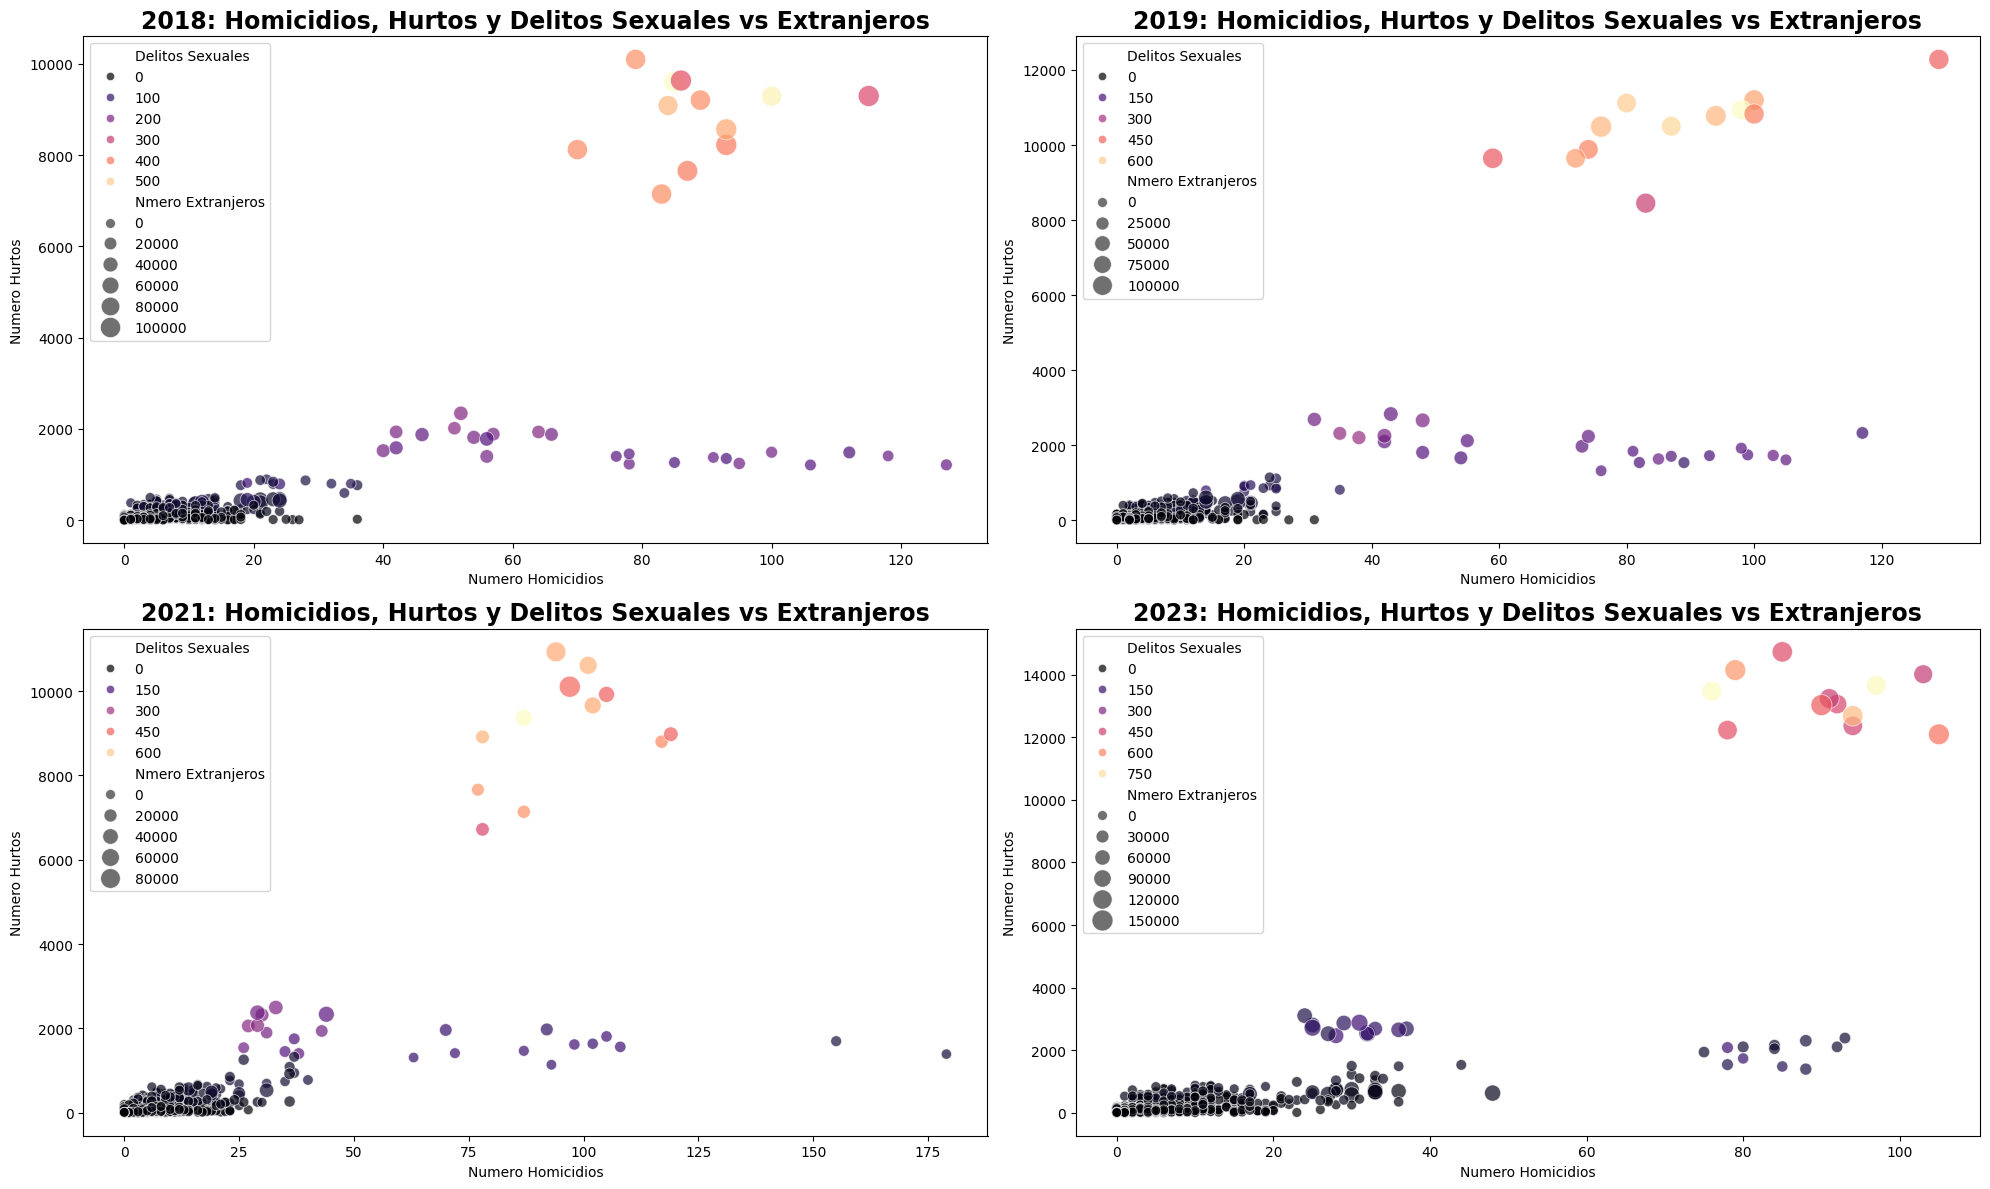

In [116]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Homicidios'] = base_final['Homicidios']
df['Hurtos'] = base_final['Hurtos']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']
df['Delitos Sexuales'] = base_final['Delitos Sexuales']

df_2018 = df[df['año'] == 2018]
df_2019 = df[df['año'] == 2019]
df_2021 = df[df['año'] == 2021]
df_2023 = df[df['año'] == 2023]


fig, axes = plt.subplots(2, 2, figsize=(20, 12))
bubble_plot = sns.scatterplot(data=df_2018,x=df_2018['Homicidios'], y=df_2018['Hurtos'],size=df_2018['Nmero Extranjeros'],hue=df_2018['Delitos Sexuales'],  sizes=(50, 230), 
    alpha=0.7,palette='magma' ,ax= axes[0, 0])
handles, labels = bubble_plot.get_legend_handles_labels()
bubble_plot.legend(handles=handles[1:], labels=labels[1:], title='Delitos Sexuales', bbox_to_anchor=(1, 1), loc='upper left')
axes[0,0].set_title('2018: Homicidios, Hurtos y Delitos Sexuales vs Extranjeros', fontsize=17, fontweight='bold')
axes[0,0].set_xlabel('Numero Homicidios')
axes[0,0].set_ylabel('Numero Hurtos')

sns.scatterplot(data=df_2019,x=df_2019['Homicidios'], y=df_2019['Hurtos'],size=df_2019['Nmero Extranjeros'],hue=df_2019['Delitos Sexuales'],  sizes=(50, 230), 
    alpha=0.7,palette='magma' ,ax= axes[0, 1])
axes[0,1].set_title('2019: Homicidios, Hurtos y Delitos Sexuales vs Extranjeros', fontsize=17, fontweight='bold')
axes[0,1].set_xlabel('Numero Homicidios')
axes[0,1].set_ylabel('Numero Hurtos')

sns.scatterplot(data=df_2021,x=df_2021['Homicidios'], y=df_2021['Hurtos'],size=df_2021['Nmero Extranjeros'],hue=df_2021['Delitos Sexuales'],  sizes=(50, 230), 
    alpha=0.7,palette='magma' ,ax= axes[1, 0])
axes[1,0].set_title('2021: Homicidios, Hurtos y Delitos Sexuales vs Extranjeros', fontsize=17, fontweight='bold')
axes[1,0].set_xlabel('Numero Homicidios')
axes[1,0].set_ylabel('Numero Hurtos')

sns.scatterplot(data=df_2023,x=df_2023['Homicidios'], y=df_2023['Hurtos'],size=df_2023['Nmero Extranjeros'],hue=df_2023['Delitos Sexuales'],  sizes=(50, 230), 
    alpha=0.7,palette='magma' ,ax= axes[1, 1])
axes[1,1].set_title('2023: Homicidios, Hurtos y Delitos Sexuales vs Extranjeros', fontsize=17, fontweight='bold')
axes[1,1].set_xlabel('Numero Homicidios')
axes[1,1].set_ylabel('Numero Hurtos')


for ax in axes.flat:
    ax.legend( loc='upper left', bbox_to_anchor=(0, 1))

plt.tight_layout()
plt.show()

### Los gráficos analizan la relación entre homicidios, hurtos, delitos sexuales y el número de turistas extranjeros en los años 2018, 2019, 2021 y 2023. En general, se observa una concentración de eventos delictivos en ciudades con menor afluencia de turistas, mientras que las ciudades con un mayor número de extranjeros tienden a tener una incidencia delictiva relativa más controlada, especialmente en términos de homicidios.

### En 2018 y 2019, los puntos con más turistas muestran un rango bajo de homicidios y hurtos, mientras que el número de delitos sexuales está ligeramente más distribuido, lo que podría reflejar diferencias en la denuncia o percepción de seguridad. En 2021, durante la pandemia, la disminución en la afluencia de turistas coincide con una baja general en el número de eventos delictivos, aunque los patrones de distribución se mantienen similares.

### En 2023, la recuperación del turismo coincide con un incremento en el número de delitos, especialmente hurtos, aunque estos no parecen correlacionarse directamente con las ciudades que reciben más turistas. Esto podría reflejar un enfoque más robusto en las medidas de seguridad en destinos turísticos principales, mientras que los problemas de inseguridad se concentran en zonas menos visitadas por extranjeros.

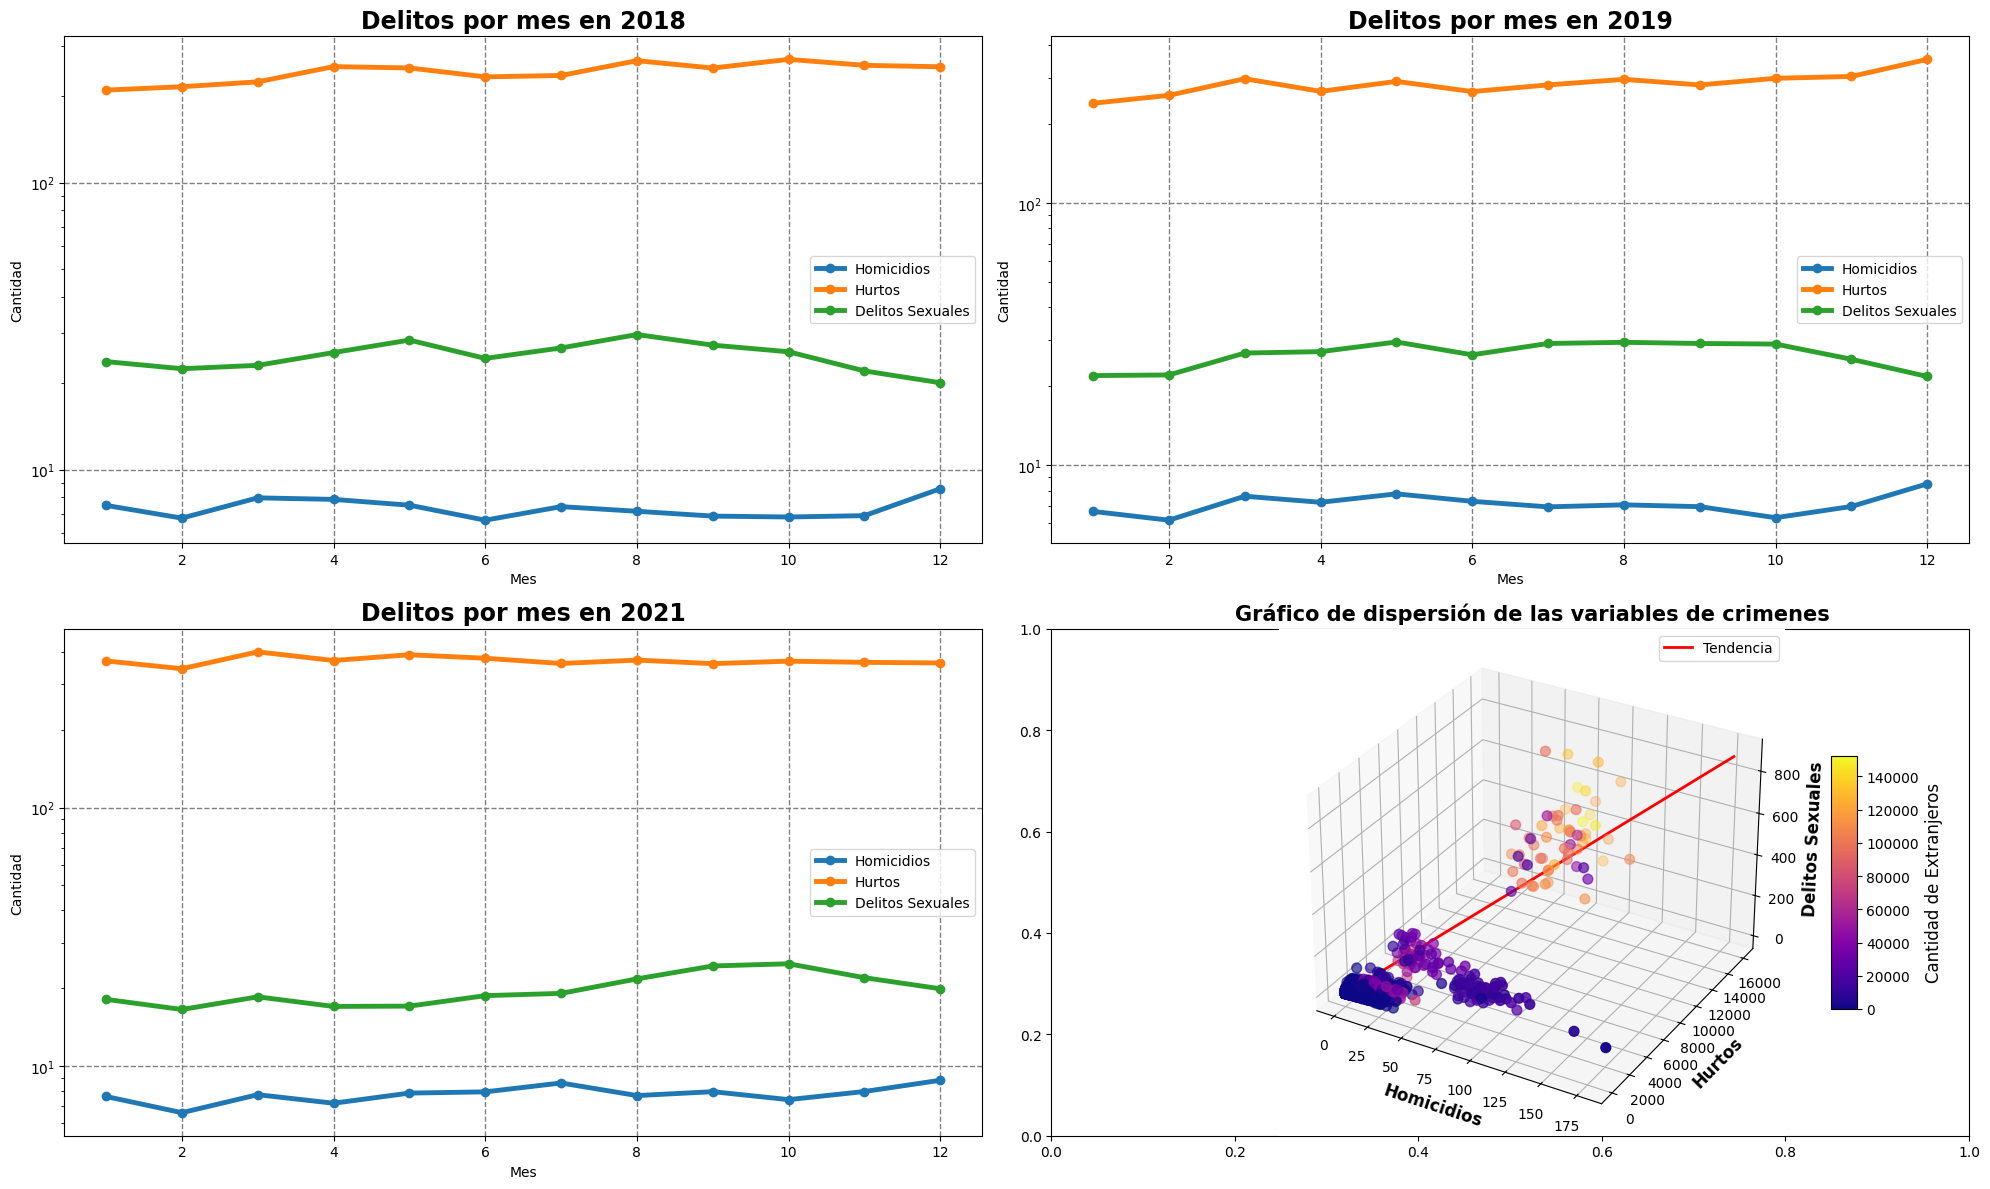

In [116]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Homicidios'] = base_final['Homicidios']
df['Hurtos'] = base_final['Hurtos']
df['Delitos Sexuales'] = base_final['Delitos Sexuales']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']

df_2018 = df[df['año'] == 2018].groupby('mes')[['Homicidios', 'Hurtos', 'Delitos Sexuales']].mean()
df_2019 = df[df['año'] == 2019].groupby('mes')[['Homicidios', 'Hurtos', 'Delitos Sexuales']].mean()
df_2023 = df[df['año'] == 2023].groupby('mes')[['Homicidios', 'Hurtos', 'Delitos Sexuales']].mean()

fig, axes = plt.subplots(2, 2, figsize=(20, 12))

df_2018.plot(kind='line', ax=axes[0, 0], marker='o', linewidth=3.5)
axes[0, 0].set_title('Delitos por mes en 2018', fontsize=17, fontweight='bold')
axes[0, 0].set_xlabel('Mes')
axes[0, 0].set_ylabel('Cantidad')
axes[0, 0].grid(True, color='gray', linestyle='--', linewidth=1)
axes[0, 0].set_yscale('log')

df_2019.plot(kind='line', ax=axes[0, 1], marker='o', linewidth=3.5)
axes[0, 1].set_title('Delitos por mes en 2019', fontsize=17, fontweight='bold')
axes[0, 1].set_xlabel('Mes')
axes[0, 1].set_ylabel('Cantidad')
axes[0, 1].grid(True, color='gray', linestyle='--', linewidth=1)
axes[0, 1].set_yscale('log')


df_2023.plot(kind='line', ax=axes[1, 0], marker='o', linewidth=3.5)
axes[1, 0].set_title('Delitos por mes en 2021', fontsize=17, fontweight='bold')
axes[1, 0].set_xlabel('Mes')
axes[1, 0].set_ylabel('Cantidad')
axes[1, 0].grid(True, color='gray', linestyle='--', linewidth=1)
axes[1, 0].set_yscale('log')

ax_3d = fig.add_subplot(2, 2, 4, projection='3d')

scatter2 = ax_3d.scatter(
    df['Homicidios'], df['Hurtos'], df['Delitos Sexuales'], 
    c=df['Nmero Extranjeros'], cmap='plasma', s=50
)

ax_3d.set_xlabel('Homicidios', fontsize=12, fontweight='bold')
ax_3d.set_ylabel('Hurtos', fontsize=12, fontweight='bold')
ax_3d.set_zlabel('Delitos Sexuales', fontsize=12, fontweight='bold')
ax_3d.set_title('Gráfico de dispersión de las variables de crimenes', 
                fontsize=15, fontweight='bold')

x_vals = np.array([df['Homicidios'].min(), df['Homicidios'].max()])
y_vals = np.array([df['Hurtos'].min(), df['Hurtos'].max()])
z_vals = np.array([df['Delitos Sexuales'].min(), df['Delitos Sexuales'].max()])
ax_3d.plot(x_vals, y_vals, z_vals, color='red', linewidth=2, label='Tendencia')
ax_3d.legend()

cbar2 = fig.colorbar(scatter2, ax=ax_3d, shrink=0.5, aspect=10)
cbar2.set_label('Cantidad de Extranjeros', fontsize=12)

fig.tight_layout()
plt.show()

### En los años analizados, los hurtos (línea naranja) se mantienen como el delito más frecuente, seguido por los delitos sexuales (línea verde) y, en menor medida, los homicidios (línea azul). La estabilidad mensual sugiere patrones consistentes en la ocurrencia de estos delitos, sin fluctuaciones significativas a lo largo del año. Sin embargo, los hurtos muestran un leve incremento hacia los últimos meses en todos los años, lo que podría estar relacionado con temporadas de mayor actividad turística y comercial.

### El gráfico tridimensional refuerza la idea de que el aumento en los turistas extranjeros (representado por el tamaño de los puntos) no está directamente asociado con incrementos significativos en homicidios o delitos sexuales, pero parece estar relacionado con mayores niveles de hurtos. La tendencia (línea roja) indica una ligera correlación positiva entre los delitos y el número de extranjeros, aunque se observa una gran dispersión, especialmente en los hurtos.

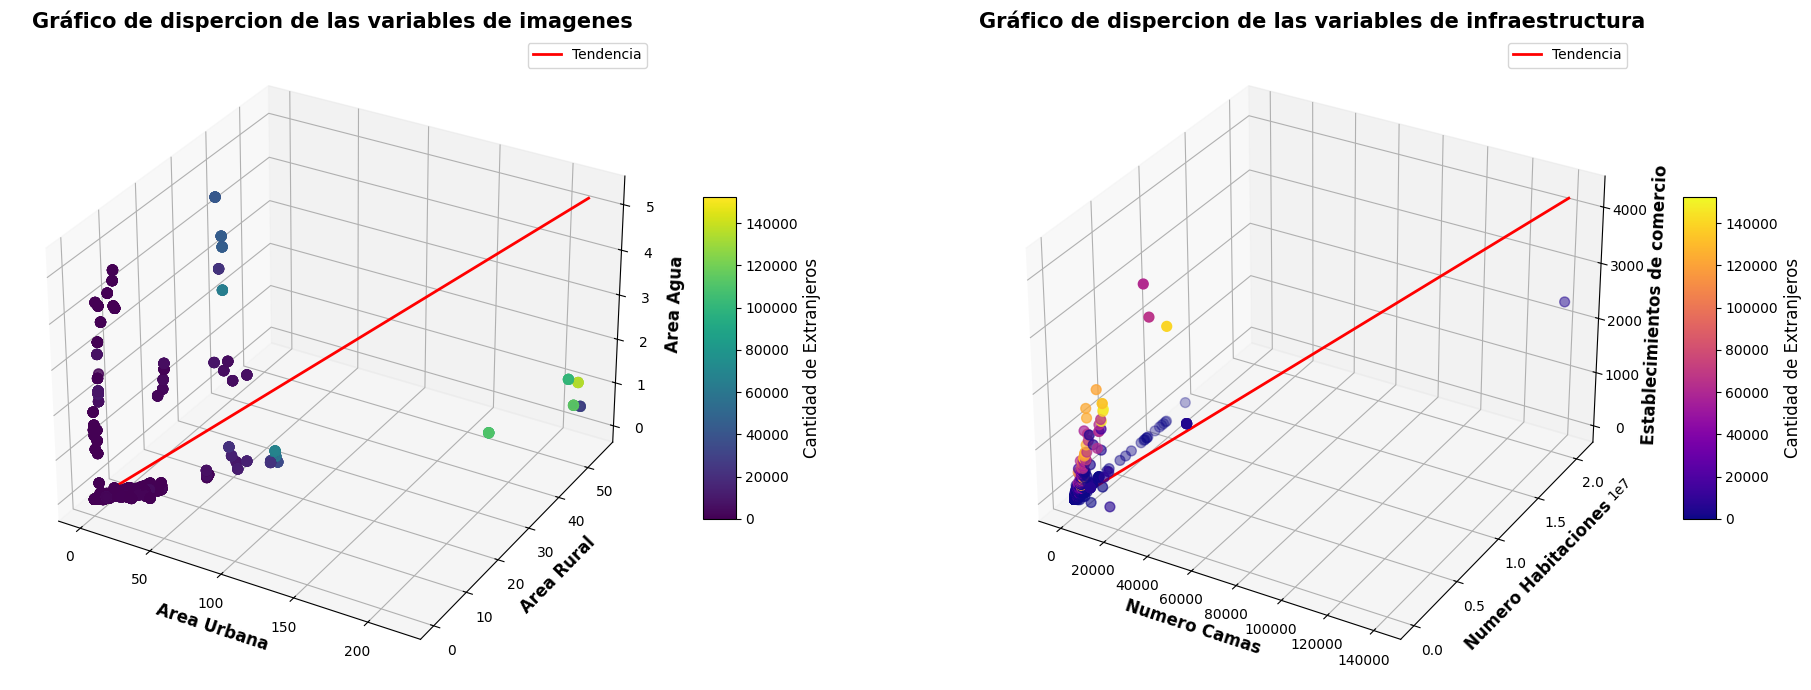

In [105]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Area Urbana'] = base_final['Area Urbana']
df['Area Rural'] = base_final['Area Rural']
df['Area Agua'] = base_final['Area Agua']
df['Nmero Extranjeros'] = base_final['Nmero Extranjeros']
df['Establecimientos de turismo'] = base_final['Establecimientos de turismo']
df['N Habitaciones'] = base_final['N Habitaciones']
df['N Camas'] = base_final['N Camas']


fig, axes = plt.subplots(1, 2, figsize=(20, 7), subplot_kw={'projection': '3d'})

#Primer grafico
scatter1 = axes[0].scatter(
    df['Area Urbana'], df['Area Rural'], df['Area Agua'], 
    c=df['Nmero Extranjeros'], cmap='viridis', s=50)
axes[0].set_xlabel('Area Urbana', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Area Rural', fontsize=12, fontweight='bold')
axes[0].set_zlabel('Area Agua', fontsize=12, fontweight='bold')
axes[0].set_title('Gráfico de dispercion de las variables de imagenes', fontsize=15, fontweight='bold')

x_vals = np.array([df['Area Urbana'].min(), df['Area Urbana'].max()])
y_vals = np.array([df['Area Rural'].min(), df['Area Rural'].max()])
z_vals = np.array([df['Area Agua'].min(), df['Area Agua'].max()])
axes[0].plot(x_vals, y_vals, z_vals, color='red', linewidth=2, label='Tendencia')
axes[0].legend()


cbar1 = fig.colorbar(scatter1, ax=axes[0], shrink=0.5, aspect=10)
cbar1.set_label('Cantidad de Extranjeros', fontsize=12)

# Segundo Grafico
scatter2 = axes[1].scatter(
    df['N Camas'], df['N Habitaciones'], df['Establecimientos de turismo'], 
    c=df['Nmero Extranjeros'], cmap='plasma', s=50
)

axes[1].set_xlabel('Numero Camas', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Numero Habitaciones', fontsize=12, fontweight='bold')
axes[1].set_zlabel('Establecimientos de comercio', fontsize=12, fontweight='bold')
axes[1].set_title('Gráfico de dispercion de las variables de infraestructura', fontsize=15, fontweight='bold')

x_vals = np.array([df['N Camas'].min(), df['N Camas'].max()])
y_vals = np.array([df['N Habitaciones'].min(), df['N Habitaciones'].max()])
z_vals = np.array([df['Establecimientos de turismo'].min(), df['Establecimientos de turismo'].max()])
axes[1].plot(x_vals, y_vals, z_vals, color='red', linewidth=2, label='Tendencia')
axes[1].legend()
cbar2 = fig.colorbar(scatter2, ax=axes[1], shrink=0.5, aspect=10)
cbar2.set_label('Cantidad de Extranjeros', fontsize=12)

plt.tight_layout()
plt.show()

### El primer gráfico tridimensional analiza la relación entre área urbana, área rural y área de agua con la cantidad de turistas extranjeros. Se observa que las áreas urbanas están más correlacionadas con mayores cantidades de extranjeros, lo que refleja que las ciudades son los principales polos de atracción turística. Las áreas rurales y acuáticas muestran menor influencia directa, aunque hay algunos puntos destacados que indican destinos específicos con atractivos naturales o rurales, aunque no son la norma.

### El segundo gráfico examina la relación entre infraestructura (número de camas, establecimientos de comercio) y la cantidad de extranjeros. Aquí, se aprecia una correlación positiva más clara: los destinos con más camas y establecimientos comerciales reciben más turistas extranjeros. Esto subraya la importancia de la capacidad de alojamiento y la infraestructura comercial como factores clave para atraer visitantes.

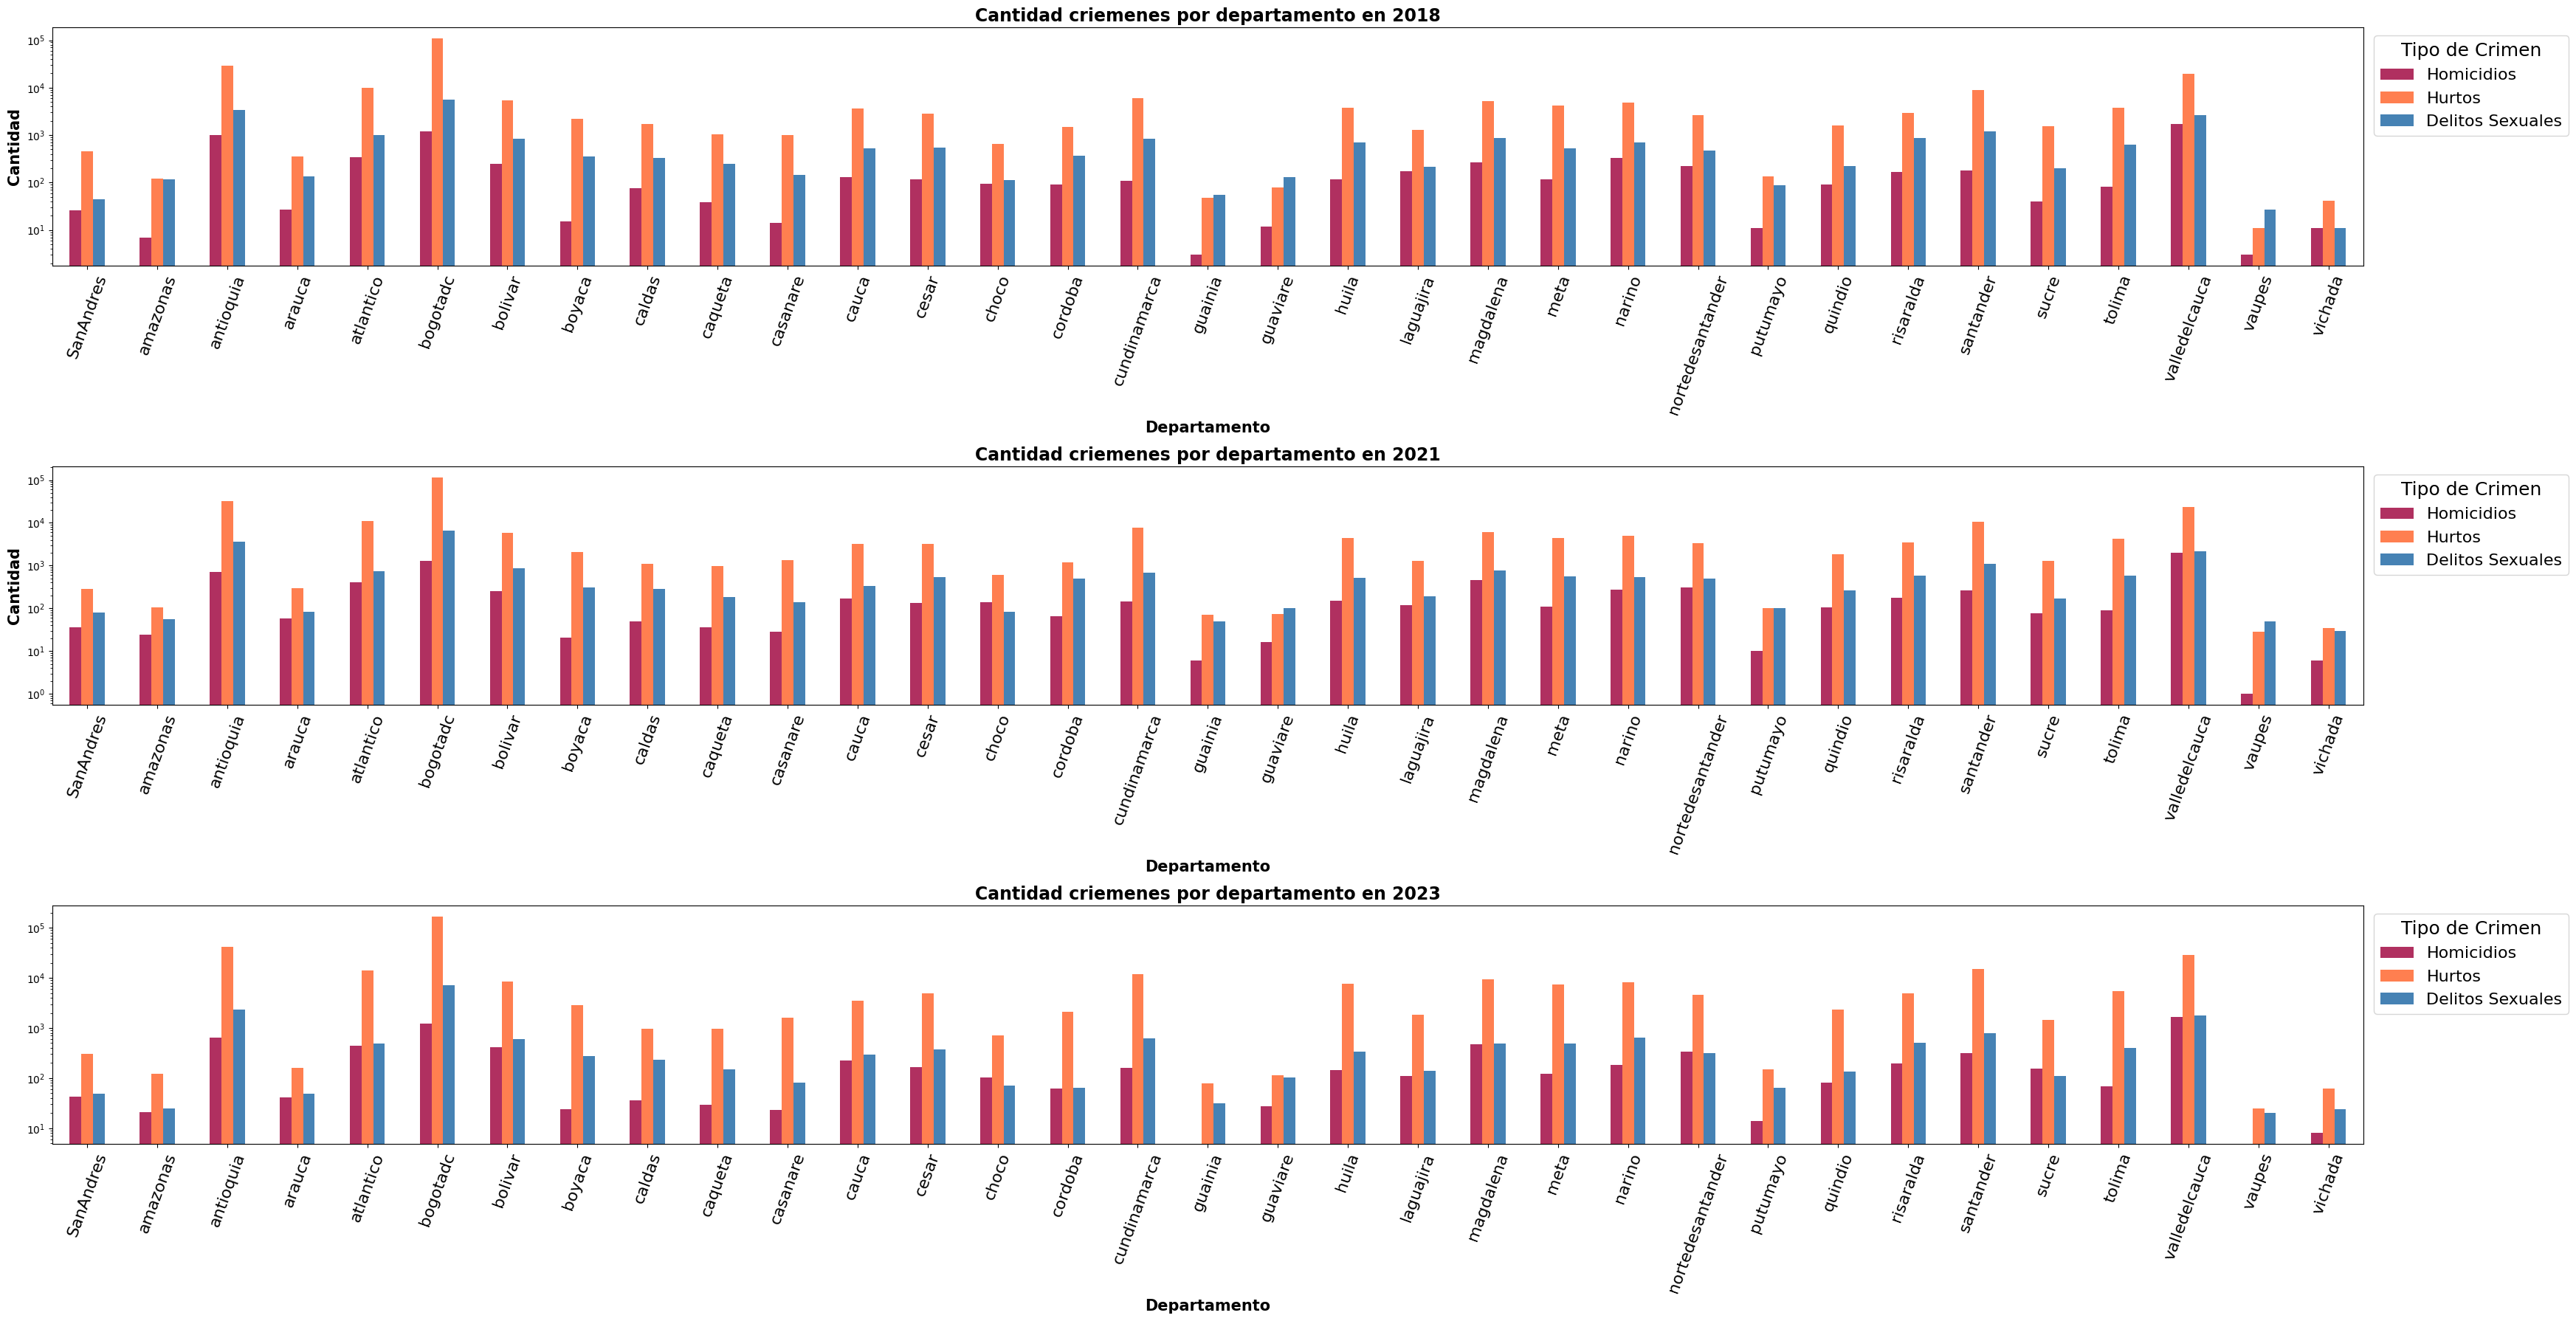

In [54]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Homicidios'] = base_final['Homicidios']
df['Hurtos'] = base_final['Hurtos']
df['Delitos Sexuales'] = base_final['Delitos Sexuales']
df['Departamento'] = base_final['Departamento']

df_2018 = df[df['año'] == 2018].groupby(['Departamento'])[['Homicidios', 'Hurtos', 'Delitos Sexuales']].sum()
df_2019 = df[df['año'] == 2019].groupby(['Departamento'])[['Homicidios', 'Hurtos', 'Delitos Sexuales']].sum()
df_2021 = df[df['año'] == 2021].groupby(['Departamento'])[['Homicidios', 'Hurtos', 'Delitos Sexuales']].sum()
df_2023 = df[df['año'] == 2023].groupby(['Departamento'])[['Homicidios', 'Hurtos', 'Delitos Sexuales']].sum()


fig, axes = plt.subplots(3, 1, figsize=(35, 18)) 
color = ['#B03060', '#FF7F50', '#4682B4']

# Gráfico para 2018
df_2018.plot(kind='bar', ax=axes[0] , color=color)
axes[0].set_title('Cantidad criemenes por departamento en 2018 (Escala Logaritmica)', fontsize=17, fontweight='bold')
axes[0].set_xlabel('Departamento', fontweight='bold', fontsize=15)
axes[0].set_ylabel('Cantidad', fontweight='bold', fontsize=15)
axes[0].tick_params(axis='x', rotation=70, labelsize=16)
axes[0].set_yscale('log')
axes[0].legend(title='Tipo de Crimen', title_fontsize=18, fontsize=16, bbox_to_anchor=(1.001, 1), loc='upper left')

# Gráfico para 2021
df_2021.plot(kind='bar', ax=axes[1], color=color)
axes[1].set_title('Cantidad criemenes por departamento en 2021 (Escala Logaritmica)', fontsize=17, fontweight='bold')
axes[1].set_xlabel('Departamento', fontweight='bold', fontsize=15)
axes[1].set_ylabel('Cantidad', fontweight='bold', fontsize=15)
axes[1].tick_params(axis='x', rotation=70, labelsize=16)
axes[1].set_yscale('log')
axes[1].legend(title='Tipo de Crimen', title_fontsize=18, fontsize=16,bbox_to_anchor=(1.001, 1), loc='upper left')

# Gráfico para 2023
df_2023.plot(kind='bar', ax=axes[2], color=color)
axes[2].set_title('Cantidad criemenes por departamento en 2023 (Escala Logaritmica)', fontsize=17, fontweight='bold')
axes[2].set_xlabel('Departamento', fontweight='bold', fontsize=15)
axes[1].set_ylabel('Cantidad', fontweight='bold', fontsize=15)
axes[2].tick_params(axis='x', rotation=70, labelsize=16)
axes[2].set_yscale('log')
axes[2].legend(title='Tipo de Crimen', title_fontsize=18, fontsize=16, bbox_to_anchor=(1.001, 1), loc='upper left')

plt.tight_layout()
plt.show()




### En departamentos como Bogotá, Antioquia y Valle del Cauca, se observa una alta incidencia de todos los tipos de crímenes, lo que refleja el impacto de las grandes áreas metropolitanas en las estadísticas de criminalidad. Por otro lado, departamentos más pequeños o rurales, como Vaupés y Vichada, presentan menores niveles absolutos de criminalidad en todas las categorías, aunque esto puede estar influido por su baja densidad poblacional y menor actividad económica.

### En 2021, debido a la pandemia, hay una ligera disminución en los crímenes reportados en varios departamentos, lo que podría reflejar una menor actividad social y económica. Sin embargo, en 2023, los niveles de criminalidad parecen recuperar tendencias previas, con un repunte en hurtos y delitos sexuales en varios departamentos clave.

### En general, la distribución de los crímenes refleja tanto la densidad poblacional como la actividad económica y social de cada departamento. Esto subraya la necesidad de políticas diferenciadas para abordar la criminalidad, con un enfoque especial en áreas urbanas de alta densidad, y estrategias preventivas en regiones con menor capacidad institucional. Además, el impacto del turismo en estas estadísticas debería ser analizado para diseñar políticas de seguridad específicas que protejan tanto a locales como a visitantes.

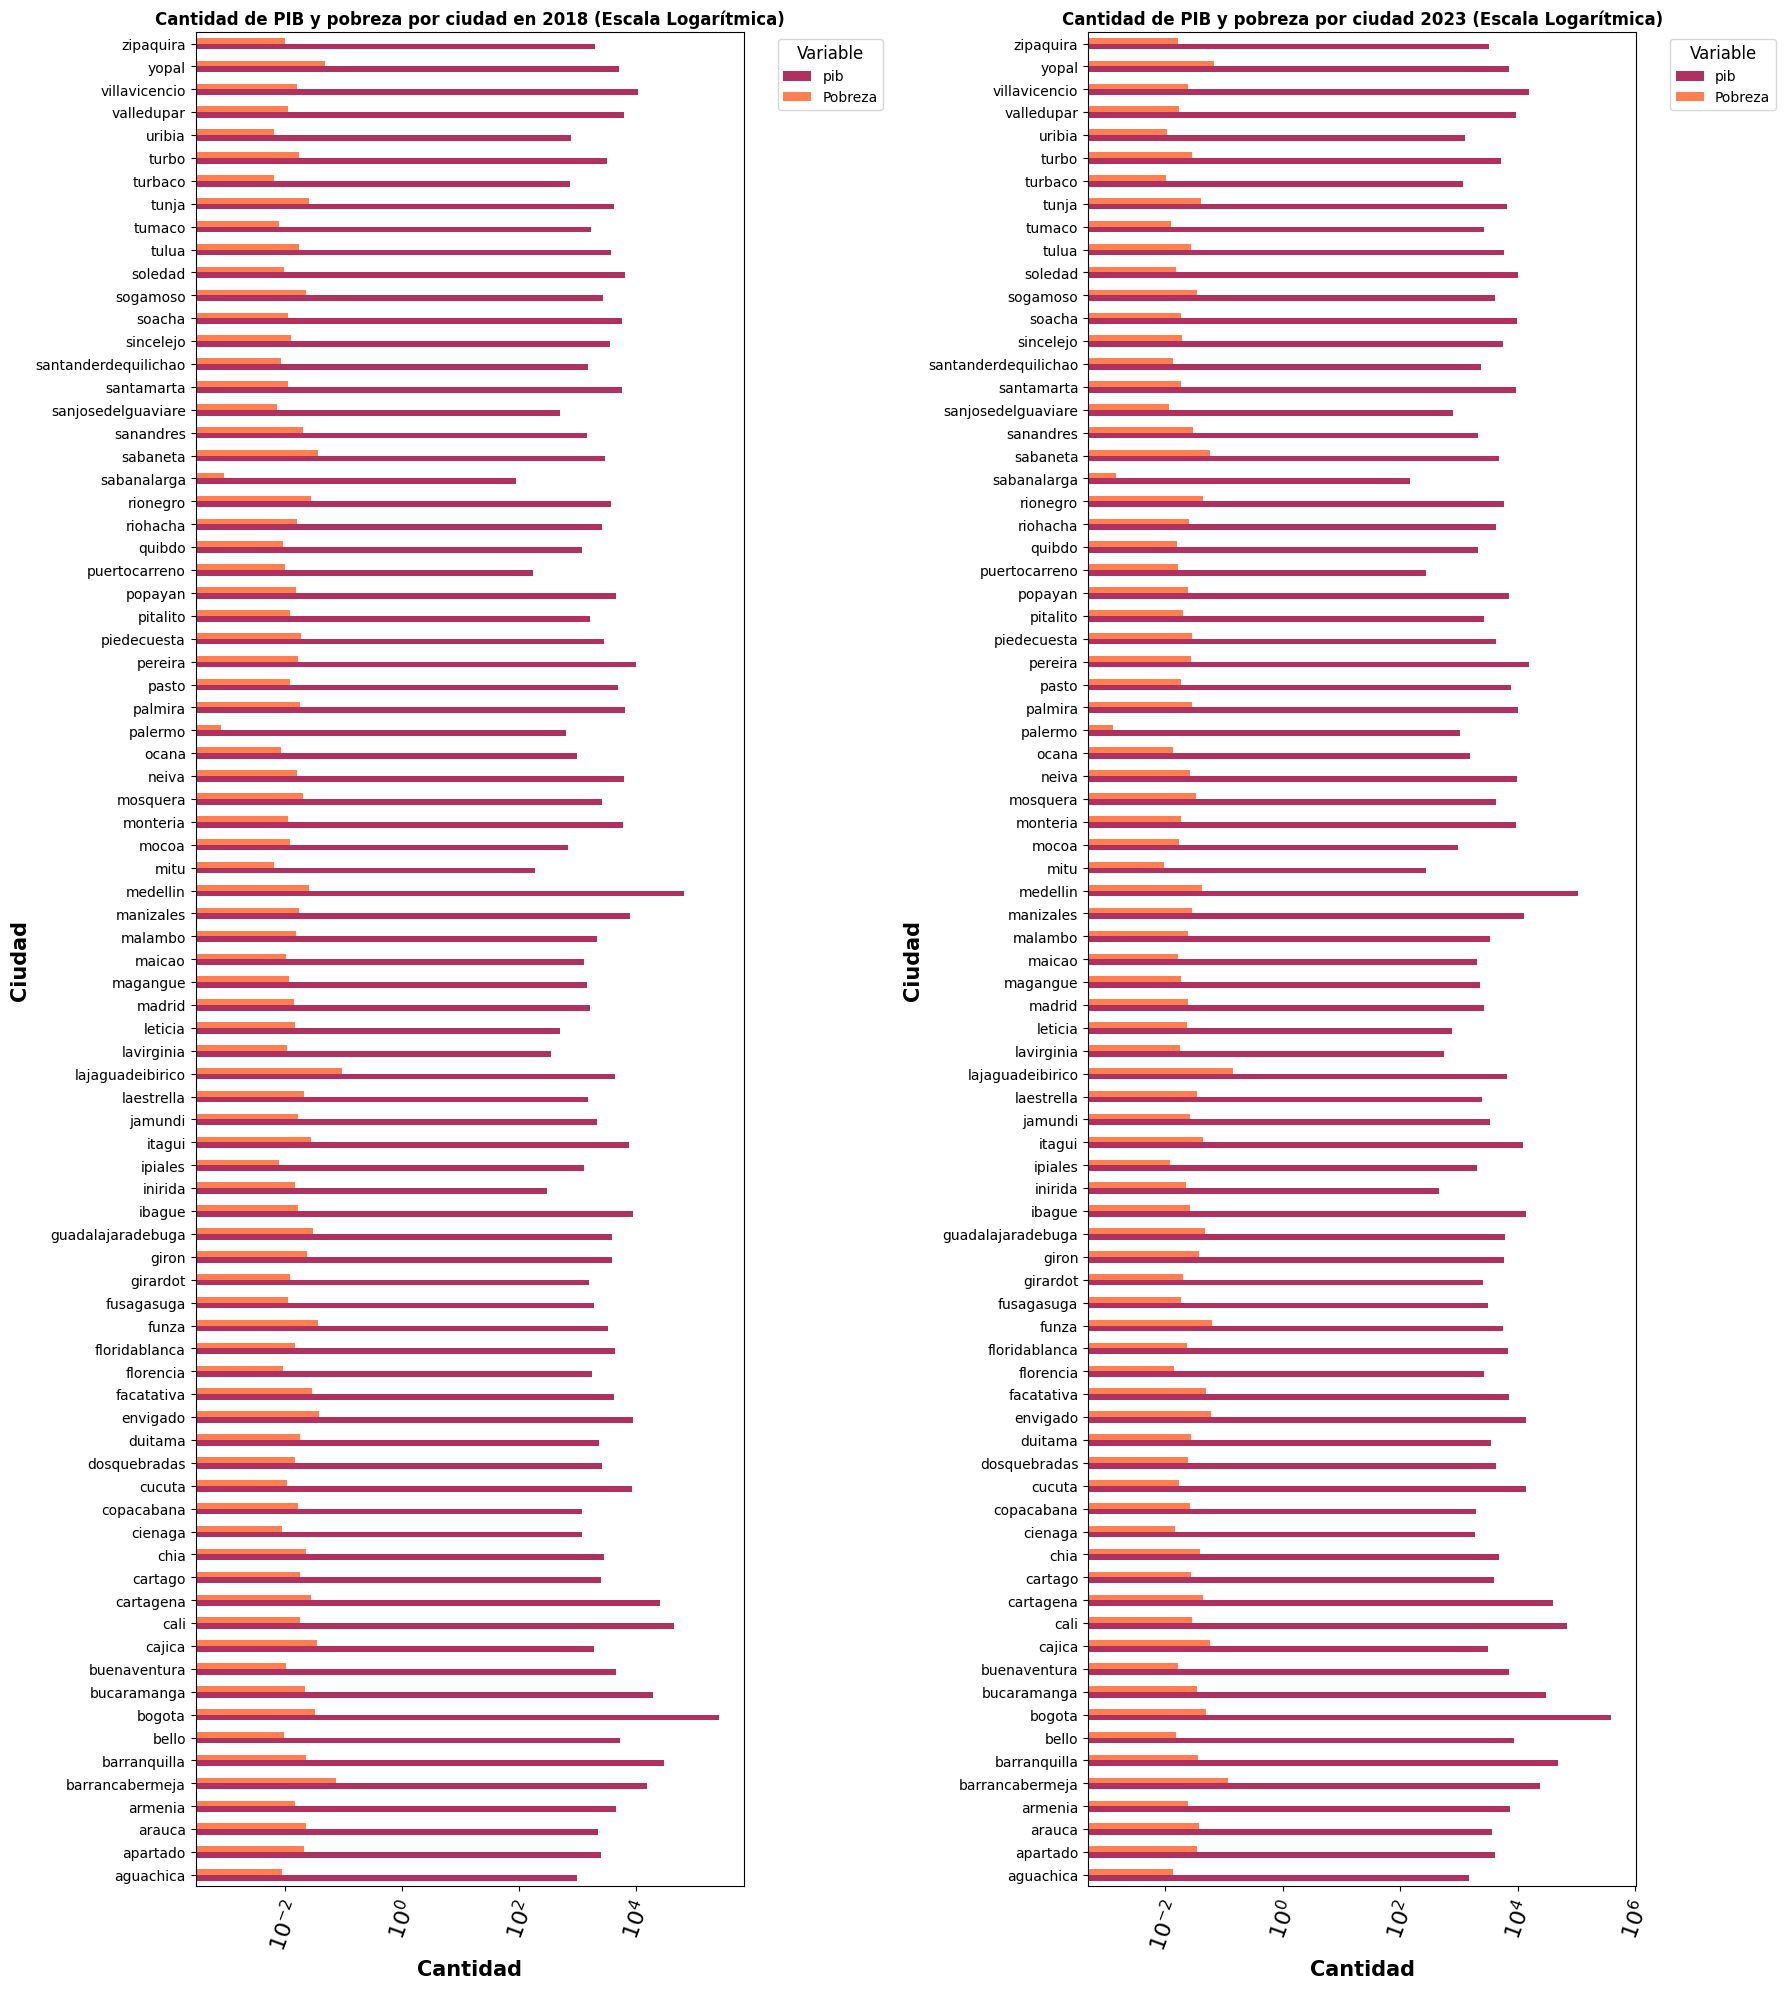

In [74]:

data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['pib'] = base_final['Pib Ponderado']
df['Pobreza'] = base_final['Proxy Pobreza']
df['Ciudad'] = base_final['Ciudad']


df_2018 = df[df['año'] == 2018].groupby(['Ciudad'])[['pib', 'Pobreza']].sum()
df_2023 = df[df['año'] == 2023].groupby(['Ciudad'])[['pib', 'Pobreza']].sum()


fig, axes = plt.subplots(1, 2, figsize=(18, 20)) 
color = ['#B03060', '#FF7F50', '#4682B4']

# Gráfico para 2018
df_2018.plot(kind='barh', ax=axes[0], color=color)
axes[0].set_title('Cantidad de PIB y pobreza por ciudad en 2018 (Escala Logarítmica)', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Cantidad', fontweight='bold', fontsize=15)  
axes[0].set_ylabel('Ciudad', fontweight='bold', fontsize=15)  
axes[0].tick_params(axis='x', rotation=70, labelsize=16)
axes[0].set_xscale('log')  
axes[0].legend(title='Variable', title_fontsize=12, fontsize=10, 
               bbox_to_anchor=(1.05, 1), loc='upper left')

# Gráfico para 2023
df_2023.plot(kind='barh', ax=axes[1], color=color)
axes[1].set_title('Cantidad de PIB y pobreza por ciudad 2023 (Escala Logarítmica)', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Cantidad', fontweight='bold', fontsize=15) 
axes[1].set_ylabel('Ciudad', fontweight='bold', fontsize=15) 
axes[1].tick_params(axis='x', rotation=70, labelsize=16)
axes[1].set_xscale('log')  
axes[1].legend(title='Variable', title_fontsize=12, fontsize=10, 
               bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()  
plt.show() 

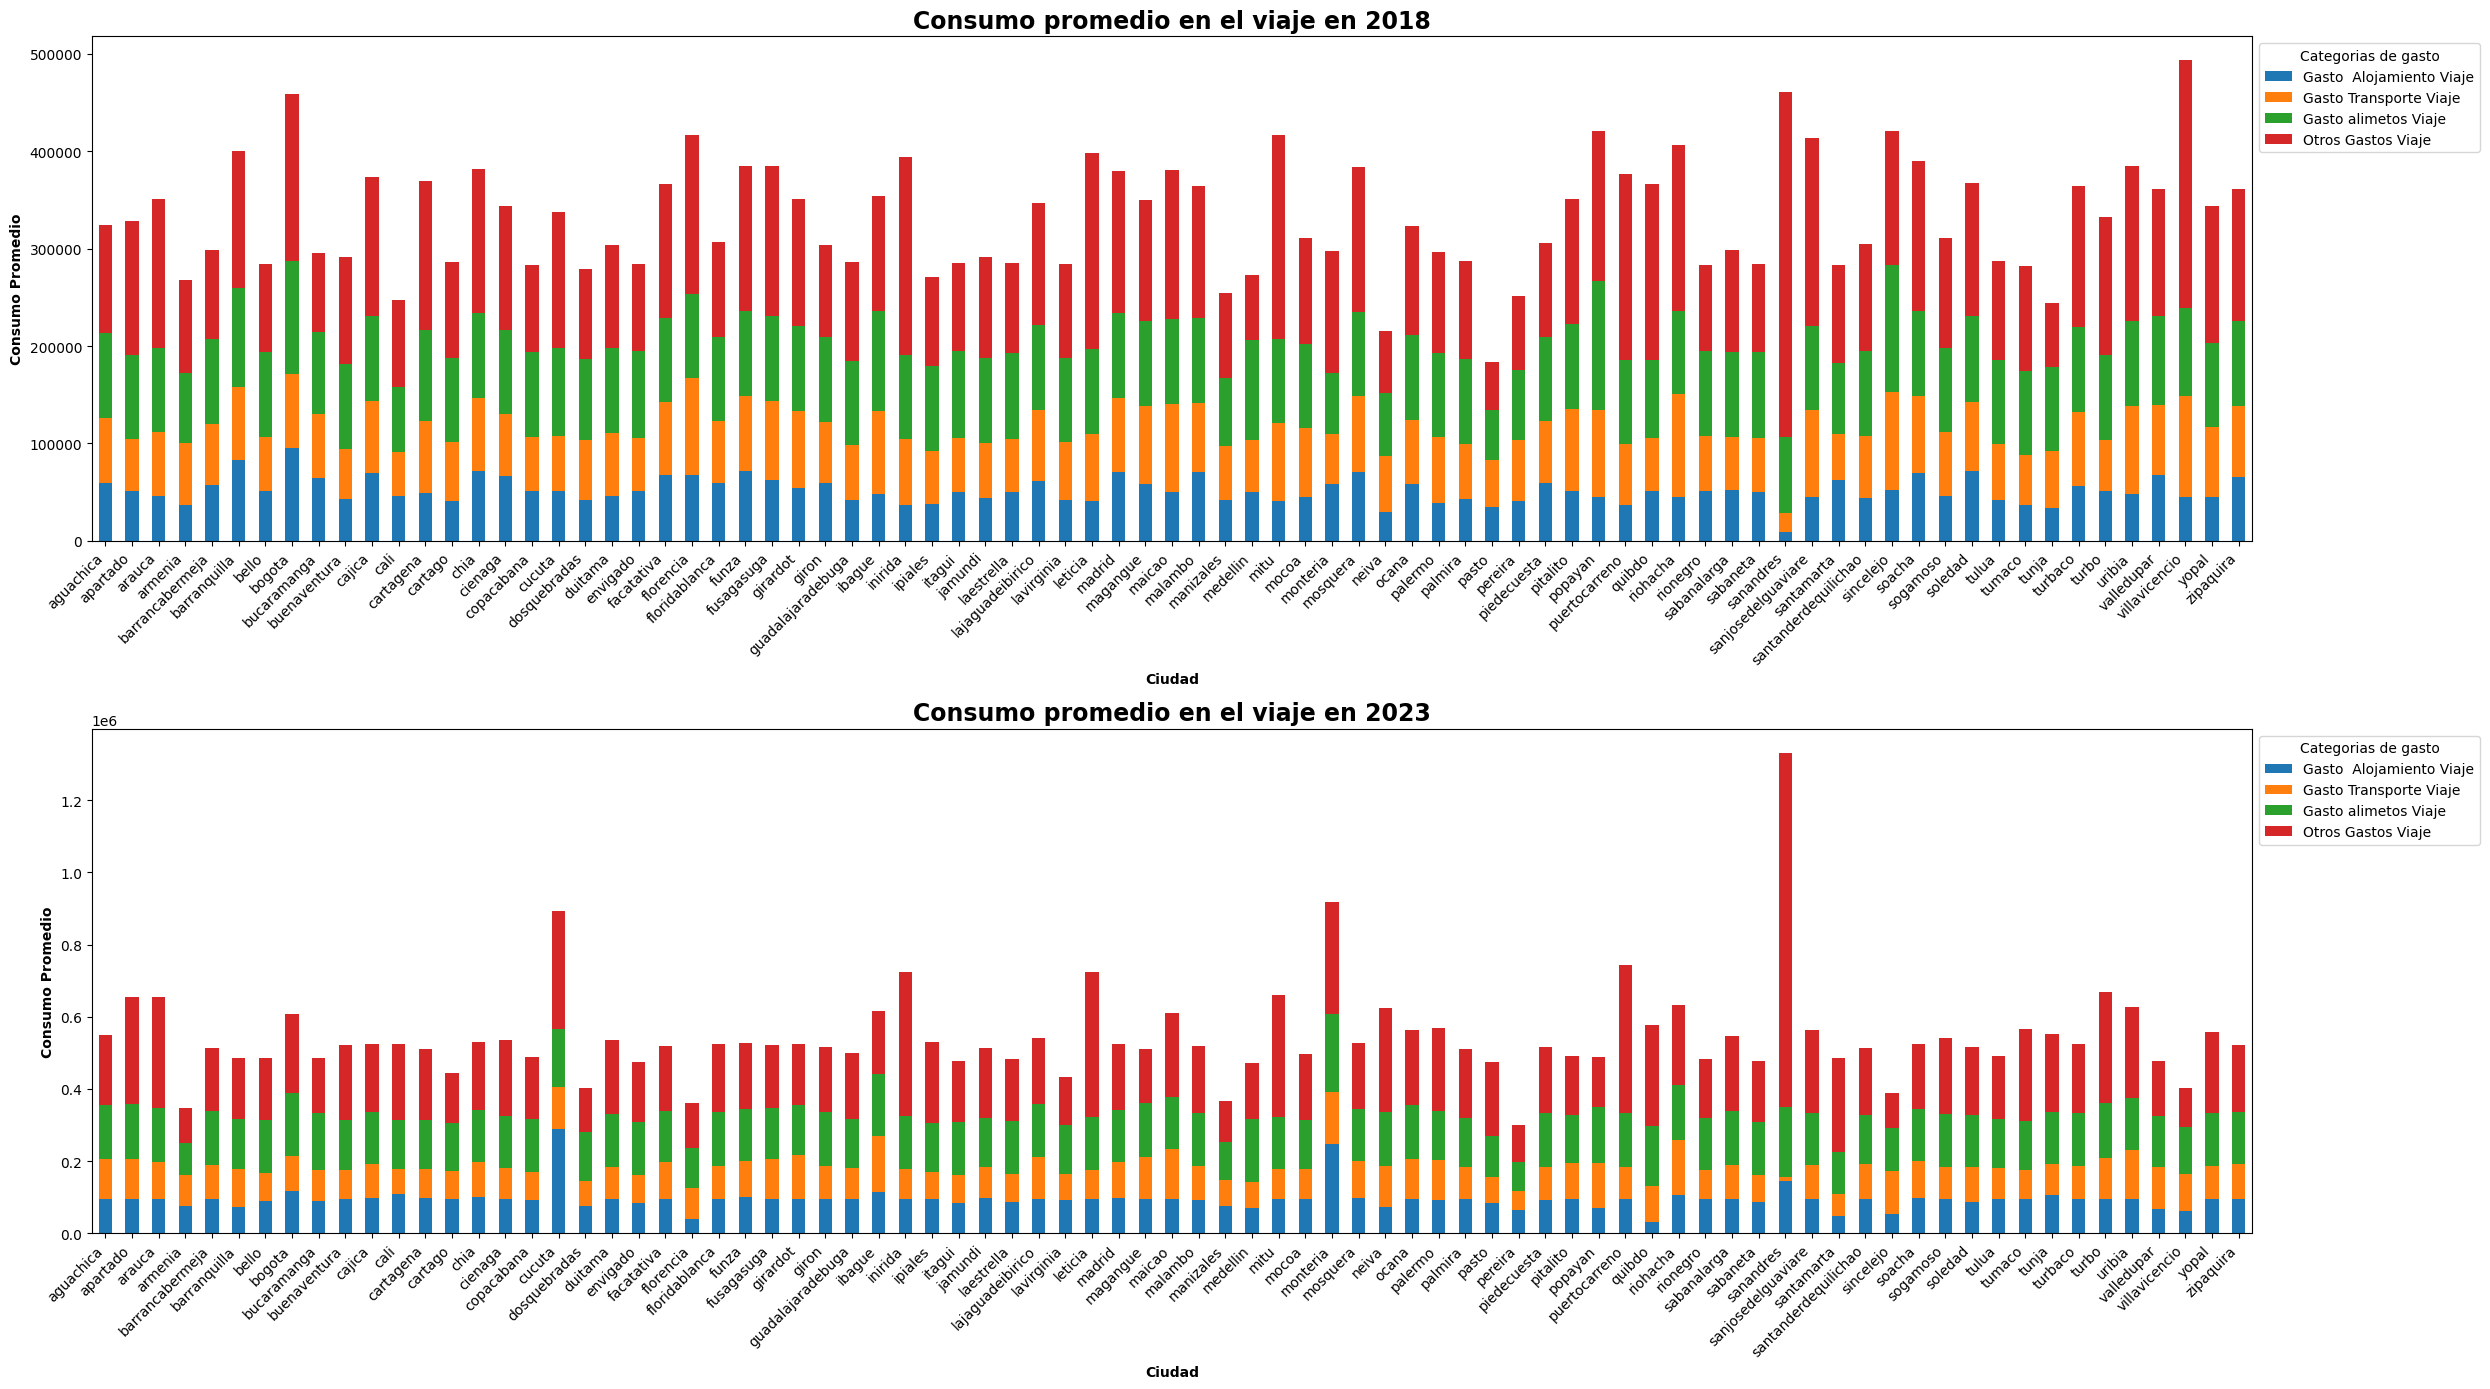

In [63]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Ciudad'] = base_final['Ciudad']
df['Gasto  Alojamiento Viaje'] = base_final['Gasto  Alojamiento Viaje']
df['Gasto Transporte Viaje'] = base_final['Gasto Transporte Viaje']
df['Gasto alimetos Viaje'] = base_final['Gasto alimetos Viaje']
df['Otros Gastos Viaje'] = base_final['Otros Gastos Viaje']


df_2018 = df[df['año'] == 2018]
df_2023 = df[df['año'] == 2023]
gasto_2018 = df_2018.groupby('Ciudad')[['Gasto  Alojamiento Viaje', 'Gasto Transporte Viaje', 'Gasto alimetos Viaje', 'Otros Gastos Viaje']].median()
gasto_2023 = df_2023.groupby('Ciudad')[['Gasto  Alojamiento Viaje', 'Gasto Transporte Viaje', 'Gasto alimetos Viaje', 'Otros Gastos Viaje']].median()

fig, axes = plt.subplots(2, 1, figsize=(25, 14)) 

gasto_2018.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Consumo promedio en el viaje en 2018', fontsize=17, fontweight='bold')
axes[0].set_xlabel('Ciudad', fontweight='bold', fontsize=10)
axes[0].set_ylabel('Consumo Promedio', fontweight='bold', fontsize=10)
axes[0].legend(title='Categorias de gasto', bbox_to_anchor=(1, 1), loc='upper left')
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right', fontsize=10) 

# Gráfico para 2023
gasto_2023.plot(kind='bar', stacked=True, ax=axes[1])
axes[1].set_title('Consumo promedio en el viaje en 2023', fontsize=17, fontweight='bold')
axes[1].set_xlabel('Ciudad', fontsize=10, fontweight='bold')
axes[1].set_ylabel('Consumo Promedio', fontsize=10, fontweight='bold')
axes[1].legend(title='Categorias de gasto', bbox_to_anchor=(1, 1), loc='upper left')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha='right', fontsize=10) 

plt.tight_layout()
plt.show()

### En 2018, las principales ciudades turísticas como Bogotá, Cartagena y Medellín muestran niveles de gasto más altos en comparación con ciudades más pequeñas o menos desarrolladas turísticamente. Esto refleja la capacidad de estas ciudades para atraer turistas que gastan más debido a la oferta de servicios e infraestructura turística.

### Para 2023, los niveles generales de gasto muestran un incremento significativo en algunas ciudades, lo que podría atribuirse a la inflación, el aumento en el costo de los servicios turísticos o un cambio en el perfil de los turistas, hacia visitantes con mayor poder adquisitivo. Sin embargo, se destacan disparidades, como el gasto atípico en una ciudad específica (posiblemente debido a un evento especial o único), lo que subraya la influencia de factores externos en los patrones de consumo.


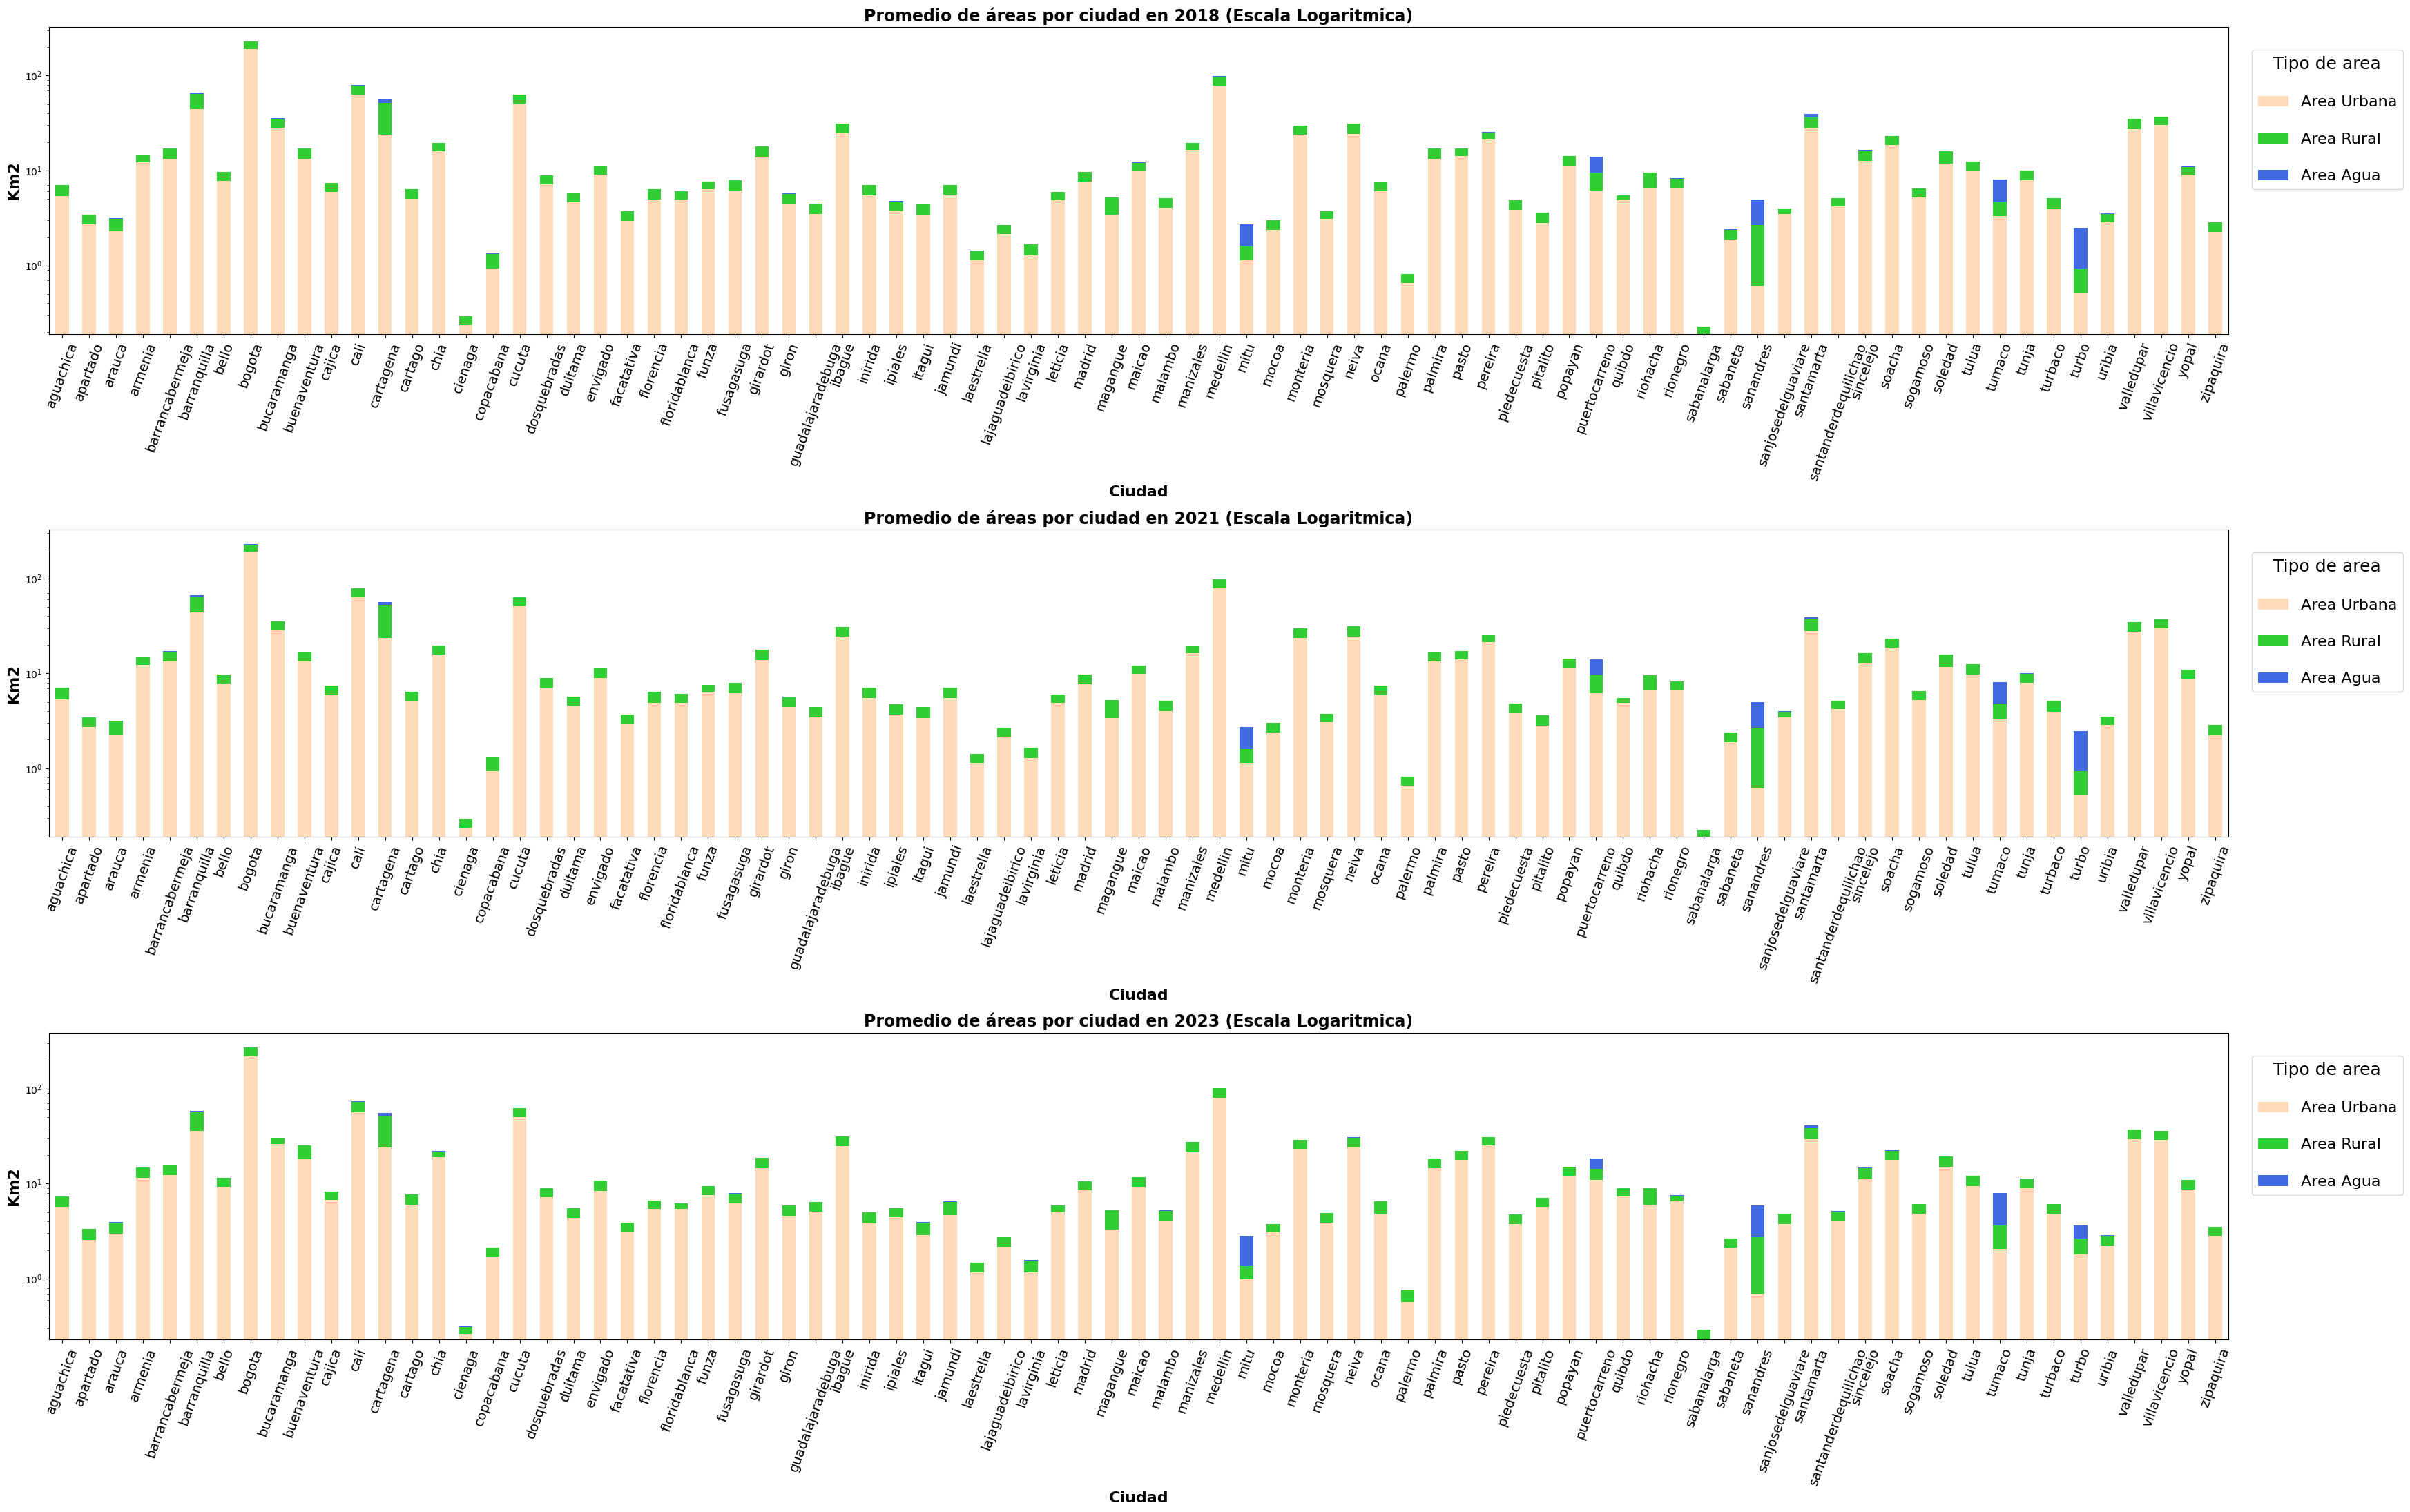

In [136]:
data={}
df = pd.DataFrame(data)
df['fecha'] = pd.to_datetime(base_final['Mes'], format='%Y-%m')
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['Ciudad'] = base_final['Ciudad']
df['Area Rural'] = base_final['Area Rural']
df['Area Urbana'] = base_final['Area Urbana']
df['Area Agua'] = base_final['Area Agua']

df_2018 = df[df['año'] == 2018]
df_2021 = df[df['año'] == 2021]
df_2023 = df[df['año'] == 2023]

gasto_2018 = df_2018.groupby('Ciudad')[['Area Urbana', 'Area Rural', 'Area Agua']].mean()
gasto_2021 = df_2018.groupby('Ciudad')[['Area Urbana', 'Area Rural', 'Area Agua']].mean()
gasto_2023 = df_2023.groupby('Ciudad')[['Area Urbana', 'Area Rural', 'Area Agua']].mean()

fig, axes = plt.subplots(3, 1, figsize=(35, 22)) 
color = ['#FFDAB9', '#32CD32', '#4169E1']
# Gráfico para 2018
gasto_2018.plot(kind='bar', stacked=True, ax=axes[0] , color = color)
axes[0].set_title('Promedio de áreas por ciudad en 2018 (Escala Logaritmica)', fontsize=17, fontweight='bold')
axes[0].set_xlabel('Ciudad', fontweight='bold', fontsize=16)
axes[0].set_ylabel('Km2', fontweight='bold', fontsize=16)
axes[0].legend(title='Tipo de area', bbox_to_anchor=(1, 1), loc='upper left', labelspacing=1.5, borderaxespad=1.5, title_fontsize=18, fontsize=16)
axes[0].tick_params(axis='x', rotation=70, labelsize=14)
axes[0].set_yscale('log')

# Gráfico para 2021
gasto_2021.plot(kind='bar', stacked=True, ax=axes[1] ,color = color)
axes[1].set_title('Promedio de áreas por ciudad en 2021 (Escala Logaritmica)', fontsize=17, fontweight='bold')
axes[1].set_xlabel('Ciudad', fontweight='bold', fontsize=16)
axes[1].set_ylabel('Km2', fontweight='bold', fontsize=16)
axes[1].legend(title='Tipo de area', bbox_to_anchor=(1, 1), loc='upper left', labelspacing=1.5, borderaxespad=1.5, title_fontsize=18, fontsize=16)
axes[1].tick_params(axis='x', rotation=70, labelsize=14)
axes[1].set_yscale('log')

# Gráfico para 2023
gasto_2023.plot(kind='bar', stacked=True, ax=axes[2] ,color = color)
axes[2].set_title('Promedio de áreas por ciudad en 2023 (Escala Logaritmica)', fontsize=17, fontweight='bold')
axes[2].set_xlabel('Ciudad', fontweight='bold', fontsize=16)
axes[2].set_ylabel('Km2', fontweight='bold', fontsize=16)
axes[2].legend(title='Tipo de area', bbox_to_anchor=(1, 1), loc='upper left', labelspacing=1.5, borderaxespad=1.5 , title_fontsize=18, fontsize=16)
axes[2].tick_params(axis='x', rotation=70, labelsize=14)
axes[2].set_yscale('log')

plt.tight_layout()
plt.show()

### Los gráficos muestran el promedio de áreas urbanas, rurales y de agua por ciudad en 2018, 2021 y 2023, utilizando una escala logarítmica. En todas las ciudades, las áreas urbanas (barras anaranjadas) dominan significativamente en comparación con las áreas rurales (barras verdes) y de agua (barras azules), lo que refleja la concentración de la actividad económica y social en los espacios urbanos.

### En las ciudades principales como Bogotá, Medellín y Cali, las áreas urbanas son significativamente mayores, lo que corresponde a su densidad poblacional y desarrollo económico. En contraste, ciudades más pequeñas o menos desarrolladas tienen una mayor proporción relativa de áreas rurales, lo que puede indicar un enfoque económico más orientado hacia actividades agrícolas o naturales. Las áreas de agua, aunque presentes en varias ciudades, tienen un impacto marginal en términos de tamaño relativo.

### A lo largo de los años, la distribución general se mantiene constante, lo que sugiere que las proporciones entre áreas urbanas, rurales y acuáticas no han cambiado significativamente. Esto resalta la estabilidad de los patrones territoriales en las ciudades colombianas y la continua dependencia de las áreas urbanas como los principales centros de actividad.

In [4]:
import unicodedata
import geopandas as gpd

geometria_ciudades = gpd.read_file('Bases Necesarias\Bases Geoespaciales\Ciudades Colombia Geometry.geojson')
Departamentos = gpd.read_file("Bases Necesarias\Bases Geoespaciales\Colombia.json")
vias = gpd.read_file('Bases Necesarias\RedVial.zip')

def eliminar_tildes(str):
    return ''.join(
        i for i in unicodedata.normalize('NFKD', str)
        if unicodedata.category(i) != 'Mn')

def arreglar_texto(df , variable , nombre):
    if variable not in df.columns:
        print('La columna' , variable ,'no existe en el DataFrame')
        return df
        
    df[variable] = df[variable].str.lower()
    df[variable] = df[variable].str.replace(' ', '', regex=False)
    df[variable] = df[variable].str.replace(r'[^\w\s]', '', regex=True)   
    df[variable] = df[variable].str.replace('sanandresdetumaco', 'tumaco', regex=False)
    df[variable] = df[variable].str.replace('ct$', '', regex=True)
    df[variable] = df[variable].str.replace('bogotadc', 'bogota', regex=False)
    df[variable] = df[variable].apply(eliminar_tildes)
    df = df.rename(columns={variable: nombre})
    return df

geometria_ciudades = arreglar_texto(geometria_ciudades , 'Ciudades' , 'Ciudad')
Departamentos = arreglar_texto(Departamentos, 'NOMBRE_DPT' , "Departamento")
base_geometry= pd.merge(base_final , geometria_ciudades , on='Ciudad' , how='left')
base_geometry = gpd.GeoDataFrame(base_geometry, geometry='geometry')

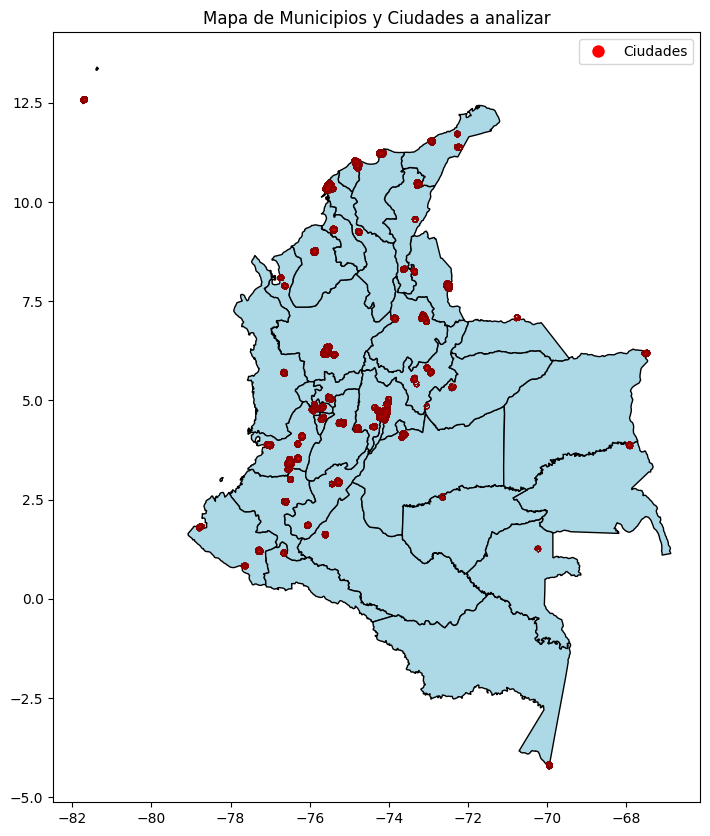

In [10]:
from matplotlib.lines import Line2D
fig, ax = plt.subplots(figsize=(10, 10))

Departamentos.plot(ax=ax, color='lightblue', edgecolor='black', label='Municipios')
base_geometry.plot(ax=ax, color='red', label='Ciudades', edgecolor='darkred', linewidth=4, alpha=0.6)
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Ciudades',markerfacecolor='red', markersize=10)]
plt.title('Mapa de Municipios y Ciudades a analizar')
ax.legend(handles=legend_elements, loc='upper right')
plt.show()

C:\Users\alejo\AppData\Local\Temp\ipykernel_16240\921902262.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  base_geometry_buffered['geometry'] = base_geometry_buffered.geometry.buffer(0.2)


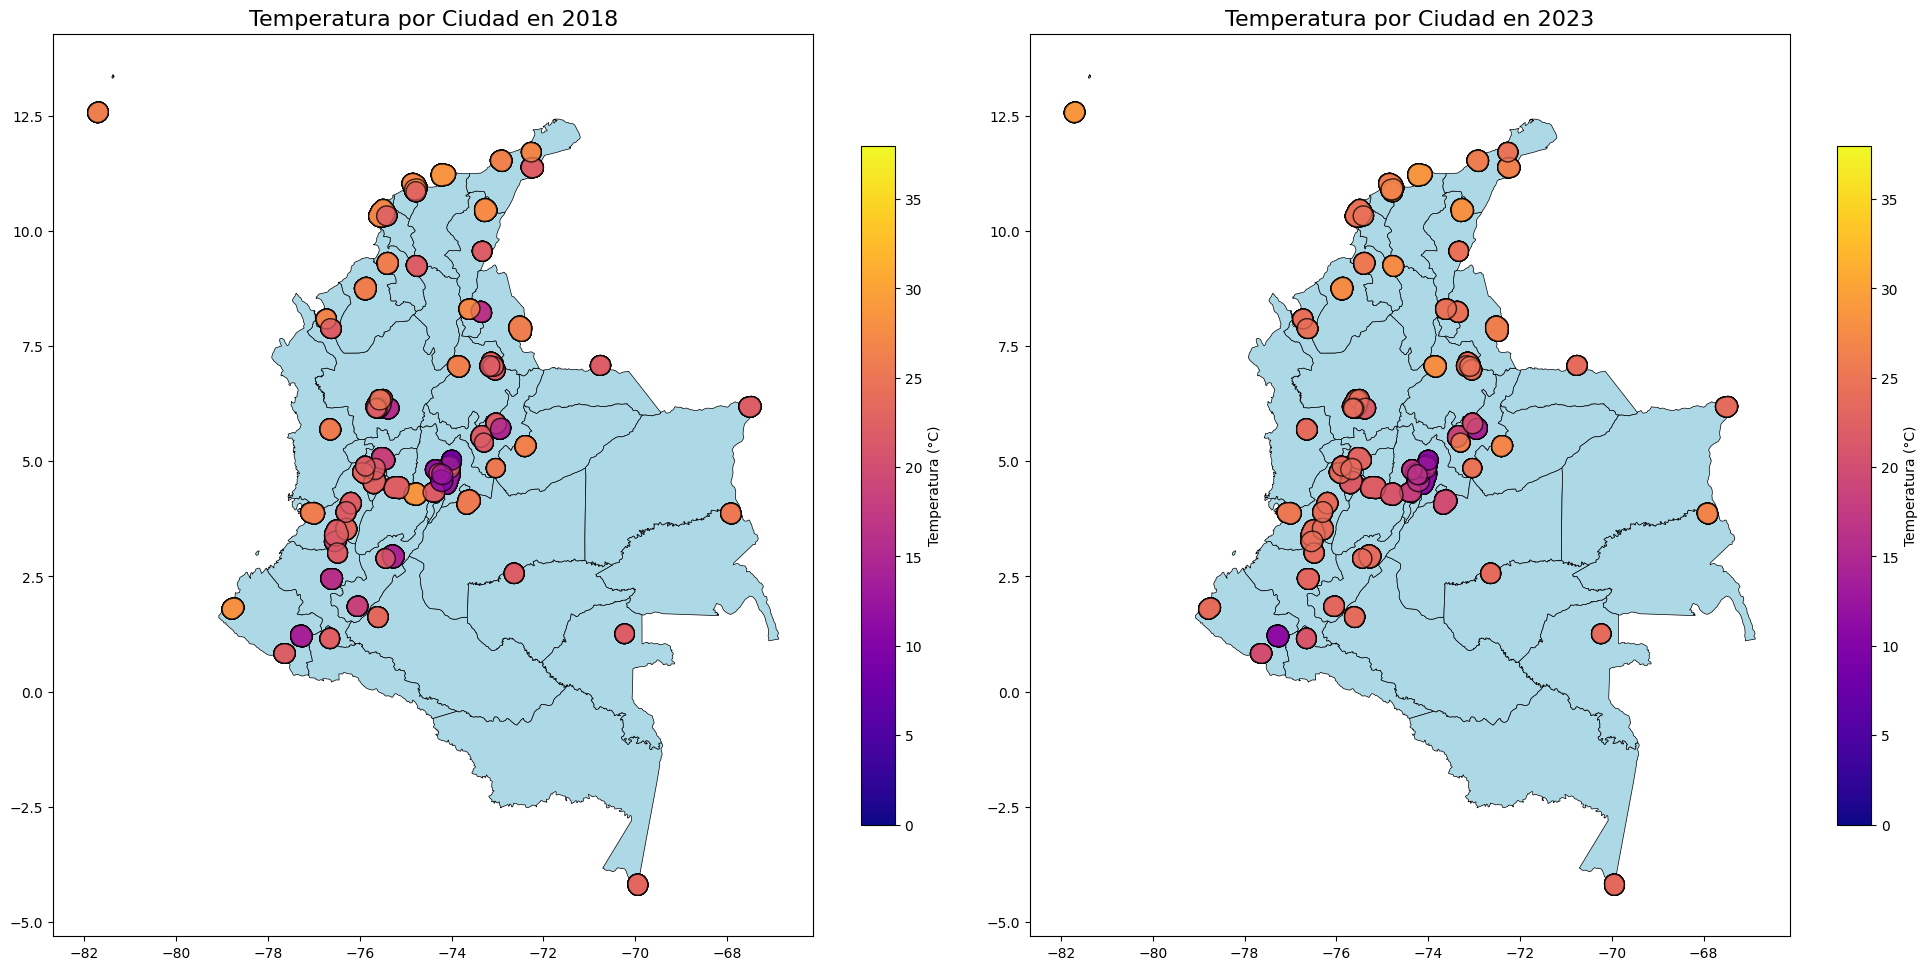

In [16]:

vias['distancia'] = abs(vias['distanciaf'] - vias['distanciai'])
vias_imp = vias[['distancia' , 'geometry']]
vias_imp = vias_imp.to_crs(epsg=4326)
base_geometry_buffered = base_geometry.copy()
base_geometry_buffered['geometry'] = base_geometry_buffered.geometry.buffer(0.2)

base_geometry_buffered['fecha'] = pd.to_datetime(base_geometry_buffered['Mes'], format='%Y-%m')
base_geometry_buffered['año'] = base_geometry_buffered['fecha'].dt.year
base_geometry_buffered['mes'] = base_geometry_buffered['fecha'].dt.month

base_geometry_buffered2018 = base_geometry_buffered[base_geometry_buffered['año'] == 2018]
base_geometry_buffered2023 = base_geometry_buffered[base_geometry_buffered['año'] == 2023]



fig, axes = plt.subplots(1, 2, figsize=(20, 10))
Departamentos.plot(ax=axes[0], color='lightblue', edgecolor='black', linewidth=0.5, label='Municipios')
base_geometry_buffered2018.plot(ax=axes[0], column='Temperatura', cmap='plasma', legend=True,legend_kwds={'label': "Temperatura (°C)", 'orientation': "vertical", 'shrink': 0.7},
    edgecolor='black', alpha=0.7, vmin=0, vmax=38)

axes[0].set_title('Temperatura por Ciudad en 2018', fontsize=16)
Departamentos.plot(ax=axes[1], color='lightblue', edgecolor='black', linewidth=0.5, label='Municipios')
base_geometry_buffered2023.plot(ax=axes[1], column='Temperatura', cmap='plasma', legend=True,legend_kwds={'label': "Temperatura (°C)", 'orientation': "vertical", 'shrink': 0.7},
    edgecolor='black', alpha=0.7, vmin=0, vmax=38)

axes[1].set_title('Temperatura por Ciudad en 2023', fontsize=16)

plt.tight_layout()
plt.show()

### Los mapas muestran la distribución de temperaturas promedio por ciudad en Colombia para los años 2018 y 2023. Los colores y tamaños de los puntos indican la variación de las temperaturas: los tonos más cálidos (amarillo y naranja) representan temperaturas más altas, mientras que los tonos fríos (morado y púrpura) reflejan temperaturas más bajas.

### En ambas fechas, se observa un patrón claro: las regiones de mayor altitud, como Bogotá y otras ciudades de la cordillera de los Andes, presentan temperaturas más bajas (alrededor de 10-15 °C), mientras que las zonas de menor altitud, como las costas del Caribe y las regiones orientales, registran temperaturas más altas (25-30 °C). Este comportamiento es consistente con las características geográficas y climáticas del país.

### En 2023, los valores generales de temperatura parecen ligeramente más altos en comparación con 2018, lo que podría reflejar una tendencia de calentamiento global o variabilidad climática. Sin embargo, la distribución geográfica de las temperaturas permanece constante, con las mismas zonas cálidas y frías.

C:\Users\alejo\AppData\Local\Temp\ipykernel_20636\2802109727.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'buffer' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  ciudades_geom['geometry'] = ciudades_geom.geometry.buffer(0.16)


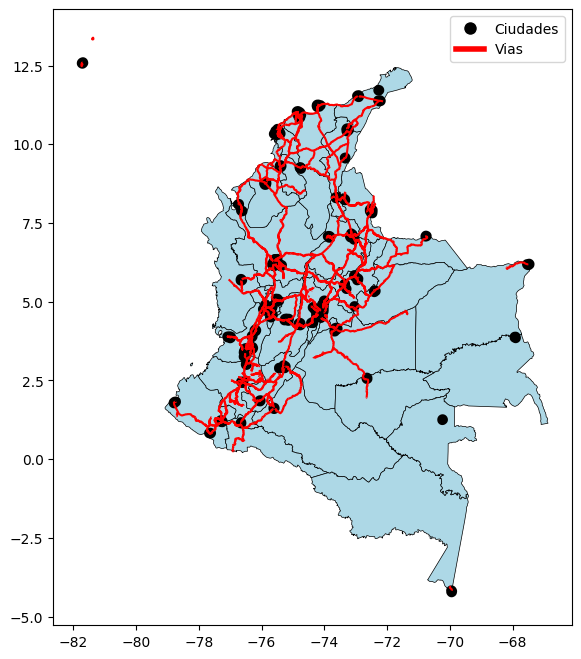

In [163]:
vias = gpd.read_file('C:\\Users\\alejo\\OneDrive\\Escritorio\\Universidaad\\Colab Notebooks\\Ia en economia\\Proyecto\\RedVial.zip')
vias['distancia'] = abs(vias['distanciaf'] - vias['distanciai'])
vias_imp = vias[['distancia' , 'geometry']]
ciudades_geom= gpd.read_file('C:\\Users\\alejo\\OneDrive\\Escritorio\\Universidaad\\Colab Notebooks\\Ia en economia\\Proyecto\\Ciudades Colombia Geometry.geojson')
ciudades_geom['geometry'] = ciudades_geom.geometry.buffer(0.16)

ciudades_geom = ciudades_geom.to_crs(epsg=4326)
vias_imp = vias_imp.to_crs(epsg=4326)

from matplotlib.lines import Line2D
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
Departamentos.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.5)
ciudades_geom.plot(ax=ax, color='black', markersize=50)  
vias_imp.plot(ax=ax, color='red', edgecolor='black') 
legend_elements = [
    Line2D([0], [0], marker='o', color='w', label='Ciudades',markerfacecolor='black', markersize=10),
    Line2D([0], [0], color='red', lw=4, label='Vias')]

ax.legend(handles=legend_elements, loc='upper right')
plt.show()

### El mapa muestra la distribución de las ciudades principales de Colombia (puntos negros) y la red de vías terrestres (líneas rojas) que conectan estas ciudades. Se puede observar que la infraestructura vial está densamente concentrada en las regiones andinas y centrales, donde se encuentran las ciudades más grandes como Bogotá, Medellín y Cali. Estas áreas actúan como nodos clave en la red de transporte del país, lo que facilita la conectividad y el flujo de bienes y personas.

### En contraste, las regiones periféricas, como el Amazonas, la Orinoquía y ciertas áreas costeras, muestran una infraestructura vial menos desarrollada, lo que puede limitar la accesibilidad a estas zonas. Esto podría ser un factor determinante en la baja afluencia turística y económica en dichas regiones en comparación con los centros urbanos.

### La distribución de la red vial sugiere que la conectividad terrestre es un factor clave para el desarrollo económico y turístico. Ciudades bien conectadas tienen una mayor capacidad de atraer turistas debido a la facilidad de acceso. Por otro lado, regiones menos conectadas podrían beneficiarse de inversiones en infraestructura para promover su integración y aprovechar su potencial turístico, especialmente en áreas con atractivos naturales o culturales únicos.

# Autores: Pablo Reyes y Victoria Vargas 
# Universidad Externado de Colombia 
# Revisado: Daniel Godoy 